<a href="https://colab.research.google.com/github/bmoretz/MSDS-MachineLearning/blob/master/Assignment_06/Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workspace Initialization

## Libraries & Standard Setup

In [4]:
!pip install jupyterthemes

In [0]:
%matplotlib inline

import os

# Core
import pandas as pd
import numpy as np

# Visuals
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# jt themes
from jupyterthemes import jtplot

# IPython display
from IPython.display import display

from scipy.io import loadmat # for loading .MAT files
import urllib.request

In [0]:
import tensorflow as tf
import time

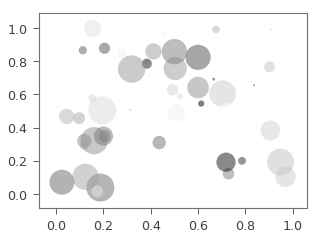

In [6]:
# Test Theme
!jt -t grade3 -f fira -fs 115
jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

Looks good. Let's roll.

In [0]:
# santatize Dataset
def santatize_set( dataframe ):
    if dataframe.isnull().values.any() == True:
        cleaned = dataframe.dropna()
        print('Dropped {} invalid samples'.format(dataframe.count - cleaned.count))
        dataframe = cleaned
    return dataframe

In [0]:
# saves a plot for reporting later. 
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

## Graphical Utility

Get an image from TensorFlow MNIST dataset.

In [0]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

# Project Dataset

## MNIST Retrieval

Use the MNIST dataset from TensorFlow.

In [0]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

## MNIST Exploration

### Single Digit

Let's grab some random images and inspect them.

ValueError: ignored

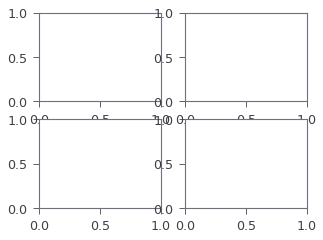

In [104]:
batch_a, batch_b = mnist.test.next_batch(4)

_, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=2, ncols=2)

Let's grab a few more random images and display a grid so we can get a sense of the overall structure.

### Multiple Digits

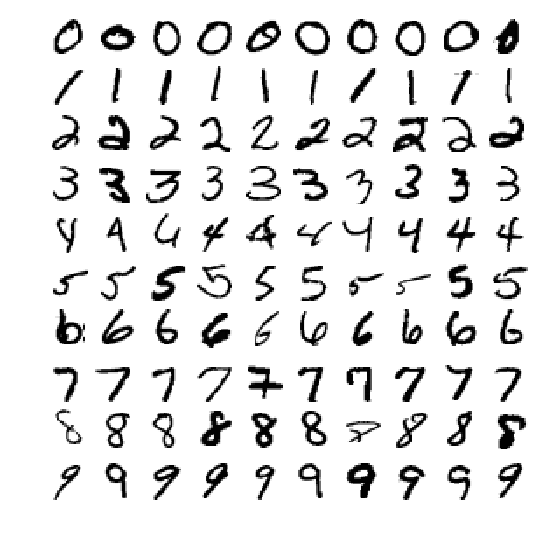

In [17]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

# Model Initialization

Initialize Google's TensorFlow library.

## Modeling Parameters

In [0]:
learning_rate = 0.0001
training_epochs = 10
batch_size = 10
display_step = 10

## Network Parameters

In [0]:
n_hidden_1 = 20 # 1st layer number of neurons
n_hidden_2 = 20 # 2nd layer number of neurons 
n_hidden_3 = 20 # 3rd layer number of neurons
n_hidden_4 = 20 # 4th layer number of neurons
n_hidden_5 = 20 # 5th layer number of neurons
n_input = 784   # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

## Graph Preparation

In [0]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

Store layers, weights and bias.

## Weights

In [0]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))
}

## Biases

In [0]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

## Multilayer Perceptron Model

Create the model.

In [0]:
def multilayer_perceptron(x, weights, biases):
    # Hidden fully connected layer with neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.leaky_relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.leaky_relu(layer_2)
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.leaky_relu(layer_3)
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.leaky_relu(layer_4)
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.leaky_relu(layer_5)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_5, weights['out']) + biases['out']
    return out_layer

In [0]:
logits = multilayer_perceptron(X, weights, biases)

# Model Execution

Initialize TensorFlow global variables.

In [0]:
logits = multilayer_perceptron(X, weights, biases)

Define loss.

In [0]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))

Define the optimizer.

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

Initializing the variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
model_metrics = {}

with tf.Session() as sess:
    sess.run(init)
    
    saver = tf.train.Saver()
        
    start_time = time.clock()
    
    model_metrics['start_time'] = start_time
    
    model_metrics['training_epochs'] = training_epochs
    model_metrics['total_batch'] = total_batch
    
    # Training cycle
    for epoch in range(training_epochs):
      
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            display("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
   
    model_metrics['avg_cost'] = avg_cost
    
    end_time = time.clock()
    model_metrics['end_time'] = end_time
    runtime = end_time - start_time  # seconds of wall-clock time 
    model_metrics['run_time'] = runtime
    
    # Apply Softmax to logits
    pred = tf.nn.softmax(logits)
    
    # Calculate Accuracy
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    model_metrics['correct_prediction'] = correct_prediction
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    model_metrics['accuracy'] = accuracy
    
    model_metrics['train_accuracy'] = sess.run(accuracy, feed_dict={X: batch_x,
                                  Y: batch_y})

    model_metrics['testing_accuracy'] = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels})

'Procesing Batch: 0:'

'Procesing Batch: 1:'

'Procesing Batch: 2:'

'Procesing Batch: 3:'

'Procesing Batch: 4:'

'Procesing Batch: 5:'

'Procesing Batch: 6:'

'Procesing Batch: 7:'

'Procesing Batch: 8:'

'Procesing Batch: 9:'

'Procesing Batch: 10:'

'Procesing Batch: 11:'

'Procesing Batch: 12:'

'Procesing Batch: 13:'

'Procesing Batch: 14:'

'Procesing Batch: 15:'

'Procesing Batch: 16:'

'Procesing Batch: 17:'

'Procesing Batch: 18:'

'Procesing Batch: 19:'

'Procesing Batch: 20:'

'Procesing Batch: 21:'

'Procesing Batch: 22:'

'Procesing Batch: 23:'

'Procesing Batch: 24:'

'Procesing Batch: 25:'

'Procesing Batch: 26:'

'Procesing Batch: 27:'

'Procesing Batch: 28:'

'Procesing Batch: 29:'

'Procesing Batch: 30:'

'Procesing Batch: 31:'

'Procesing Batch: 32:'

'Procesing Batch: 33:'

'Procesing Batch: 34:'

'Procesing Batch: 35:'

'Procesing Batch: 36:'

'Procesing Batch: 37:'

'Procesing Batch: 38:'

'Procesing Batch: 39:'

'Procesing Batch: 40:'

'Procesing Batch: 41:'

'Procesing Batch: 42:'

'Procesing Batch: 43:'

'Procesing Batch: 44:'

'Procesing Batch: 45:'

'Procesing Batch: 46:'

'Procesing Batch: 47:'

'Procesing Batch: 48:'

'Procesing Batch: 49:'

'Procesing Batch: 50:'

'Procesing Batch: 51:'

'Procesing Batch: 52:'

'Procesing Batch: 53:'

'Procesing Batch: 54:'

'Procesing Batch: 55:'

'Procesing Batch: 56:'

'Procesing Batch: 57:'

'Procesing Batch: 58:'

'Procesing Batch: 59:'

'Procesing Batch: 60:'

'Procesing Batch: 61:'

'Procesing Batch: 62:'

'Procesing Batch: 63:'

'Procesing Batch: 64:'

'Procesing Batch: 65:'

'Procesing Batch: 66:'

'Procesing Batch: 67:'

'Procesing Batch: 68:'

'Procesing Batch: 69:'

'Procesing Batch: 70:'

'Procesing Batch: 71:'

'Procesing Batch: 72:'

'Procesing Batch: 73:'

'Procesing Batch: 74:'

'Procesing Batch: 75:'

'Procesing Batch: 76:'

'Procesing Batch: 77:'

'Procesing Batch: 78:'

'Procesing Batch: 79:'

'Procesing Batch: 80:'

'Procesing Batch: 81:'

'Procesing Batch: 82:'

'Procesing Batch: 83:'

'Procesing Batch: 84:'

'Procesing Batch: 85:'

'Procesing Batch: 86:'

'Procesing Batch: 87:'

'Procesing Batch: 88:'

'Procesing Batch: 89:'

'Procesing Batch: 90:'

'Procesing Batch: 91:'

'Procesing Batch: 92:'

'Procesing Batch: 93:'

'Procesing Batch: 94:'

'Procesing Batch: 95:'

'Procesing Batch: 96:'

'Procesing Batch: 97:'

'Procesing Batch: 98:'

'Procesing Batch: 99:'

'Procesing Batch: 100:'

'Procesing Batch: 101:'

'Procesing Batch: 102:'

'Procesing Batch: 103:'

'Procesing Batch: 104:'

'Procesing Batch: 105:'

'Procesing Batch: 106:'

'Procesing Batch: 107:'

'Procesing Batch: 108:'

'Procesing Batch: 109:'

'Procesing Batch: 110:'

'Procesing Batch: 111:'

'Procesing Batch: 112:'

'Procesing Batch: 113:'

'Procesing Batch: 114:'

'Procesing Batch: 115:'

'Procesing Batch: 116:'

'Procesing Batch: 117:'

'Procesing Batch: 118:'

'Procesing Batch: 119:'

'Procesing Batch: 120:'

'Procesing Batch: 121:'

'Procesing Batch: 122:'

'Procesing Batch: 123:'

'Procesing Batch: 124:'

'Procesing Batch: 125:'

'Procesing Batch: 126:'

'Procesing Batch: 127:'

'Procesing Batch: 128:'

'Procesing Batch: 129:'

'Procesing Batch: 130:'

'Procesing Batch: 131:'

'Procesing Batch: 132:'

'Procesing Batch: 133:'

'Procesing Batch: 134:'

'Procesing Batch: 135:'

'Procesing Batch: 136:'

'Procesing Batch: 137:'

'Procesing Batch: 138:'

'Procesing Batch: 139:'

'Procesing Batch: 140:'

'Procesing Batch: 141:'

'Procesing Batch: 142:'

'Procesing Batch: 143:'

'Procesing Batch: 144:'

'Procesing Batch: 145:'

'Procesing Batch: 146:'

'Procesing Batch: 147:'

'Procesing Batch: 148:'

'Procesing Batch: 149:'

'Procesing Batch: 150:'

'Procesing Batch: 151:'

'Procesing Batch: 152:'

'Procesing Batch: 153:'

'Procesing Batch: 154:'

'Procesing Batch: 155:'

'Procesing Batch: 156:'

'Procesing Batch: 157:'

'Procesing Batch: 158:'

'Procesing Batch: 159:'

'Procesing Batch: 160:'

'Procesing Batch: 161:'

'Procesing Batch: 162:'

'Procesing Batch: 163:'

'Procesing Batch: 164:'

'Procesing Batch: 165:'

'Procesing Batch: 166:'

'Procesing Batch: 167:'

'Procesing Batch: 168:'

'Procesing Batch: 169:'

'Procesing Batch: 170:'

'Procesing Batch: 171:'

'Procesing Batch: 172:'

'Procesing Batch: 173:'

'Procesing Batch: 174:'

'Procesing Batch: 175:'

'Procesing Batch: 176:'

'Procesing Batch: 177:'

'Procesing Batch: 178:'

'Procesing Batch: 179:'

'Procesing Batch: 180:'

'Procesing Batch: 181:'

'Procesing Batch: 182:'

'Procesing Batch: 183:'

'Procesing Batch: 184:'

'Procesing Batch: 185:'

'Procesing Batch: 186:'

'Procesing Batch: 187:'

'Procesing Batch: 188:'

'Procesing Batch: 189:'

'Procesing Batch: 190:'

'Procesing Batch: 191:'

'Procesing Batch: 192:'

'Procesing Batch: 193:'

'Procesing Batch: 194:'

'Procesing Batch: 195:'

'Procesing Batch: 196:'

'Procesing Batch: 197:'

'Procesing Batch: 198:'

'Procesing Batch: 199:'

'Procesing Batch: 200:'

'Procesing Batch: 201:'

'Procesing Batch: 202:'

'Procesing Batch: 203:'

'Procesing Batch: 204:'

'Procesing Batch: 205:'

'Procesing Batch: 206:'

'Procesing Batch: 207:'

'Procesing Batch: 208:'

'Procesing Batch: 209:'

'Procesing Batch: 210:'

'Procesing Batch: 211:'

'Procesing Batch: 212:'

'Procesing Batch: 213:'

'Procesing Batch: 214:'

'Procesing Batch: 215:'

'Procesing Batch: 216:'

'Procesing Batch: 217:'

'Procesing Batch: 218:'

'Procesing Batch: 219:'

'Procesing Batch: 220:'

'Procesing Batch: 221:'

'Procesing Batch: 222:'

'Procesing Batch: 223:'

'Procesing Batch: 224:'

'Procesing Batch: 225:'

'Procesing Batch: 226:'

'Procesing Batch: 227:'

'Procesing Batch: 228:'

'Procesing Batch: 229:'

'Procesing Batch: 230:'

'Procesing Batch: 231:'

'Procesing Batch: 232:'

'Procesing Batch: 233:'

'Procesing Batch: 234:'

'Procesing Batch: 235:'

'Procesing Batch: 236:'

'Procesing Batch: 237:'

'Procesing Batch: 238:'

'Procesing Batch: 239:'

'Procesing Batch: 240:'

'Procesing Batch: 241:'

'Procesing Batch: 242:'

'Procesing Batch: 243:'

'Procesing Batch: 244:'

'Procesing Batch: 245:'

'Procesing Batch: 246:'

'Procesing Batch: 247:'

'Procesing Batch: 248:'

'Procesing Batch: 249:'

'Procesing Batch: 250:'

'Procesing Batch: 251:'

'Procesing Batch: 252:'

'Procesing Batch: 253:'

'Procesing Batch: 254:'

'Procesing Batch: 255:'

'Procesing Batch: 256:'

'Procesing Batch: 257:'

'Procesing Batch: 258:'

'Procesing Batch: 259:'

'Procesing Batch: 260:'

'Procesing Batch: 261:'

'Procesing Batch: 262:'

'Procesing Batch: 263:'

'Procesing Batch: 264:'

'Procesing Batch: 265:'

'Procesing Batch: 266:'

'Procesing Batch: 267:'

'Procesing Batch: 268:'

'Procesing Batch: 269:'

'Procesing Batch: 270:'

'Procesing Batch: 271:'

'Procesing Batch: 272:'

'Procesing Batch: 273:'

'Procesing Batch: 274:'

'Procesing Batch: 275:'

'Procesing Batch: 276:'

'Procesing Batch: 277:'

'Procesing Batch: 278:'

'Procesing Batch: 279:'

'Procesing Batch: 280:'

'Procesing Batch: 281:'

'Procesing Batch: 282:'

'Procesing Batch: 283:'

'Procesing Batch: 284:'

'Procesing Batch: 285:'

'Procesing Batch: 286:'

'Procesing Batch: 287:'

'Procesing Batch: 288:'

'Procesing Batch: 289:'

'Procesing Batch: 290:'

'Procesing Batch: 291:'

'Procesing Batch: 292:'

'Procesing Batch: 293:'

'Procesing Batch: 294:'

'Procesing Batch: 295:'

'Procesing Batch: 296:'

'Procesing Batch: 297:'

'Procesing Batch: 298:'

'Procesing Batch: 299:'

'Procesing Batch: 300:'

'Procesing Batch: 301:'

'Procesing Batch: 302:'

'Procesing Batch: 303:'

'Procesing Batch: 304:'

'Procesing Batch: 305:'

'Procesing Batch: 306:'

'Procesing Batch: 307:'

'Procesing Batch: 308:'

'Procesing Batch: 309:'

'Procesing Batch: 310:'

'Procesing Batch: 311:'

'Procesing Batch: 312:'

'Procesing Batch: 313:'

'Procesing Batch: 314:'

'Procesing Batch: 315:'

'Procesing Batch: 316:'

'Procesing Batch: 317:'

'Procesing Batch: 318:'

'Procesing Batch: 319:'

'Procesing Batch: 320:'

'Procesing Batch: 321:'

'Procesing Batch: 322:'

'Procesing Batch: 323:'

'Procesing Batch: 324:'

'Procesing Batch: 325:'

'Procesing Batch: 326:'

'Procesing Batch: 327:'

'Procesing Batch: 328:'

'Procesing Batch: 329:'

'Procesing Batch: 330:'

'Procesing Batch: 331:'

'Procesing Batch: 332:'

'Procesing Batch: 333:'

'Procesing Batch: 334:'

'Procesing Batch: 335:'

'Procesing Batch: 336:'

'Procesing Batch: 337:'

'Procesing Batch: 338:'

'Procesing Batch: 339:'

'Procesing Batch: 340:'

'Procesing Batch: 341:'

'Procesing Batch: 342:'

'Procesing Batch: 343:'

'Procesing Batch: 344:'

'Procesing Batch: 345:'

'Procesing Batch: 346:'

'Procesing Batch: 347:'

'Procesing Batch: 348:'

'Procesing Batch: 349:'

'Procesing Batch: 350:'

'Procesing Batch: 351:'

'Procesing Batch: 352:'

'Procesing Batch: 353:'

'Procesing Batch: 354:'

'Procesing Batch: 355:'

'Procesing Batch: 356:'

'Procesing Batch: 357:'

'Procesing Batch: 358:'

'Procesing Batch: 359:'

'Procesing Batch: 360:'

'Procesing Batch: 361:'

'Procesing Batch: 362:'

'Procesing Batch: 363:'

'Procesing Batch: 364:'

'Procesing Batch: 365:'

'Procesing Batch: 366:'

'Procesing Batch: 367:'

'Procesing Batch: 368:'

'Procesing Batch: 369:'

'Procesing Batch: 370:'

'Procesing Batch: 371:'

'Procesing Batch: 372:'

'Procesing Batch: 373:'

'Procesing Batch: 374:'

'Procesing Batch: 375:'

'Procesing Batch: 376:'

'Procesing Batch: 377:'

'Procesing Batch: 378:'

'Procesing Batch: 379:'

'Procesing Batch: 380:'

'Procesing Batch: 381:'

'Procesing Batch: 382:'

'Procesing Batch: 383:'

'Procesing Batch: 384:'

'Procesing Batch: 385:'

'Procesing Batch: 386:'

'Procesing Batch: 387:'

'Procesing Batch: 388:'

'Procesing Batch: 389:'

'Procesing Batch: 390:'

'Procesing Batch: 391:'

'Procesing Batch: 392:'

'Procesing Batch: 393:'

'Procesing Batch: 394:'

'Procesing Batch: 395:'

'Procesing Batch: 396:'

'Procesing Batch: 397:'

'Procesing Batch: 398:'

'Procesing Batch: 399:'

'Procesing Batch: 400:'

'Procesing Batch: 401:'

'Procesing Batch: 402:'

'Procesing Batch: 403:'

'Procesing Batch: 404:'

'Procesing Batch: 405:'

'Procesing Batch: 406:'

'Procesing Batch: 407:'

'Procesing Batch: 408:'

'Procesing Batch: 409:'

'Procesing Batch: 410:'

'Procesing Batch: 411:'

'Procesing Batch: 412:'

'Procesing Batch: 413:'

'Procesing Batch: 414:'

'Procesing Batch: 415:'

'Procesing Batch: 416:'

'Procesing Batch: 417:'

'Procesing Batch: 418:'

'Procesing Batch: 419:'

'Procesing Batch: 420:'

'Procesing Batch: 421:'

'Procesing Batch: 422:'

'Procesing Batch: 423:'

'Procesing Batch: 424:'

'Procesing Batch: 425:'

'Procesing Batch: 426:'

'Procesing Batch: 427:'

'Procesing Batch: 428:'

'Procesing Batch: 429:'

'Procesing Batch: 430:'

'Procesing Batch: 431:'

'Procesing Batch: 432:'

'Procesing Batch: 433:'

'Procesing Batch: 434:'

'Procesing Batch: 435:'

'Procesing Batch: 436:'

'Procesing Batch: 437:'

'Procesing Batch: 438:'

'Procesing Batch: 439:'

'Procesing Batch: 440:'

'Procesing Batch: 441:'

'Procesing Batch: 442:'

'Procesing Batch: 443:'

'Procesing Batch: 444:'

'Procesing Batch: 445:'

'Procesing Batch: 446:'

'Procesing Batch: 447:'

'Procesing Batch: 448:'

'Procesing Batch: 449:'

'Procesing Batch: 450:'

'Procesing Batch: 451:'

'Procesing Batch: 452:'

'Procesing Batch: 453:'

'Procesing Batch: 454:'

'Procesing Batch: 455:'

'Procesing Batch: 456:'

'Procesing Batch: 457:'

'Procesing Batch: 458:'

'Procesing Batch: 459:'

'Procesing Batch: 460:'

'Procesing Batch: 461:'

'Procesing Batch: 462:'

'Procesing Batch: 463:'

'Procesing Batch: 464:'

'Procesing Batch: 465:'

'Procesing Batch: 466:'

'Procesing Batch: 467:'

'Procesing Batch: 468:'

'Procesing Batch: 469:'

'Procesing Batch: 470:'

'Procesing Batch: 471:'

'Procesing Batch: 472:'

'Procesing Batch: 473:'

'Procesing Batch: 474:'

'Procesing Batch: 475:'

'Procesing Batch: 476:'

'Procesing Batch: 477:'

'Procesing Batch: 478:'

'Procesing Batch: 479:'

'Procesing Batch: 480:'

'Procesing Batch: 481:'

'Procesing Batch: 482:'

'Procesing Batch: 483:'

'Procesing Batch: 484:'

'Procesing Batch: 485:'

'Procesing Batch: 486:'

'Procesing Batch: 487:'

'Procesing Batch: 488:'

'Procesing Batch: 489:'

'Procesing Batch: 490:'

'Procesing Batch: 491:'

'Procesing Batch: 492:'

'Procesing Batch: 493:'

'Procesing Batch: 494:'

'Procesing Batch: 495:'

'Procesing Batch: 496:'

'Procesing Batch: 497:'

'Procesing Batch: 498:'

'Procesing Batch: 499:'

'Procesing Batch: 500:'

'Procesing Batch: 501:'

'Procesing Batch: 502:'

'Procesing Batch: 503:'

'Procesing Batch: 504:'

'Procesing Batch: 505:'

'Procesing Batch: 506:'

'Procesing Batch: 507:'

'Procesing Batch: 508:'

'Procesing Batch: 509:'

'Procesing Batch: 510:'

'Procesing Batch: 511:'

'Procesing Batch: 512:'

'Procesing Batch: 513:'

'Procesing Batch: 514:'

'Procesing Batch: 515:'

'Procesing Batch: 516:'

'Procesing Batch: 517:'

'Procesing Batch: 518:'

'Procesing Batch: 519:'

'Procesing Batch: 520:'

'Procesing Batch: 521:'

'Procesing Batch: 522:'

'Procesing Batch: 523:'

'Procesing Batch: 524:'

'Procesing Batch: 525:'

'Procesing Batch: 526:'

'Procesing Batch: 527:'

'Procesing Batch: 528:'

'Procesing Batch: 529:'

'Procesing Batch: 530:'

'Procesing Batch: 531:'

'Procesing Batch: 532:'

'Procesing Batch: 533:'

'Procesing Batch: 534:'

'Procesing Batch: 535:'

'Procesing Batch: 536:'

'Procesing Batch: 537:'

'Procesing Batch: 538:'

'Procesing Batch: 539:'

'Procesing Batch: 540:'

'Procesing Batch: 541:'

'Procesing Batch: 542:'

'Procesing Batch: 543:'

'Procesing Batch: 544:'

'Procesing Batch: 545:'

'Procesing Batch: 546:'

'Procesing Batch: 547:'

'Procesing Batch: 548:'

'Procesing Batch: 549:'

'Procesing Batch: 550:'

'Procesing Batch: 551:'

'Procesing Batch: 552:'

'Procesing Batch: 553:'

'Procesing Batch: 554:'

'Procesing Batch: 555:'

'Procesing Batch: 556:'

'Procesing Batch: 557:'

'Procesing Batch: 558:'

'Procesing Batch: 559:'

'Procesing Batch: 560:'

'Procesing Batch: 561:'

'Procesing Batch: 562:'

'Procesing Batch: 563:'

'Procesing Batch: 564:'

'Procesing Batch: 565:'

'Procesing Batch: 566:'

'Procesing Batch: 567:'

'Procesing Batch: 568:'

'Procesing Batch: 569:'

'Procesing Batch: 570:'

'Procesing Batch: 571:'

'Procesing Batch: 572:'

'Procesing Batch: 573:'

'Procesing Batch: 574:'

'Procesing Batch: 575:'

'Procesing Batch: 576:'

'Procesing Batch: 577:'

'Procesing Batch: 578:'

'Procesing Batch: 579:'

'Procesing Batch: 580:'

'Procesing Batch: 581:'

'Procesing Batch: 582:'

'Procesing Batch: 583:'

'Procesing Batch: 584:'

'Procesing Batch: 585:'

'Procesing Batch: 586:'

'Procesing Batch: 587:'

'Procesing Batch: 588:'

'Procesing Batch: 589:'

'Procesing Batch: 590:'

'Procesing Batch: 591:'

'Procesing Batch: 592:'

'Procesing Batch: 593:'

'Procesing Batch: 594:'

'Procesing Batch: 595:'

'Procesing Batch: 596:'

'Procesing Batch: 597:'

'Procesing Batch: 598:'

'Procesing Batch: 599:'

'Procesing Batch: 600:'

'Procesing Batch: 601:'

'Procesing Batch: 602:'

'Procesing Batch: 603:'

'Procesing Batch: 604:'

'Procesing Batch: 605:'

'Procesing Batch: 606:'

'Procesing Batch: 607:'

'Procesing Batch: 608:'

'Procesing Batch: 609:'

'Procesing Batch: 610:'

'Procesing Batch: 611:'

'Procesing Batch: 612:'

'Procesing Batch: 613:'

'Procesing Batch: 614:'

'Procesing Batch: 615:'

'Procesing Batch: 616:'

'Procesing Batch: 617:'

'Procesing Batch: 618:'

'Procesing Batch: 619:'

'Procesing Batch: 620:'

'Procesing Batch: 621:'

'Procesing Batch: 622:'

'Procesing Batch: 623:'

'Procesing Batch: 624:'

'Procesing Batch: 625:'

'Procesing Batch: 626:'

'Procesing Batch: 627:'

'Procesing Batch: 628:'

'Procesing Batch: 629:'

'Procesing Batch: 630:'

'Procesing Batch: 631:'

'Procesing Batch: 632:'

'Procesing Batch: 633:'

'Procesing Batch: 634:'

'Procesing Batch: 635:'

'Procesing Batch: 636:'

'Procesing Batch: 637:'

'Procesing Batch: 638:'

'Procesing Batch: 639:'

'Procesing Batch: 640:'

'Procesing Batch: 641:'

'Procesing Batch: 642:'

'Procesing Batch: 643:'

'Procesing Batch: 644:'

'Procesing Batch: 645:'

'Procesing Batch: 646:'

'Procesing Batch: 647:'

'Procesing Batch: 648:'

'Procesing Batch: 649:'

'Procesing Batch: 650:'

'Procesing Batch: 651:'

'Procesing Batch: 652:'

'Procesing Batch: 653:'

'Procesing Batch: 654:'

'Procesing Batch: 655:'

'Procesing Batch: 656:'

'Procesing Batch: 657:'

'Procesing Batch: 658:'

'Procesing Batch: 659:'

'Procesing Batch: 660:'

'Procesing Batch: 661:'

'Procesing Batch: 662:'

'Procesing Batch: 663:'

'Procesing Batch: 664:'

'Procesing Batch: 665:'

'Procesing Batch: 666:'

'Procesing Batch: 667:'

'Procesing Batch: 668:'

'Procesing Batch: 669:'

'Procesing Batch: 670:'

'Procesing Batch: 671:'

'Procesing Batch: 672:'

'Procesing Batch: 673:'

'Procesing Batch: 674:'

'Procesing Batch: 675:'

'Procesing Batch: 676:'

'Procesing Batch: 677:'

'Procesing Batch: 678:'

'Procesing Batch: 679:'

'Procesing Batch: 680:'

'Procesing Batch: 681:'

'Procesing Batch: 682:'

'Procesing Batch: 683:'

'Procesing Batch: 684:'

'Procesing Batch: 685:'

'Procesing Batch: 686:'

'Procesing Batch: 687:'

'Procesing Batch: 688:'

'Procesing Batch: 689:'

'Procesing Batch: 690:'

'Procesing Batch: 691:'

'Procesing Batch: 692:'

'Procesing Batch: 693:'

'Procesing Batch: 694:'

'Procesing Batch: 695:'

'Procesing Batch: 696:'

'Procesing Batch: 697:'

'Procesing Batch: 698:'

'Procesing Batch: 699:'

'Procesing Batch: 700:'

'Procesing Batch: 701:'

'Procesing Batch: 702:'

'Procesing Batch: 703:'

'Procesing Batch: 704:'

'Procesing Batch: 705:'

'Procesing Batch: 706:'

'Procesing Batch: 707:'

'Procesing Batch: 708:'

'Procesing Batch: 709:'

'Procesing Batch: 710:'

'Procesing Batch: 711:'

'Procesing Batch: 712:'

'Procesing Batch: 713:'

'Procesing Batch: 714:'

'Procesing Batch: 715:'

'Procesing Batch: 716:'

'Procesing Batch: 717:'

'Procesing Batch: 718:'

'Procesing Batch: 719:'

'Procesing Batch: 720:'

'Procesing Batch: 721:'

'Procesing Batch: 722:'

'Procesing Batch: 723:'

'Procesing Batch: 724:'

'Procesing Batch: 725:'

'Procesing Batch: 726:'

'Procesing Batch: 727:'

'Procesing Batch: 728:'

'Procesing Batch: 729:'

'Procesing Batch: 730:'

'Procesing Batch: 731:'

'Procesing Batch: 732:'

'Procesing Batch: 733:'

'Procesing Batch: 734:'

'Procesing Batch: 735:'

'Procesing Batch: 736:'

'Procesing Batch: 737:'

'Procesing Batch: 738:'

'Procesing Batch: 739:'

'Procesing Batch: 740:'

'Procesing Batch: 741:'

'Procesing Batch: 742:'

'Procesing Batch: 743:'

'Procesing Batch: 744:'

'Procesing Batch: 745:'

'Procesing Batch: 746:'

'Procesing Batch: 747:'

'Procesing Batch: 748:'

'Procesing Batch: 749:'

'Procesing Batch: 750:'

'Procesing Batch: 751:'

'Procesing Batch: 752:'

'Procesing Batch: 753:'

'Procesing Batch: 754:'

'Procesing Batch: 755:'

'Procesing Batch: 756:'

'Procesing Batch: 757:'

'Procesing Batch: 758:'

'Procesing Batch: 759:'

'Procesing Batch: 760:'

'Procesing Batch: 761:'

'Procesing Batch: 762:'

'Procesing Batch: 763:'

'Procesing Batch: 764:'

'Procesing Batch: 765:'

'Procesing Batch: 766:'

'Procesing Batch: 767:'

'Procesing Batch: 768:'

'Procesing Batch: 769:'

'Procesing Batch: 770:'

'Procesing Batch: 771:'

'Procesing Batch: 772:'

'Procesing Batch: 773:'

'Procesing Batch: 774:'

'Procesing Batch: 775:'

'Procesing Batch: 776:'

'Procesing Batch: 777:'

'Procesing Batch: 778:'

'Procesing Batch: 779:'

'Procesing Batch: 780:'

'Procesing Batch: 781:'

'Procesing Batch: 782:'

'Procesing Batch: 783:'

'Procesing Batch: 784:'

'Procesing Batch: 785:'

'Procesing Batch: 786:'

'Procesing Batch: 787:'

'Procesing Batch: 788:'

'Procesing Batch: 789:'

'Procesing Batch: 790:'

'Procesing Batch: 791:'

'Procesing Batch: 792:'

'Procesing Batch: 793:'

'Procesing Batch: 794:'

'Procesing Batch: 795:'

'Procesing Batch: 796:'

'Procesing Batch: 797:'

'Procesing Batch: 798:'

'Procesing Batch: 799:'

'Procesing Batch: 800:'

'Procesing Batch: 801:'

'Procesing Batch: 802:'

'Procesing Batch: 803:'

'Procesing Batch: 804:'

'Procesing Batch: 805:'

'Procesing Batch: 806:'

'Procesing Batch: 807:'

'Procesing Batch: 808:'

'Procesing Batch: 809:'

'Procesing Batch: 810:'

'Procesing Batch: 811:'

'Procesing Batch: 812:'

'Procesing Batch: 813:'

'Procesing Batch: 814:'

'Procesing Batch: 815:'

'Procesing Batch: 816:'

'Procesing Batch: 817:'

'Procesing Batch: 818:'

'Procesing Batch: 819:'

'Procesing Batch: 820:'

'Procesing Batch: 821:'

'Procesing Batch: 822:'

'Procesing Batch: 823:'

'Procesing Batch: 824:'

'Procesing Batch: 825:'

'Procesing Batch: 826:'

'Procesing Batch: 827:'

'Procesing Batch: 828:'

'Procesing Batch: 829:'

'Procesing Batch: 830:'

'Procesing Batch: 831:'

'Procesing Batch: 832:'

'Procesing Batch: 833:'

'Procesing Batch: 834:'

'Procesing Batch: 835:'

'Procesing Batch: 836:'

'Procesing Batch: 837:'

'Procesing Batch: 838:'

'Procesing Batch: 839:'

'Procesing Batch: 840:'

'Procesing Batch: 841:'

'Procesing Batch: 842:'

'Procesing Batch: 843:'

'Procesing Batch: 844:'

'Procesing Batch: 845:'

'Procesing Batch: 846:'

'Procesing Batch: 847:'

'Procesing Batch: 848:'

'Procesing Batch: 849:'

'Procesing Batch: 850:'

'Procesing Batch: 851:'

'Procesing Batch: 852:'

'Procesing Batch: 853:'

'Procesing Batch: 854:'

'Procesing Batch: 855:'

'Procesing Batch: 856:'

'Procesing Batch: 857:'

'Procesing Batch: 858:'

'Procesing Batch: 859:'

'Procesing Batch: 860:'

'Procesing Batch: 861:'

'Procesing Batch: 862:'

'Procesing Batch: 863:'

'Procesing Batch: 864:'

'Procesing Batch: 865:'

'Procesing Batch: 866:'

'Procesing Batch: 867:'

'Procesing Batch: 868:'

'Procesing Batch: 869:'

'Procesing Batch: 870:'

'Procesing Batch: 871:'

'Procesing Batch: 872:'

'Procesing Batch: 873:'

'Procesing Batch: 874:'

'Procesing Batch: 875:'

'Procesing Batch: 876:'

'Procesing Batch: 877:'

'Procesing Batch: 878:'

'Procesing Batch: 879:'

'Procesing Batch: 880:'

'Procesing Batch: 881:'

'Procesing Batch: 882:'

'Procesing Batch: 883:'

'Procesing Batch: 884:'

'Procesing Batch: 885:'

'Procesing Batch: 886:'

'Procesing Batch: 887:'

'Procesing Batch: 888:'

'Procesing Batch: 889:'

'Procesing Batch: 890:'

'Procesing Batch: 891:'

'Procesing Batch: 892:'

'Procesing Batch: 893:'

'Procesing Batch: 894:'

'Procesing Batch: 895:'

'Procesing Batch: 896:'

'Procesing Batch: 897:'

'Procesing Batch: 898:'

'Procesing Batch: 899:'

'Procesing Batch: 900:'

'Procesing Batch: 901:'

'Procesing Batch: 902:'

'Procesing Batch: 903:'

'Procesing Batch: 904:'

'Procesing Batch: 905:'

'Procesing Batch: 906:'

'Procesing Batch: 907:'

'Procesing Batch: 908:'

'Procesing Batch: 909:'

'Procesing Batch: 910:'

'Procesing Batch: 911:'

'Procesing Batch: 912:'

'Procesing Batch: 913:'

'Procesing Batch: 914:'

'Procesing Batch: 915:'

'Procesing Batch: 916:'

'Procesing Batch: 917:'

'Procesing Batch: 918:'

'Procesing Batch: 919:'

'Procesing Batch: 920:'

'Procesing Batch: 921:'

'Procesing Batch: 922:'

'Procesing Batch: 923:'

'Procesing Batch: 924:'

'Procesing Batch: 925:'

'Procesing Batch: 926:'

'Procesing Batch: 927:'

'Procesing Batch: 928:'

'Procesing Batch: 929:'

'Procesing Batch: 930:'

'Procesing Batch: 931:'

'Procesing Batch: 932:'

'Procesing Batch: 933:'

'Procesing Batch: 934:'

'Procesing Batch: 935:'

'Procesing Batch: 936:'

'Procesing Batch: 937:'

'Procesing Batch: 938:'

'Procesing Batch: 939:'

'Procesing Batch: 940:'

'Procesing Batch: 941:'

'Procesing Batch: 942:'

'Procesing Batch: 943:'

'Procesing Batch: 944:'

'Procesing Batch: 945:'

'Procesing Batch: 946:'

'Procesing Batch: 947:'

'Procesing Batch: 948:'

'Procesing Batch: 949:'

'Procesing Batch: 950:'

'Procesing Batch: 951:'

'Procesing Batch: 952:'

'Procesing Batch: 953:'

'Procesing Batch: 954:'

'Procesing Batch: 955:'

'Procesing Batch: 956:'

'Procesing Batch: 957:'

'Procesing Batch: 958:'

'Procesing Batch: 959:'

'Procesing Batch: 960:'

'Procesing Batch: 961:'

'Procesing Batch: 962:'

'Procesing Batch: 963:'

'Procesing Batch: 964:'

'Procesing Batch: 965:'

'Procesing Batch: 966:'

'Procesing Batch: 967:'

'Procesing Batch: 968:'

'Procesing Batch: 969:'

'Procesing Batch: 970:'

'Procesing Batch: 971:'

'Procesing Batch: 972:'

'Procesing Batch: 973:'

'Procesing Batch: 974:'

'Procesing Batch: 975:'

'Procesing Batch: 976:'

'Procesing Batch: 977:'

'Procesing Batch: 978:'

'Procesing Batch: 979:'

'Procesing Batch: 980:'

'Procesing Batch: 981:'

'Procesing Batch: 982:'

'Procesing Batch: 983:'

'Procesing Batch: 984:'

'Procesing Batch: 985:'

'Procesing Batch: 986:'

'Procesing Batch: 987:'

'Procesing Batch: 988:'

'Procesing Batch: 989:'

'Procesing Batch: 990:'

'Procesing Batch: 991:'

'Procesing Batch: 992:'

'Procesing Batch: 993:'

'Procesing Batch: 994:'

'Procesing Batch: 995:'

'Procesing Batch: 996:'

'Procesing Batch: 997:'

'Procesing Batch: 998:'

'Procesing Batch: 999:'

'Procesing Batch: 1000:'

'Procesing Batch: 1001:'

'Procesing Batch: 1002:'

'Procesing Batch: 1003:'

'Procesing Batch: 1004:'

'Procesing Batch: 1005:'

'Procesing Batch: 1006:'

'Procesing Batch: 1007:'

'Procesing Batch: 1008:'

'Procesing Batch: 1009:'

'Procesing Batch: 1010:'

'Procesing Batch: 1011:'

'Procesing Batch: 1012:'

'Procesing Batch: 1013:'

'Procesing Batch: 1014:'

'Procesing Batch: 1015:'

'Procesing Batch: 1016:'

'Procesing Batch: 1017:'

'Procesing Batch: 1018:'

'Procesing Batch: 1019:'

'Procesing Batch: 1020:'

'Procesing Batch: 1021:'

'Procesing Batch: 1022:'

'Procesing Batch: 1023:'

'Procesing Batch: 1024:'

'Procesing Batch: 1025:'

'Procesing Batch: 1026:'

'Procesing Batch: 1027:'

'Procesing Batch: 1028:'

'Procesing Batch: 1029:'

'Procesing Batch: 1030:'

'Procesing Batch: 1031:'

'Procesing Batch: 1032:'

'Procesing Batch: 1033:'

'Procesing Batch: 1034:'

'Procesing Batch: 1035:'

'Procesing Batch: 1036:'

'Procesing Batch: 1037:'

'Procesing Batch: 1038:'

'Procesing Batch: 1039:'

'Procesing Batch: 1040:'

'Procesing Batch: 1041:'

'Procesing Batch: 1042:'

'Procesing Batch: 1043:'

'Procesing Batch: 1044:'

'Procesing Batch: 1045:'

'Procesing Batch: 1046:'

'Procesing Batch: 1047:'

'Procesing Batch: 1048:'

'Procesing Batch: 1049:'

'Procesing Batch: 1050:'

'Procesing Batch: 1051:'

'Procesing Batch: 1052:'

'Procesing Batch: 1053:'

'Procesing Batch: 1054:'

'Procesing Batch: 1055:'

'Procesing Batch: 1056:'

'Procesing Batch: 1057:'

'Procesing Batch: 1058:'

'Procesing Batch: 1059:'

'Procesing Batch: 1060:'

'Procesing Batch: 1061:'

'Procesing Batch: 1062:'

'Procesing Batch: 1063:'

'Procesing Batch: 1064:'

'Procesing Batch: 1065:'

'Procesing Batch: 1066:'

'Procesing Batch: 1067:'

'Procesing Batch: 1068:'

'Procesing Batch: 1069:'

'Procesing Batch: 1070:'

'Procesing Batch: 1071:'

'Procesing Batch: 1072:'

'Procesing Batch: 1073:'

'Procesing Batch: 1074:'

'Procesing Batch: 1075:'

'Procesing Batch: 1076:'

'Procesing Batch: 1077:'

'Procesing Batch: 1078:'

'Procesing Batch: 1079:'

'Procesing Batch: 1080:'

'Procesing Batch: 1081:'

'Procesing Batch: 1082:'

'Procesing Batch: 1083:'

'Procesing Batch: 1084:'

'Procesing Batch: 1085:'

'Procesing Batch: 1086:'

'Procesing Batch: 1087:'

'Procesing Batch: 1088:'

'Procesing Batch: 1089:'

'Procesing Batch: 1090:'

'Procesing Batch: 1091:'

'Procesing Batch: 1092:'

'Procesing Batch: 1093:'

'Procesing Batch: 1094:'

'Procesing Batch: 1095:'

'Procesing Batch: 1096:'

'Procesing Batch: 1097:'

'Procesing Batch: 1098:'

'Procesing Batch: 1099:'

'Procesing Batch: 1100:'

'Procesing Batch: 1101:'

'Procesing Batch: 1102:'

'Procesing Batch: 1103:'

'Procesing Batch: 1104:'

'Procesing Batch: 1105:'

'Procesing Batch: 1106:'

'Procesing Batch: 1107:'

'Procesing Batch: 1108:'

'Procesing Batch: 1109:'

'Procesing Batch: 1110:'

'Procesing Batch: 1111:'

'Procesing Batch: 1112:'

'Procesing Batch: 1113:'

'Procesing Batch: 1114:'

'Procesing Batch: 1115:'

'Procesing Batch: 1116:'

'Procesing Batch: 1117:'

'Procesing Batch: 1118:'

'Procesing Batch: 1119:'

'Procesing Batch: 1120:'

'Procesing Batch: 1121:'

'Procesing Batch: 1122:'

'Procesing Batch: 1123:'

'Procesing Batch: 1124:'

'Procesing Batch: 1125:'

'Procesing Batch: 1126:'

'Procesing Batch: 1127:'

'Procesing Batch: 1128:'

'Procesing Batch: 1129:'

'Procesing Batch: 1130:'

'Procesing Batch: 1131:'

'Procesing Batch: 1132:'

'Procesing Batch: 1133:'

'Procesing Batch: 1134:'

'Procesing Batch: 1135:'

'Procesing Batch: 1136:'

'Procesing Batch: 1137:'

'Procesing Batch: 1138:'

'Procesing Batch: 1139:'

'Procesing Batch: 1140:'

'Procesing Batch: 1141:'

'Procesing Batch: 1142:'

'Procesing Batch: 1143:'

'Procesing Batch: 1144:'

'Procesing Batch: 1145:'

'Procesing Batch: 1146:'

'Procesing Batch: 1147:'

'Procesing Batch: 1148:'

'Procesing Batch: 1149:'

'Procesing Batch: 1150:'

'Procesing Batch: 1151:'

'Procesing Batch: 1152:'

'Procesing Batch: 1153:'

'Procesing Batch: 1154:'

'Procesing Batch: 1155:'

'Procesing Batch: 1156:'

'Procesing Batch: 1157:'

'Procesing Batch: 1158:'

'Procesing Batch: 1159:'

'Procesing Batch: 1160:'

'Procesing Batch: 1161:'

'Procesing Batch: 1162:'

'Procesing Batch: 1163:'

'Procesing Batch: 1164:'

'Procesing Batch: 1165:'

'Procesing Batch: 1166:'

'Procesing Batch: 1167:'

'Procesing Batch: 1168:'

'Procesing Batch: 1169:'

'Procesing Batch: 1170:'

'Procesing Batch: 1171:'

'Procesing Batch: 1172:'

'Procesing Batch: 1173:'

'Procesing Batch: 1174:'

'Procesing Batch: 1175:'

'Procesing Batch: 1176:'

'Procesing Batch: 1177:'

'Procesing Batch: 1178:'

'Procesing Batch: 1179:'

'Procesing Batch: 1180:'

'Procesing Batch: 1181:'

'Procesing Batch: 1182:'

'Procesing Batch: 1183:'

'Procesing Batch: 1184:'

'Procesing Batch: 1185:'

'Procesing Batch: 1186:'

'Procesing Batch: 1187:'

'Procesing Batch: 1188:'

'Procesing Batch: 1189:'

'Procesing Batch: 1190:'

'Procesing Batch: 1191:'

'Procesing Batch: 1192:'

'Procesing Batch: 1193:'

'Procesing Batch: 1194:'

'Procesing Batch: 1195:'

'Procesing Batch: 1196:'

'Procesing Batch: 1197:'

'Procesing Batch: 1198:'

'Procesing Batch: 1199:'

'Procesing Batch: 1200:'

'Procesing Batch: 1201:'

'Procesing Batch: 1202:'

'Procesing Batch: 1203:'

'Procesing Batch: 1204:'

'Procesing Batch: 1205:'

'Procesing Batch: 1206:'

'Procesing Batch: 1207:'

'Procesing Batch: 1208:'

'Procesing Batch: 1209:'

'Procesing Batch: 1210:'

'Procesing Batch: 1211:'

'Procesing Batch: 1212:'

'Procesing Batch: 1213:'

'Procesing Batch: 1214:'

'Procesing Batch: 1215:'

'Procesing Batch: 1216:'

'Procesing Batch: 1217:'

'Procesing Batch: 1218:'

'Procesing Batch: 1219:'

'Procesing Batch: 1220:'

'Procesing Batch: 1221:'

'Procesing Batch: 1222:'

'Procesing Batch: 1223:'

'Procesing Batch: 1224:'

'Procesing Batch: 1225:'

'Procesing Batch: 1226:'

'Procesing Batch: 1227:'

'Procesing Batch: 1228:'

'Procesing Batch: 1229:'

'Procesing Batch: 1230:'

'Procesing Batch: 1231:'

'Procesing Batch: 1232:'

'Procesing Batch: 1233:'

'Procesing Batch: 1234:'

'Procesing Batch: 1235:'

'Procesing Batch: 1236:'

'Procesing Batch: 1237:'

'Procesing Batch: 1238:'

'Procesing Batch: 1239:'

'Procesing Batch: 1240:'

'Procesing Batch: 1241:'

'Procesing Batch: 1242:'

'Procesing Batch: 1243:'

'Procesing Batch: 1244:'

'Procesing Batch: 1245:'

'Procesing Batch: 1246:'

'Procesing Batch: 1247:'

'Procesing Batch: 1248:'

'Procesing Batch: 1249:'

'Procesing Batch: 1250:'

'Procesing Batch: 1251:'

'Procesing Batch: 1252:'

'Procesing Batch: 1253:'

'Procesing Batch: 1254:'

'Procesing Batch: 1255:'

'Procesing Batch: 1256:'

'Procesing Batch: 1257:'

'Procesing Batch: 1258:'

'Procesing Batch: 1259:'

'Procesing Batch: 1260:'

'Procesing Batch: 1261:'

'Procesing Batch: 1262:'

'Procesing Batch: 1263:'

'Procesing Batch: 1264:'

'Procesing Batch: 1265:'

'Procesing Batch: 1266:'

'Procesing Batch: 1267:'

'Procesing Batch: 1268:'

'Procesing Batch: 1269:'

'Procesing Batch: 1270:'

'Procesing Batch: 1271:'

'Procesing Batch: 1272:'

'Procesing Batch: 1273:'

'Procesing Batch: 1274:'

'Procesing Batch: 1275:'

'Procesing Batch: 1276:'

'Procesing Batch: 1277:'

'Procesing Batch: 1278:'

'Procesing Batch: 1279:'

'Procesing Batch: 1280:'

'Procesing Batch: 1281:'

'Procesing Batch: 1282:'

'Procesing Batch: 1283:'

'Procesing Batch: 1284:'

'Procesing Batch: 1285:'

'Procesing Batch: 1286:'

'Procesing Batch: 1287:'

'Procesing Batch: 1288:'

'Procesing Batch: 1289:'

'Procesing Batch: 1290:'

'Procesing Batch: 1291:'

'Procesing Batch: 1292:'

'Procesing Batch: 1293:'

'Procesing Batch: 1294:'

'Procesing Batch: 1295:'

'Procesing Batch: 1296:'

'Procesing Batch: 1297:'

'Procesing Batch: 1298:'

'Procesing Batch: 1299:'

'Procesing Batch: 1300:'

'Procesing Batch: 1301:'

'Procesing Batch: 1302:'

'Procesing Batch: 1303:'

'Procesing Batch: 1304:'

'Procesing Batch: 1305:'

'Procesing Batch: 1306:'

'Procesing Batch: 1307:'

'Procesing Batch: 1308:'

'Procesing Batch: 1309:'

'Procesing Batch: 1310:'

'Procesing Batch: 1311:'

'Procesing Batch: 1312:'

'Procesing Batch: 1313:'

'Procesing Batch: 1314:'

'Procesing Batch: 1315:'

'Procesing Batch: 1316:'

'Procesing Batch: 1317:'

'Procesing Batch: 1318:'

'Procesing Batch: 1319:'

'Procesing Batch: 1320:'

'Procesing Batch: 1321:'

'Procesing Batch: 1322:'

'Procesing Batch: 1323:'

'Procesing Batch: 1324:'

'Procesing Batch: 1325:'

'Procesing Batch: 1326:'

'Procesing Batch: 1327:'

'Procesing Batch: 1328:'

'Procesing Batch: 1329:'

'Procesing Batch: 1330:'

'Procesing Batch: 1331:'

'Procesing Batch: 1332:'

'Procesing Batch: 1333:'

'Procesing Batch: 1334:'

'Procesing Batch: 1335:'

'Procesing Batch: 1336:'

'Procesing Batch: 1337:'

'Procesing Batch: 1338:'

'Procesing Batch: 1339:'

'Procesing Batch: 1340:'

'Procesing Batch: 1341:'

'Procesing Batch: 1342:'

'Procesing Batch: 1343:'

'Procesing Batch: 1344:'

'Procesing Batch: 1345:'

'Procesing Batch: 1346:'

'Procesing Batch: 1347:'

'Procesing Batch: 1348:'

'Procesing Batch: 1349:'

'Procesing Batch: 1350:'

'Procesing Batch: 1351:'

'Procesing Batch: 1352:'

'Procesing Batch: 1353:'

'Procesing Batch: 1354:'

'Procesing Batch: 1355:'

'Procesing Batch: 1356:'

'Procesing Batch: 1357:'

'Procesing Batch: 1358:'

'Procesing Batch: 1359:'

'Procesing Batch: 1360:'

'Procesing Batch: 1361:'

'Procesing Batch: 1362:'

'Procesing Batch: 1363:'

'Procesing Batch: 1364:'

'Procesing Batch: 1365:'

'Procesing Batch: 1366:'

'Procesing Batch: 1367:'

'Procesing Batch: 1368:'

'Procesing Batch: 1369:'

'Procesing Batch: 1370:'

'Procesing Batch: 1371:'

'Procesing Batch: 1372:'

'Procesing Batch: 1373:'

'Procesing Batch: 1374:'

'Procesing Batch: 1375:'

'Procesing Batch: 1376:'

'Procesing Batch: 1377:'

'Procesing Batch: 1378:'

'Procesing Batch: 1379:'

'Procesing Batch: 1380:'

'Procesing Batch: 1381:'

'Procesing Batch: 1382:'

'Procesing Batch: 1383:'

'Procesing Batch: 1384:'

'Procesing Batch: 1385:'

'Procesing Batch: 1386:'

'Procesing Batch: 1387:'

'Procesing Batch: 1388:'

'Procesing Batch: 1389:'

'Procesing Batch: 1390:'

'Procesing Batch: 1391:'

'Procesing Batch: 1392:'

'Procesing Batch: 1393:'

'Procesing Batch: 1394:'

'Procesing Batch: 1395:'

'Procesing Batch: 1396:'

'Procesing Batch: 1397:'

'Procesing Batch: 1398:'

'Procesing Batch: 1399:'

'Procesing Batch: 1400:'

'Procesing Batch: 1401:'

'Procesing Batch: 1402:'

'Procesing Batch: 1403:'

'Procesing Batch: 1404:'

'Procesing Batch: 1405:'

'Procesing Batch: 1406:'

'Procesing Batch: 1407:'

'Procesing Batch: 1408:'

'Procesing Batch: 1409:'

'Procesing Batch: 1410:'

'Procesing Batch: 1411:'

'Procesing Batch: 1412:'

'Procesing Batch: 1413:'

'Procesing Batch: 1414:'

'Procesing Batch: 1415:'

'Procesing Batch: 1416:'

'Procesing Batch: 1417:'

'Procesing Batch: 1418:'

'Procesing Batch: 1419:'

'Procesing Batch: 1420:'

'Procesing Batch: 1421:'

'Procesing Batch: 1422:'

'Procesing Batch: 1423:'

'Procesing Batch: 1424:'

'Procesing Batch: 1425:'

'Procesing Batch: 1426:'

'Procesing Batch: 1427:'

'Procesing Batch: 1428:'

'Procesing Batch: 1429:'

'Procesing Batch: 1430:'

'Procesing Batch: 1431:'

'Procesing Batch: 1432:'

'Procesing Batch: 1433:'

'Procesing Batch: 1434:'

'Procesing Batch: 1435:'

'Procesing Batch: 1436:'

'Procesing Batch: 1437:'

'Procesing Batch: 1438:'

'Procesing Batch: 1439:'

'Procesing Batch: 1440:'

'Procesing Batch: 1441:'

'Procesing Batch: 1442:'

'Procesing Batch: 1443:'

'Procesing Batch: 1444:'

'Procesing Batch: 1445:'

'Procesing Batch: 1446:'

'Procesing Batch: 1447:'

'Procesing Batch: 1448:'

'Procesing Batch: 1449:'

'Procesing Batch: 1450:'

'Procesing Batch: 1451:'

'Procesing Batch: 1452:'

'Procesing Batch: 1453:'

'Procesing Batch: 1454:'

'Procesing Batch: 1455:'

'Procesing Batch: 1456:'

'Procesing Batch: 1457:'

'Procesing Batch: 1458:'

'Procesing Batch: 1459:'

'Procesing Batch: 1460:'

'Procesing Batch: 1461:'

'Procesing Batch: 1462:'

'Procesing Batch: 1463:'

'Procesing Batch: 1464:'

'Procesing Batch: 1465:'

'Procesing Batch: 1466:'

'Procesing Batch: 1467:'

'Procesing Batch: 1468:'

'Procesing Batch: 1469:'

'Procesing Batch: 1470:'

'Procesing Batch: 1471:'

'Procesing Batch: 1472:'

'Procesing Batch: 1473:'

'Procesing Batch: 1474:'

'Procesing Batch: 1475:'

'Procesing Batch: 1476:'

'Procesing Batch: 1477:'

'Procesing Batch: 1478:'

'Procesing Batch: 1479:'

'Procesing Batch: 1480:'

'Procesing Batch: 1481:'

'Procesing Batch: 1482:'

'Procesing Batch: 1483:'

'Procesing Batch: 1484:'

'Procesing Batch: 1485:'

'Procesing Batch: 1486:'

'Procesing Batch: 1487:'

'Procesing Batch: 1488:'

'Procesing Batch: 1489:'

'Procesing Batch: 1490:'

'Procesing Batch: 1491:'

'Procesing Batch: 1492:'

'Procesing Batch: 1493:'

'Procesing Batch: 1494:'

'Procesing Batch: 1495:'

'Procesing Batch: 1496:'

'Procesing Batch: 1497:'

'Procesing Batch: 1498:'

'Procesing Batch: 1499:'

'Procesing Batch: 1500:'

'Procesing Batch: 1501:'

'Procesing Batch: 1502:'

'Procesing Batch: 1503:'

'Procesing Batch: 1504:'

'Procesing Batch: 1505:'

'Procesing Batch: 1506:'

'Procesing Batch: 1507:'

'Procesing Batch: 1508:'

'Procesing Batch: 1509:'

'Procesing Batch: 1510:'

'Procesing Batch: 1511:'

'Procesing Batch: 1512:'

'Procesing Batch: 1513:'

'Procesing Batch: 1514:'

'Procesing Batch: 1515:'

'Procesing Batch: 1516:'

'Procesing Batch: 1517:'

'Procesing Batch: 1518:'

'Procesing Batch: 1519:'

'Procesing Batch: 1520:'

'Procesing Batch: 1521:'

'Procesing Batch: 1522:'

'Procesing Batch: 1523:'

'Procesing Batch: 1524:'

'Procesing Batch: 1525:'

'Procesing Batch: 1526:'

'Procesing Batch: 1527:'

'Procesing Batch: 1528:'

'Procesing Batch: 1529:'

'Procesing Batch: 1530:'

'Procesing Batch: 1531:'

'Procesing Batch: 1532:'

'Procesing Batch: 1533:'

'Procesing Batch: 1534:'

'Procesing Batch: 1535:'

'Procesing Batch: 1536:'

'Procesing Batch: 1537:'

'Procesing Batch: 1538:'

'Procesing Batch: 1539:'

'Procesing Batch: 1540:'

'Procesing Batch: 1541:'

'Procesing Batch: 1542:'

'Procesing Batch: 1543:'

'Procesing Batch: 1544:'

'Procesing Batch: 1545:'

'Procesing Batch: 1546:'

'Procesing Batch: 1547:'

'Procesing Batch: 1548:'

'Procesing Batch: 1549:'

'Procesing Batch: 1550:'

'Procesing Batch: 1551:'

'Procesing Batch: 1552:'

'Procesing Batch: 1553:'

'Procesing Batch: 1554:'

'Procesing Batch: 1555:'

'Procesing Batch: 1556:'

'Procesing Batch: 1557:'

'Procesing Batch: 1558:'

'Procesing Batch: 1559:'

'Procesing Batch: 1560:'

'Procesing Batch: 1561:'

'Procesing Batch: 1562:'

'Procesing Batch: 1563:'

'Procesing Batch: 1564:'

'Procesing Batch: 1565:'

'Procesing Batch: 1566:'

'Procesing Batch: 1567:'

'Procesing Batch: 1568:'

'Procesing Batch: 1569:'

'Procesing Batch: 1570:'

'Procesing Batch: 1571:'

'Procesing Batch: 1572:'

'Procesing Batch: 1573:'

'Procesing Batch: 1574:'

'Procesing Batch: 1575:'

'Procesing Batch: 1576:'

'Procesing Batch: 1577:'

'Procesing Batch: 1578:'

'Procesing Batch: 1579:'

'Procesing Batch: 1580:'

'Procesing Batch: 1581:'

'Procesing Batch: 1582:'

'Procesing Batch: 1583:'

'Procesing Batch: 1584:'

'Procesing Batch: 1585:'

'Procesing Batch: 1586:'

'Procesing Batch: 1587:'

'Procesing Batch: 1588:'

'Procesing Batch: 1589:'

'Procesing Batch: 1590:'

'Procesing Batch: 1591:'

'Procesing Batch: 1592:'

'Procesing Batch: 1593:'

'Procesing Batch: 1594:'

'Procesing Batch: 1595:'

'Procesing Batch: 1596:'

'Procesing Batch: 1597:'

'Procesing Batch: 1598:'

'Procesing Batch: 1599:'

'Procesing Batch: 1600:'

'Procesing Batch: 1601:'

'Procesing Batch: 1602:'

'Procesing Batch: 1603:'

'Procesing Batch: 1604:'

'Procesing Batch: 1605:'

'Procesing Batch: 1606:'

'Procesing Batch: 1607:'

'Procesing Batch: 1608:'

'Procesing Batch: 1609:'

'Procesing Batch: 1610:'

'Procesing Batch: 1611:'

'Procesing Batch: 1612:'

'Procesing Batch: 1613:'

'Procesing Batch: 1614:'

'Procesing Batch: 1615:'

'Procesing Batch: 1616:'

'Procesing Batch: 1617:'

'Procesing Batch: 1618:'

'Procesing Batch: 1619:'

'Procesing Batch: 1620:'

'Procesing Batch: 1621:'

'Procesing Batch: 1622:'

'Procesing Batch: 1623:'

'Procesing Batch: 1624:'

'Procesing Batch: 1625:'

'Procesing Batch: 1626:'

'Procesing Batch: 1627:'

'Procesing Batch: 1628:'

'Procesing Batch: 1629:'

'Procesing Batch: 1630:'

'Procesing Batch: 1631:'

'Procesing Batch: 1632:'

'Procesing Batch: 1633:'

'Procesing Batch: 1634:'

'Procesing Batch: 1635:'

'Procesing Batch: 1636:'

'Procesing Batch: 1637:'

'Procesing Batch: 1638:'

'Procesing Batch: 1639:'

'Procesing Batch: 1640:'

'Procesing Batch: 1641:'

'Procesing Batch: 1642:'

'Procesing Batch: 1643:'

'Procesing Batch: 1644:'

'Procesing Batch: 1645:'

'Procesing Batch: 1646:'

'Procesing Batch: 1647:'

'Procesing Batch: 1648:'

'Procesing Batch: 1649:'

'Procesing Batch: 1650:'

'Procesing Batch: 1651:'

'Procesing Batch: 1652:'

'Procesing Batch: 1653:'

'Procesing Batch: 1654:'

'Procesing Batch: 1655:'

'Procesing Batch: 1656:'

'Procesing Batch: 1657:'

'Procesing Batch: 1658:'

'Procesing Batch: 1659:'

'Procesing Batch: 1660:'

'Procesing Batch: 1661:'

'Procesing Batch: 1662:'

'Procesing Batch: 1663:'

'Procesing Batch: 1664:'

'Procesing Batch: 1665:'

'Procesing Batch: 1666:'

'Procesing Batch: 1667:'

'Procesing Batch: 1668:'

'Procesing Batch: 1669:'

'Procesing Batch: 1670:'

'Procesing Batch: 1671:'

'Procesing Batch: 1672:'

'Procesing Batch: 1673:'

'Procesing Batch: 1674:'

'Procesing Batch: 1675:'

'Procesing Batch: 1676:'

'Procesing Batch: 1677:'

'Procesing Batch: 1678:'

'Procesing Batch: 1679:'

'Procesing Batch: 1680:'

'Procesing Batch: 1681:'

'Procesing Batch: 1682:'

'Procesing Batch: 1683:'

'Procesing Batch: 1684:'

'Procesing Batch: 1685:'

'Procesing Batch: 1686:'

'Procesing Batch: 1687:'

'Procesing Batch: 1688:'

'Procesing Batch: 1689:'

'Procesing Batch: 1690:'

'Procesing Batch: 1691:'

'Procesing Batch: 1692:'

'Procesing Batch: 1693:'

'Procesing Batch: 1694:'

'Procesing Batch: 1695:'

'Procesing Batch: 1696:'

'Procesing Batch: 1697:'

'Procesing Batch: 1698:'

'Procesing Batch: 1699:'

'Procesing Batch: 1700:'

'Procesing Batch: 1701:'

'Procesing Batch: 1702:'

'Procesing Batch: 1703:'

'Procesing Batch: 1704:'

'Procesing Batch: 1705:'

'Procesing Batch: 1706:'

'Procesing Batch: 1707:'

'Procesing Batch: 1708:'

'Procesing Batch: 1709:'

'Procesing Batch: 1710:'

'Procesing Batch: 1711:'

'Procesing Batch: 1712:'

'Procesing Batch: 1713:'

'Procesing Batch: 1714:'

'Procesing Batch: 1715:'

'Procesing Batch: 1716:'

'Procesing Batch: 1717:'

'Procesing Batch: 1718:'

'Procesing Batch: 1719:'

'Procesing Batch: 1720:'

'Procesing Batch: 1721:'

'Procesing Batch: 1722:'

'Procesing Batch: 1723:'

'Procesing Batch: 1724:'

'Procesing Batch: 1725:'

'Procesing Batch: 1726:'

'Procesing Batch: 1727:'

'Procesing Batch: 1728:'

'Procesing Batch: 1729:'

'Procesing Batch: 1730:'

'Procesing Batch: 1731:'

'Procesing Batch: 1732:'

'Procesing Batch: 1733:'

'Procesing Batch: 1734:'

'Procesing Batch: 1735:'

'Procesing Batch: 1736:'

'Procesing Batch: 1737:'

'Procesing Batch: 1738:'

'Procesing Batch: 1739:'

'Procesing Batch: 1740:'

'Procesing Batch: 1741:'

'Procesing Batch: 1742:'

'Procesing Batch: 1743:'

'Procesing Batch: 1744:'

'Procesing Batch: 1745:'

'Procesing Batch: 1746:'

'Procesing Batch: 1747:'

'Procesing Batch: 1748:'

'Procesing Batch: 1749:'

'Procesing Batch: 1750:'

'Procesing Batch: 1751:'

'Procesing Batch: 1752:'

'Procesing Batch: 1753:'

'Procesing Batch: 1754:'

'Procesing Batch: 1755:'

'Procesing Batch: 1756:'

'Procesing Batch: 1757:'

'Procesing Batch: 1758:'

'Procesing Batch: 1759:'

'Procesing Batch: 1760:'

'Procesing Batch: 1761:'

'Procesing Batch: 1762:'

'Procesing Batch: 1763:'

'Procesing Batch: 1764:'

'Procesing Batch: 1765:'

'Procesing Batch: 1766:'

'Procesing Batch: 1767:'

'Procesing Batch: 1768:'

'Procesing Batch: 1769:'

'Procesing Batch: 1770:'

'Procesing Batch: 1771:'

'Procesing Batch: 1772:'

'Procesing Batch: 1773:'

'Procesing Batch: 1774:'

'Procesing Batch: 1775:'

'Procesing Batch: 1776:'

'Procesing Batch: 1777:'

'Procesing Batch: 1778:'

'Procesing Batch: 1779:'

'Procesing Batch: 1780:'

'Procesing Batch: 1781:'

'Procesing Batch: 1782:'

'Procesing Batch: 1783:'

'Procesing Batch: 1784:'

'Procesing Batch: 1785:'

'Procesing Batch: 1786:'

'Procesing Batch: 1787:'

'Procesing Batch: 1788:'

'Procesing Batch: 1789:'

'Procesing Batch: 1790:'

'Procesing Batch: 1791:'

'Procesing Batch: 1792:'

'Procesing Batch: 1793:'

'Procesing Batch: 1794:'

'Procesing Batch: 1795:'

'Procesing Batch: 1796:'

'Procesing Batch: 1797:'

'Procesing Batch: 1798:'

'Procesing Batch: 1799:'

'Procesing Batch: 1800:'

'Procesing Batch: 1801:'

'Procesing Batch: 1802:'

'Procesing Batch: 1803:'

'Procesing Batch: 1804:'

'Procesing Batch: 1805:'

'Procesing Batch: 1806:'

'Procesing Batch: 1807:'

'Procesing Batch: 1808:'

'Procesing Batch: 1809:'

'Procesing Batch: 1810:'

'Procesing Batch: 1811:'

'Procesing Batch: 1812:'

'Procesing Batch: 1813:'

'Procesing Batch: 1814:'

'Procesing Batch: 1815:'

'Procesing Batch: 1816:'

'Procesing Batch: 1817:'

'Procesing Batch: 1818:'

'Procesing Batch: 1819:'

'Procesing Batch: 1820:'

'Procesing Batch: 1821:'

'Procesing Batch: 1822:'

'Procesing Batch: 1823:'

'Procesing Batch: 1824:'

'Procesing Batch: 1825:'

'Procesing Batch: 1826:'

'Procesing Batch: 1827:'

'Procesing Batch: 1828:'

'Procesing Batch: 1829:'

'Procesing Batch: 1830:'

'Procesing Batch: 1831:'

'Procesing Batch: 1832:'

'Procesing Batch: 1833:'

'Procesing Batch: 1834:'

'Procesing Batch: 1835:'

'Procesing Batch: 1836:'

'Procesing Batch: 1837:'

'Procesing Batch: 1838:'

'Procesing Batch: 1839:'

'Procesing Batch: 1840:'

'Procesing Batch: 1841:'

'Procesing Batch: 1842:'

'Procesing Batch: 1843:'

'Procesing Batch: 1844:'

'Procesing Batch: 1845:'

'Procesing Batch: 1846:'

'Procesing Batch: 1847:'

'Procesing Batch: 1848:'

'Procesing Batch: 1849:'

'Procesing Batch: 1850:'

'Procesing Batch: 1851:'

'Procesing Batch: 1852:'

'Procesing Batch: 1853:'

'Procesing Batch: 1854:'

'Procesing Batch: 1855:'

'Procesing Batch: 1856:'

'Procesing Batch: 1857:'

'Procesing Batch: 1858:'

'Procesing Batch: 1859:'

'Procesing Batch: 1860:'

'Procesing Batch: 1861:'

'Procesing Batch: 1862:'

'Procesing Batch: 1863:'

'Procesing Batch: 1864:'

'Procesing Batch: 1865:'

'Procesing Batch: 1866:'

'Procesing Batch: 1867:'

'Procesing Batch: 1868:'

'Procesing Batch: 1869:'

'Procesing Batch: 1870:'

'Procesing Batch: 1871:'

'Procesing Batch: 1872:'

'Procesing Batch: 1873:'

'Procesing Batch: 1874:'

'Procesing Batch: 1875:'

'Procesing Batch: 1876:'

'Procesing Batch: 1877:'

'Procesing Batch: 1878:'

'Procesing Batch: 1879:'

'Procesing Batch: 1880:'

'Procesing Batch: 1881:'

'Procesing Batch: 1882:'

'Procesing Batch: 1883:'

'Procesing Batch: 1884:'

'Procesing Batch: 1885:'

'Procesing Batch: 1886:'

'Procesing Batch: 1887:'

'Procesing Batch: 1888:'

'Procesing Batch: 1889:'

'Procesing Batch: 1890:'

'Procesing Batch: 1891:'

'Procesing Batch: 1892:'

'Procesing Batch: 1893:'

'Procesing Batch: 1894:'

'Procesing Batch: 1895:'

'Procesing Batch: 1896:'

'Procesing Batch: 1897:'

'Procesing Batch: 1898:'

'Procesing Batch: 1899:'

'Procesing Batch: 1900:'

'Procesing Batch: 1901:'

'Procesing Batch: 1902:'

'Procesing Batch: 1903:'

'Procesing Batch: 1904:'

'Procesing Batch: 1905:'

'Procesing Batch: 1906:'

'Procesing Batch: 1907:'

'Procesing Batch: 1908:'

'Procesing Batch: 1909:'

'Procesing Batch: 1910:'

'Procesing Batch: 1911:'

'Procesing Batch: 1912:'

'Procesing Batch: 1913:'

'Procesing Batch: 1914:'

'Procesing Batch: 1915:'

'Procesing Batch: 1916:'

'Procesing Batch: 1917:'

'Procesing Batch: 1918:'

'Procesing Batch: 1919:'

'Procesing Batch: 1920:'

'Procesing Batch: 1921:'

'Procesing Batch: 1922:'

'Procesing Batch: 1923:'

'Procesing Batch: 1924:'

'Procesing Batch: 1925:'

'Procesing Batch: 1926:'

'Procesing Batch: 1927:'

'Procesing Batch: 1928:'

'Procesing Batch: 1929:'

'Procesing Batch: 1930:'

'Procesing Batch: 1931:'

'Procesing Batch: 1932:'

'Procesing Batch: 1933:'

'Procesing Batch: 1934:'

'Procesing Batch: 1935:'

'Procesing Batch: 1936:'

'Procesing Batch: 1937:'

'Procesing Batch: 1938:'

'Procesing Batch: 1939:'

'Procesing Batch: 1940:'

'Procesing Batch: 1941:'

'Procesing Batch: 1942:'

'Procesing Batch: 1943:'

'Procesing Batch: 1944:'

'Procesing Batch: 1945:'

'Procesing Batch: 1946:'

'Procesing Batch: 1947:'

'Procesing Batch: 1948:'

'Procesing Batch: 1949:'

'Procesing Batch: 1950:'

'Procesing Batch: 1951:'

'Procesing Batch: 1952:'

'Procesing Batch: 1953:'

'Procesing Batch: 1954:'

'Procesing Batch: 1955:'

'Procesing Batch: 1956:'

'Procesing Batch: 1957:'

'Procesing Batch: 1958:'

'Procesing Batch: 1959:'

'Procesing Batch: 1960:'

'Procesing Batch: 1961:'

'Procesing Batch: 1962:'

'Procesing Batch: 1963:'

'Procesing Batch: 1964:'

'Procesing Batch: 1965:'

'Procesing Batch: 1966:'

'Procesing Batch: 1967:'

'Procesing Batch: 1968:'

'Procesing Batch: 1969:'

'Procesing Batch: 1970:'

'Procesing Batch: 1971:'

'Procesing Batch: 1972:'

'Procesing Batch: 1973:'

'Procesing Batch: 1974:'

'Procesing Batch: 1975:'

'Procesing Batch: 1976:'

'Procesing Batch: 1977:'

'Procesing Batch: 1978:'

'Procesing Batch: 1979:'

'Procesing Batch: 1980:'

'Procesing Batch: 1981:'

'Procesing Batch: 1982:'

'Procesing Batch: 1983:'

'Procesing Batch: 1984:'

'Procesing Batch: 1985:'

'Procesing Batch: 1986:'

'Procesing Batch: 1987:'

'Procesing Batch: 1988:'

'Procesing Batch: 1989:'

'Procesing Batch: 1990:'

'Procesing Batch: 1991:'

'Procesing Batch: 1992:'

'Procesing Batch: 1993:'

'Procesing Batch: 1994:'

'Procesing Batch: 1995:'

'Procesing Batch: 1996:'

'Procesing Batch: 1997:'

'Procesing Batch: 1998:'

'Procesing Batch: 1999:'

'Procesing Batch: 2000:'

'Procesing Batch: 2001:'

'Procesing Batch: 2002:'

'Procesing Batch: 2003:'

'Procesing Batch: 2004:'

'Procesing Batch: 2005:'

'Procesing Batch: 2006:'

'Procesing Batch: 2007:'

'Procesing Batch: 2008:'

'Procesing Batch: 2009:'

'Procesing Batch: 2010:'

'Procesing Batch: 2011:'

'Procesing Batch: 2012:'

'Procesing Batch: 2013:'

'Procesing Batch: 2014:'

'Procesing Batch: 2015:'

'Procesing Batch: 2016:'

'Procesing Batch: 2017:'

'Procesing Batch: 2018:'

'Procesing Batch: 2019:'

'Procesing Batch: 2020:'

'Procesing Batch: 2021:'

'Procesing Batch: 2022:'

'Procesing Batch: 2023:'

'Procesing Batch: 2024:'

'Procesing Batch: 2025:'

'Procesing Batch: 2026:'

'Procesing Batch: 2027:'

'Procesing Batch: 2028:'

'Procesing Batch: 2029:'

'Procesing Batch: 2030:'

'Procesing Batch: 2031:'

'Procesing Batch: 2032:'

'Procesing Batch: 2033:'

'Procesing Batch: 2034:'

'Procesing Batch: 2035:'

'Procesing Batch: 2036:'

'Procesing Batch: 2037:'

'Procesing Batch: 2038:'

'Procesing Batch: 2039:'

'Procesing Batch: 2040:'

'Procesing Batch: 2041:'

'Procesing Batch: 2042:'

'Procesing Batch: 2043:'

'Procesing Batch: 2044:'

'Procesing Batch: 2045:'

'Procesing Batch: 2046:'

'Procesing Batch: 2047:'

'Procesing Batch: 2048:'

'Procesing Batch: 2049:'

'Procesing Batch: 2050:'

'Procesing Batch: 2051:'

'Procesing Batch: 2052:'

'Procesing Batch: 2053:'

'Procesing Batch: 2054:'

'Procesing Batch: 2055:'

'Procesing Batch: 2056:'

'Procesing Batch: 2057:'

'Procesing Batch: 2058:'

'Procesing Batch: 2059:'

'Procesing Batch: 2060:'

'Procesing Batch: 2061:'

'Procesing Batch: 2062:'

'Procesing Batch: 2063:'

'Procesing Batch: 2064:'

'Procesing Batch: 2065:'

'Procesing Batch: 2066:'

'Procesing Batch: 2067:'

'Procesing Batch: 2068:'

'Procesing Batch: 2069:'

'Procesing Batch: 2070:'

'Procesing Batch: 2071:'

'Procesing Batch: 2072:'

'Procesing Batch: 2073:'

'Procesing Batch: 2074:'

'Procesing Batch: 2075:'

'Procesing Batch: 2076:'

'Procesing Batch: 2077:'

'Procesing Batch: 2078:'

'Procesing Batch: 2079:'

'Procesing Batch: 2080:'

'Procesing Batch: 2081:'

'Procesing Batch: 2082:'

'Procesing Batch: 2083:'

'Procesing Batch: 2084:'

'Procesing Batch: 2085:'

'Procesing Batch: 2086:'

'Procesing Batch: 2087:'

'Procesing Batch: 2088:'

'Procesing Batch: 2089:'

'Procesing Batch: 2090:'

'Procesing Batch: 2091:'

'Procesing Batch: 2092:'

'Procesing Batch: 2093:'

'Procesing Batch: 2094:'

'Procesing Batch: 2095:'

'Procesing Batch: 2096:'

'Procesing Batch: 2097:'

'Procesing Batch: 2098:'

'Procesing Batch: 2099:'

'Procesing Batch: 2100:'

'Procesing Batch: 2101:'

'Procesing Batch: 2102:'

'Procesing Batch: 2103:'

'Procesing Batch: 2104:'

'Procesing Batch: 2105:'

'Procesing Batch: 2106:'

'Procesing Batch: 2107:'

'Procesing Batch: 2108:'

'Procesing Batch: 2109:'

'Procesing Batch: 2110:'

'Procesing Batch: 2111:'

'Procesing Batch: 2112:'

'Procesing Batch: 2113:'

'Procesing Batch: 2114:'

'Procesing Batch: 2115:'

'Procesing Batch: 2116:'

'Procesing Batch: 2117:'

'Procesing Batch: 2118:'

'Procesing Batch: 2119:'

'Procesing Batch: 2120:'

'Procesing Batch: 2121:'

'Procesing Batch: 2122:'

'Procesing Batch: 2123:'

'Procesing Batch: 2124:'

'Procesing Batch: 2125:'

'Procesing Batch: 2126:'

'Procesing Batch: 2127:'

'Procesing Batch: 2128:'

'Procesing Batch: 2129:'

'Procesing Batch: 2130:'

'Procesing Batch: 2131:'

'Procesing Batch: 2132:'

'Procesing Batch: 2133:'

'Procesing Batch: 2134:'

'Procesing Batch: 2135:'

'Procesing Batch: 2136:'

'Procesing Batch: 2137:'

'Procesing Batch: 2138:'

'Procesing Batch: 2139:'

'Procesing Batch: 2140:'

'Procesing Batch: 2141:'

'Procesing Batch: 2142:'

'Procesing Batch: 2143:'

'Procesing Batch: 2144:'

'Procesing Batch: 2145:'

'Procesing Batch: 2146:'

'Procesing Batch: 2147:'

'Procesing Batch: 2148:'

'Procesing Batch: 2149:'

'Procesing Batch: 2150:'

'Procesing Batch: 2151:'

'Procesing Batch: 2152:'

'Procesing Batch: 2153:'

'Procesing Batch: 2154:'

'Procesing Batch: 2155:'

'Procesing Batch: 2156:'

'Procesing Batch: 2157:'

'Procesing Batch: 2158:'

'Procesing Batch: 2159:'

'Procesing Batch: 2160:'

'Procesing Batch: 2161:'

'Procesing Batch: 2162:'

'Procesing Batch: 2163:'

'Procesing Batch: 2164:'

'Procesing Batch: 2165:'

'Procesing Batch: 2166:'

'Procesing Batch: 2167:'

'Procesing Batch: 2168:'

'Procesing Batch: 2169:'

'Procesing Batch: 2170:'

'Procesing Batch: 2171:'

'Procesing Batch: 2172:'

'Procesing Batch: 2173:'

'Procesing Batch: 2174:'

'Procesing Batch: 2175:'

'Procesing Batch: 2176:'

'Procesing Batch: 2177:'

'Procesing Batch: 2178:'

'Procesing Batch: 2179:'

'Procesing Batch: 2180:'

'Procesing Batch: 2181:'

'Procesing Batch: 2182:'

'Procesing Batch: 2183:'

'Procesing Batch: 2184:'

'Procesing Batch: 2185:'

'Procesing Batch: 2186:'

'Procesing Batch: 2187:'

'Procesing Batch: 2188:'

'Procesing Batch: 2189:'

'Procesing Batch: 2190:'

'Procesing Batch: 2191:'

'Procesing Batch: 2192:'

'Procesing Batch: 2193:'

'Procesing Batch: 2194:'

'Procesing Batch: 2195:'

'Procesing Batch: 2196:'

'Procesing Batch: 2197:'

'Procesing Batch: 2198:'

'Procesing Batch: 2199:'

'Procesing Batch: 2200:'

'Procesing Batch: 2201:'

'Procesing Batch: 2202:'

'Procesing Batch: 2203:'

'Procesing Batch: 2204:'

'Procesing Batch: 2205:'

'Procesing Batch: 2206:'

'Procesing Batch: 2207:'

'Procesing Batch: 2208:'

'Procesing Batch: 2209:'

'Procesing Batch: 2210:'

'Procesing Batch: 2211:'

'Procesing Batch: 2212:'

'Procesing Batch: 2213:'

'Procesing Batch: 2214:'

'Procesing Batch: 2215:'

'Procesing Batch: 2216:'

'Procesing Batch: 2217:'

'Procesing Batch: 2218:'

'Procesing Batch: 2219:'

'Procesing Batch: 2220:'

'Procesing Batch: 2221:'

'Procesing Batch: 2222:'

'Procesing Batch: 2223:'

'Procesing Batch: 2224:'

'Procesing Batch: 2225:'

'Procesing Batch: 2226:'

'Procesing Batch: 2227:'

'Procesing Batch: 2228:'

'Procesing Batch: 2229:'

'Procesing Batch: 2230:'

'Procesing Batch: 2231:'

'Procesing Batch: 2232:'

'Procesing Batch: 2233:'

'Procesing Batch: 2234:'

'Procesing Batch: 2235:'

'Procesing Batch: 2236:'

'Procesing Batch: 2237:'

'Procesing Batch: 2238:'

'Procesing Batch: 2239:'

'Procesing Batch: 2240:'

'Procesing Batch: 2241:'

'Procesing Batch: 2242:'

'Procesing Batch: 2243:'

'Procesing Batch: 2244:'

'Procesing Batch: 2245:'

'Procesing Batch: 2246:'

'Procesing Batch: 2247:'

'Procesing Batch: 2248:'

'Procesing Batch: 2249:'

'Procesing Batch: 2250:'

'Procesing Batch: 2251:'

'Procesing Batch: 2252:'

'Procesing Batch: 2253:'

'Procesing Batch: 2254:'

'Procesing Batch: 2255:'

'Procesing Batch: 2256:'

'Procesing Batch: 2257:'

'Procesing Batch: 2258:'

'Procesing Batch: 2259:'

'Procesing Batch: 2260:'

'Procesing Batch: 2261:'

'Procesing Batch: 2262:'

'Procesing Batch: 2263:'

'Procesing Batch: 2264:'

'Procesing Batch: 2265:'

'Procesing Batch: 2266:'

'Procesing Batch: 2267:'

'Procesing Batch: 2268:'

'Procesing Batch: 2269:'

'Procesing Batch: 2270:'

'Procesing Batch: 2271:'

'Procesing Batch: 2272:'

'Procesing Batch: 2273:'

'Procesing Batch: 2274:'

'Procesing Batch: 2275:'

'Procesing Batch: 2276:'

'Procesing Batch: 2277:'

'Procesing Batch: 2278:'

'Procesing Batch: 2279:'

'Procesing Batch: 2280:'

'Procesing Batch: 2281:'

'Procesing Batch: 2282:'

'Procesing Batch: 2283:'

'Procesing Batch: 2284:'

'Procesing Batch: 2285:'

'Procesing Batch: 2286:'

'Procesing Batch: 2287:'

'Procesing Batch: 2288:'

'Procesing Batch: 2289:'

'Procesing Batch: 2290:'

'Procesing Batch: 2291:'

'Procesing Batch: 2292:'

'Procesing Batch: 2293:'

'Procesing Batch: 2294:'

'Procesing Batch: 2295:'

'Procesing Batch: 2296:'

'Procesing Batch: 2297:'

'Procesing Batch: 2298:'

'Procesing Batch: 2299:'

'Procesing Batch: 2300:'

'Procesing Batch: 2301:'

'Procesing Batch: 2302:'

'Procesing Batch: 2303:'

'Procesing Batch: 2304:'

'Procesing Batch: 2305:'

'Procesing Batch: 2306:'

'Procesing Batch: 2307:'

'Procesing Batch: 2308:'

'Procesing Batch: 2309:'

'Procesing Batch: 2310:'

'Procesing Batch: 2311:'

'Procesing Batch: 2312:'

'Procesing Batch: 2313:'

'Procesing Batch: 2314:'

'Procesing Batch: 2315:'

'Procesing Batch: 2316:'

'Procesing Batch: 2317:'

'Procesing Batch: 2318:'

'Procesing Batch: 2319:'

'Procesing Batch: 2320:'

'Procesing Batch: 2321:'

'Procesing Batch: 2322:'

'Procesing Batch: 2323:'

'Procesing Batch: 2324:'

'Procesing Batch: 2325:'

'Procesing Batch: 2326:'

'Procesing Batch: 2327:'

'Procesing Batch: 2328:'

'Procesing Batch: 2329:'

'Procesing Batch: 2330:'

'Procesing Batch: 2331:'

'Procesing Batch: 2332:'

'Procesing Batch: 2333:'

'Procesing Batch: 2334:'

'Procesing Batch: 2335:'

'Procesing Batch: 2336:'

'Procesing Batch: 2337:'

'Procesing Batch: 2338:'

'Procesing Batch: 2339:'

'Procesing Batch: 2340:'

'Procesing Batch: 2341:'

'Procesing Batch: 2342:'

'Procesing Batch: 2343:'

'Procesing Batch: 2344:'

'Procesing Batch: 2345:'

'Procesing Batch: 2346:'

'Procesing Batch: 2347:'

'Procesing Batch: 2348:'

'Procesing Batch: 2349:'

'Procesing Batch: 2350:'

'Procesing Batch: 2351:'

'Procesing Batch: 2352:'

'Procesing Batch: 2353:'

'Procesing Batch: 2354:'

'Procesing Batch: 2355:'

'Procesing Batch: 2356:'

'Procesing Batch: 2357:'

'Procesing Batch: 2358:'

'Procesing Batch: 2359:'

'Procesing Batch: 2360:'

'Procesing Batch: 2361:'

'Procesing Batch: 2362:'

'Procesing Batch: 2363:'

'Procesing Batch: 2364:'

'Procesing Batch: 2365:'

'Procesing Batch: 2366:'

'Procesing Batch: 2367:'

'Procesing Batch: 2368:'

'Procesing Batch: 2369:'

'Procesing Batch: 2370:'

'Procesing Batch: 2371:'

'Procesing Batch: 2372:'

'Procesing Batch: 2373:'

'Procesing Batch: 2374:'

'Procesing Batch: 2375:'

'Procesing Batch: 2376:'

'Procesing Batch: 2377:'

'Procesing Batch: 2378:'

'Procesing Batch: 2379:'

'Procesing Batch: 2380:'

'Procesing Batch: 2381:'

'Procesing Batch: 2382:'

'Procesing Batch: 2383:'

'Procesing Batch: 2384:'

'Procesing Batch: 2385:'

'Procesing Batch: 2386:'

'Procesing Batch: 2387:'

'Procesing Batch: 2388:'

'Procesing Batch: 2389:'

'Procesing Batch: 2390:'

'Procesing Batch: 2391:'

'Procesing Batch: 2392:'

'Procesing Batch: 2393:'

'Procesing Batch: 2394:'

'Procesing Batch: 2395:'

'Procesing Batch: 2396:'

'Procesing Batch: 2397:'

'Procesing Batch: 2398:'

'Procesing Batch: 2399:'

'Procesing Batch: 2400:'

'Procesing Batch: 2401:'

'Procesing Batch: 2402:'

'Procesing Batch: 2403:'

'Procesing Batch: 2404:'

'Procesing Batch: 2405:'

'Procesing Batch: 2406:'

'Procesing Batch: 2407:'

'Procesing Batch: 2408:'

'Procesing Batch: 2409:'

'Procesing Batch: 2410:'

'Procesing Batch: 2411:'

'Procesing Batch: 2412:'

'Procesing Batch: 2413:'

'Procesing Batch: 2414:'

'Procesing Batch: 2415:'

'Procesing Batch: 2416:'

'Procesing Batch: 2417:'

'Procesing Batch: 2418:'

'Procesing Batch: 2419:'

'Procesing Batch: 2420:'

'Procesing Batch: 2421:'

'Procesing Batch: 2422:'

'Procesing Batch: 2423:'

'Procesing Batch: 2424:'

'Procesing Batch: 2425:'

'Procesing Batch: 2426:'

'Procesing Batch: 2427:'

'Procesing Batch: 2428:'

'Procesing Batch: 2429:'

'Procesing Batch: 2430:'

'Procesing Batch: 2431:'

'Procesing Batch: 2432:'

'Procesing Batch: 2433:'

'Procesing Batch: 2434:'

'Procesing Batch: 2435:'

'Procesing Batch: 2436:'

'Procesing Batch: 2437:'

'Procesing Batch: 2438:'

'Procesing Batch: 2439:'

'Procesing Batch: 2440:'

'Procesing Batch: 2441:'

'Procesing Batch: 2442:'

'Procesing Batch: 2443:'

'Procesing Batch: 2444:'

'Procesing Batch: 2445:'

'Procesing Batch: 2446:'

'Procesing Batch: 2447:'

'Procesing Batch: 2448:'

'Procesing Batch: 2449:'

'Procesing Batch: 2450:'

'Procesing Batch: 2451:'

'Procesing Batch: 2452:'

'Procesing Batch: 2453:'

'Procesing Batch: 2454:'

'Procesing Batch: 2455:'

'Procesing Batch: 2456:'

'Procesing Batch: 2457:'

'Procesing Batch: 2458:'

'Procesing Batch: 2459:'

'Procesing Batch: 2460:'

'Procesing Batch: 2461:'

'Procesing Batch: 2462:'

'Procesing Batch: 2463:'

'Procesing Batch: 2464:'

'Procesing Batch: 2465:'

'Procesing Batch: 2466:'

'Procesing Batch: 2467:'

'Procesing Batch: 2468:'

'Procesing Batch: 2469:'

'Procesing Batch: 2470:'

'Procesing Batch: 2471:'

'Procesing Batch: 2472:'

'Procesing Batch: 2473:'

'Procesing Batch: 2474:'

'Procesing Batch: 2475:'

'Procesing Batch: 2476:'

'Procesing Batch: 2477:'

'Procesing Batch: 2478:'

'Procesing Batch: 2479:'

'Procesing Batch: 2480:'

'Procesing Batch: 2481:'

'Procesing Batch: 2482:'

'Procesing Batch: 2483:'

'Procesing Batch: 2484:'

'Procesing Batch: 2485:'

'Procesing Batch: 2486:'

'Procesing Batch: 2487:'

'Procesing Batch: 2488:'

'Procesing Batch: 2489:'

'Procesing Batch: 2490:'

'Procesing Batch: 2491:'

'Procesing Batch: 2492:'

'Procesing Batch: 2493:'

'Procesing Batch: 2494:'

'Procesing Batch: 2495:'

'Procesing Batch: 2496:'

'Procesing Batch: 2497:'

'Procesing Batch: 2498:'

'Procesing Batch: 2499:'

'Procesing Batch: 2500:'

'Procesing Batch: 2501:'

'Procesing Batch: 2502:'

'Procesing Batch: 2503:'

'Procesing Batch: 2504:'

'Procesing Batch: 2505:'

'Procesing Batch: 2506:'

'Procesing Batch: 2507:'

'Procesing Batch: 2508:'

'Procesing Batch: 2509:'

'Procesing Batch: 2510:'

'Procesing Batch: 2511:'

'Procesing Batch: 2512:'

'Procesing Batch: 2513:'

'Procesing Batch: 2514:'

'Procesing Batch: 2515:'

'Procesing Batch: 2516:'

'Procesing Batch: 2517:'

'Procesing Batch: 2518:'

'Procesing Batch: 2519:'

'Procesing Batch: 2520:'

'Procesing Batch: 2521:'

'Procesing Batch: 2522:'

'Procesing Batch: 2523:'

'Procesing Batch: 2524:'

'Procesing Batch: 2525:'

'Procesing Batch: 2526:'

'Procesing Batch: 2527:'

'Procesing Batch: 2528:'

'Procesing Batch: 2529:'

'Procesing Batch: 2530:'

'Procesing Batch: 2531:'

'Procesing Batch: 2532:'

'Procesing Batch: 2533:'

'Procesing Batch: 2534:'

'Procesing Batch: 2535:'

'Procesing Batch: 2536:'

'Procesing Batch: 2537:'

'Procesing Batch: 2538:'

'Procesing Batch: 2539:'

'Procesing Batch: 2540:'

'Procesing Batch: 2541:'

'Procesing Batch: 2542:'

'Procesing Batch: 2543:'

'Procesing Batch: 2544:'

'Procesing Batch: 2545:'

'Procesing Batch: 2546:'

'Procesing Batch: 2547:'

'Procesing Batch: 2548:'

'Procesing Batch: 2549:'

'Procesing Batch: 2550:'

'Procesing Batch: 2551:'

'Procesing Batch: 2552:'

'Procesing Batch: 2553:'

'Procesing Batch: 2554:'

'Procesing Batch: 2555:'

'Procesing Batch: 2556:'

'Procesing Batch: 2557:'

'Procesing Batch: 2558:'

'Procesing Batch: 2559:'

'Procesing Batch: 2560:'

'Procesing Batch: 2561:'

'Procesing Batch: 2562:'

'Procesing Batch: 2563:'

'Procesing Batch: 2564:'

'Procesing Batch: 2565:'

'Procesing Batch: 2566:'

'Procesing Batch: 2567:'

'Procesing Batch: 2568:'

'Procesing Batch: 2569:'

'Procesing Batch: 2570:'

'Procesing Batch: 2571:'

'Procesing Batch: 2572:'

'Procesing Batch: 2573:'

'Procesing Batch: 2574:'

'Procesing Batch: 2575:'

'Procesing Batch: 2576:'

'Procesing Batch: 2577:'

'Procesing Batch: 2578:'

'Procesing Batch: 2579:'

'Procesing Batch: 2580:'

'Procesing Batch: 2581:'

'Procesing Batch: 2582:'

'Procesing Batch: 2583:'

'Procesing Batch: 2584:'

'Procesing Batch: 2585:'

'Procesing Batch: 2586:'

'Procesing Batch: 2587:'

'Procesing Batch: 2588:'

'Procesing Batch: 2589:'

'Procesing Batch: 2590:'

'Procesing Batch: 2591:'

'Procesing Batch: 2592:'

'Procesing Batch: 2593:'

'Procesing Batch: 2594:'

'Procesing Batch: 2595:'

'Procesing Batch: 2596:'

'Procesing Batch: 2597:'

'Procesing Batch: 2598:'

'Procesing Batch: 2599:'

'Procesing Batch: 2600:'

'Procesing Batch: 2601:'

'Procesing Batch: 2602:'

'Procesing Batch: 2603:'

'Procesing Batch: 2604:'

'Procesing Batch: 2605:'

'Procesing Batch: 2606:'

'Procesing Batch: 2607:'

'Procesing Batch: 2608:'

'Procesing Batch: 2609:'

'Procesing Batch: 2610:'

'Procesing Batch: 2611:'

'Procesing Batch: 2612:'

'Procesing Batch: 2613:'

'Procesing Batch: 2614:'

'Procesing Batch: 2615:'

'Procesing Batch: 2616:'

'Procesing Batch: 2617:'

'Procesing Batch: 2618:'

'Procesing Batch: 2619:'

'Procesing Batch: 2620:'

'Procesing Batch: 2621:'

'Procesing Batch: 2622:'

'Procesing Batch: 2623:'

'Procesing Batch: 2624:'

'Procesing Batch: 2625:'

'Procesing Batch: 2626:'

'Procesing Batch: 2627:'

'Procesing Batch: 2628:'

'Procesing Batch: 2629:'

'Procesing Batch: 2630:'

'Procesing Batch: 2631:'

'Procesing Batch: 2632:'

'Procesing Batch: 2633:'

'Procesing Batch: 2634:'

'Procesing Batch: 2635:'

'Procesing Batch: 2636:'

'Procesing Batch: 2637:'

'Procesing Batch: 2638:'

'Procesing Batch: 2639:'

'Procesing Batch: 2640:'

'Procesing Batch: 2641:'

'Procesing Batch: 2642:'

'Procesing Batch: 2643:'

'Procesing Batch: 2644:'

'Procesing Batch: 2645:'

'Procesing Batch: 2646:'

'Procesing Batch: 2647:'

'Procesing Batch: 2648:'

'Procesing Batch: 2649:'

'Procesing Batch: 2650:'

'Procesing Batch: 2651:'

'Procesing Batch: 2652:'

'Procesing Batch: 2653:'

'Procesing Batch: 2654:'

'Procesing Batch: 2655:'

'Procesing Batch: 2656:'

'Procesing Batch: 2657:'

'Procesing Batch: 2658:'

'Procesing Batch: 2659:'

'Procesing Batch: 2660:'

'Procesing Batch: 2661:'

'Procesing Batch: 2662:'

'Procesing Batch: 2663:'

'Procesing Batch: 2664:'

'Procesing Batch: 2665:'

'Procesing Batch: 2666:'

'Procesing Batch: 2667:'

'Procesing Batch: 2668:'

'Procesing Batch: 2669:'

'Procesing Batch: 2670:'

'Procesing Batch: 2671:'

'Procesing Batch: 2672:'

'Procesing Batch: 2673:'

'Procesing Batch: 2674:'

'Procesing Batch: 2675:'

'Procesing Batch: 2676:'

'Procesing Batch: 2677:'

'Procesing Batch: 2678:'

'Procesing Batch: 2679:'

'Procesing Batch: 2680:'

'Procesing Batch: 2681:'

'Procesing Batch: 2682:'

'Procesing Batch: 2683:'

'Procesing Batch: 2684:'

'Procesing Batch: 2685:'

'Procesing Batch: 2686:'

'Procesing Batch: 2687:'

'Procesing Batch: 2688:'

'Procesing Batch: 2689:'

'Procesing Batch: 2690:'

'Procesing Batch: 2691:'

'Procesing Batch: 2692:'

'Procesing Batch: 2693:'

'Procesing Batch: 2694:'

'Procesing Batch: 2695:'

'Procesing Batch: 2696:'

'Procesing Batch: 2697:'

'Procesing Batch: 2698:'

'Procesing Batch: 2699:'

'Procesing Batch: 2700:'

'Procesing Batch: 2701:'

'Procesing Batch: 2702:'

'Procesing Batch: 2703:'

'Procesing Batch: 2704:'

'Procesing Batch: 2705:'

'Procesing Batch: 2706:'

'Procesing Batch: 2707:'

'Procesing Batch: 2708:'

'Procesing Batch: 2709:'

'Procesing Batch: 2710:'

'Procesing Batch: 2711:'

'Procesing Batch: 2712:'

'Procesing Batch: 2713:'

'Procesing Batch: 2714:'

'Procesing Batch: 2715:'

'Procesing Batch: 2716:'

'Procesing Batch: 2717:'

'Procesing Batch: 2718:'

'Procesing Batch: 2719:'

'Procesing Batch: 2720:'

'Procesing Batch: 2721:'

'Procesing Batch: 2722:'

'Procesing Batch: 2723:'

'Procesing Batch: 2724:'

'Procesing Batch: 2725:'

'Procesing Batch: 2726:'

'Procesing Batch: 2727:'

'Procesing Batch: 2728:'

'Procesing Batch: 2729:'

'Procesing Batch: 2730:'

'Procesing Batch: 2731:'

'Procesing Batch: 2732:'

'Procesing Batch: 2733:'

'Procesing Batch: 2734:'

'Procesing Batch: 2735:'

'Procesing Batch: 2736:'

'Procesing Batch: 2737:'

'Procesing Batch: 2738:'

'Procesing Batch: 2739:'

'Procesing Batch: 2740:'

'Procesing Batch: 2741:'

'Procesing Batch: 2742:'

'Procesing Batch: 2743:'

'Procesing Batch: 2744:'

'Procesing Batch: 2745:'

'Procesing Batch: 2746:'

'Procesing Batch: 2747:'

'Procesing Batch: 2748:'

'Procesing Batch: 2749:'

'Procesing Batch: 2750:'

'Procesing Batch: 2751:'

'Procesing Batch: 2752:'

'Procesing Batch: 2753:'

'Procesing Batch: 2754:'

'Procesing Batch: 2755:'

'Procesing Batch: 2756:'

'Procesing Batch: 2757:'

'Procesing Batch: 2758:'

'Procesing Batch: 2759:'

'Procesing Batch: 2760:'

'Procesing Batch: 2761:'

'Procesing Batch: 2762:'

'Procesing Batch: 2763:'

'Procesing Batch: 2764:'

'Procesing Batch: 2765:'

'Procesing Batch: 2766:'

'Procesing Batch: 2767:'

'Procesing Batch: 2768:'

'Procesing Batch: 2769:'

'Procesing Batch: 2770:'

'Procesing Batch: 2771:'

'Procesing Batch: 2772:'

'Procesing Batch: 2773:'

'Procesing Batch: 2774:'

'Procesing Batch: 2775:'

'Procesing Batch: 2776:'

'Procesing Batch: 2777:'

'Procesing Batch: 2778:'

'Procesing Batch: 2779:'

'Procesing Batch: 2780:'

'Procesing Batch: 2781:'

'Procesing Batch: 2782:'

'Procesing Batch: 2783:'

'Procesing Batch: 2784:'

'Procesing Batch: 2785:'

'Procesing Batch: 2786:'

'Procesing Batch: 2787:'

'Procesing Batch: 2788:'

'Procesing Batch: 2789:'

'Procesing Batch: 2790:'

'Procesing Batch: 2791:'

'Procesing Batch: 2792:'

'Procesing Batch: 2793:'

'Procesing Batch: 2794:'

'Procesing Batch: 2795:'

'Procesing Batch: 2796:'

'Procesing Batch: 2797:'

'Procesing Batch: 2798:'

'Procesing Batch: 2799:'

'Procesing Batch: 2800:'

'Procesing Batch: 2801:'

'Procesing Batch: 2802:'

'Procesing Batch: 2803:'

'Procesing Batch: 2804:'

'Procesing Batch: 2805:'

'Procesing Batch: 2806:'

'Procesing Batch: 2807:'

'Procesing Batch: 2808:'

'Procesing Batch: 2809:'

'Procesing Batch: 2810:'

'Procesing Batch: 2811:'

'Procesing Batch: 2812:'

'Procesing Batch: 2813:'

'Procesing Batch: 2814:'

'Procesing Batch: 2815:'

'Procesing Batch: 2816:'

'Procesing Batch: 2817:'

'Procesing Batch: 2818:'

'Procesing Batch: 2819:'

'Procesing Batch: 2820:'

'Procesing Batch: 2821:'

'Procesing Batch: 2822:'

'Procesing Batch: 2823:'

'Procesing Batch: 2824:'

'Procesing Batch: 2825:'

'Procesing Batch: 2826:'

'Procesing Batch: 2827:'

'Procesing Batch: 2828:'

'Procesing Batch: 2829:'

'Procesing Batch: 2830:'

'Procesing Batch: 2831:'

'Procesing Batch: 2832:'

'Procesing Batch: 2833:'

'Procesing Batch: 2834:'

'Procesing Batch: 2835:'

'Procesing Batch: 2836:'

'Procesing Batch: 2837:'

'Procesing Batch: 2838:'

'Procesing Batch: 2839:'

'Procesing Batch: 2840:'

'Procesing Batch: 2841:'

'Procesing Batch: 2842:'

'Procesing Batch: 2843:'

'Procesing Batch: 2844:'

'Procesing Batch: 2845:'

'Procesing Batch: 2846:'

'Procesing Batch: 2847:'

'Procesing Batch: 2848:'

'Procesing Batch: 2849:'

'Procesing Batch: 2850:'

'Procesing Batch: 2851:'

'Procesing Batch: 2852:'

'Procesing Batch: 2853:'

'Procesing Batch: 2854:'

'Procesing Batch: 2855:'

'Procesing Batch: 2856:'

'Procesing Batch: 2857:'

'Procesing Batch: 2858:'

'Procesing Batch: 2859:'

'Procesing Batch: 2860:'

'Procesing Batch: 2861:'

'Procesing Batch: 2862:'

'Procesing Batch: 2863:'

'Procesing Batch: 2864:'

'Procesing Batch: 2865:'

'Procesing Batch: 2866:'

'Procesing Batch: 2867:'

'Procesing Batch: 2868:'

'Procesing Batch: 2869:'

'Procesing Batch: 2870:'

'Procesing Batch: 2871:'

'Procesing Batch: 2872:'

'Procesing Batch: 2873:'

'Procesing Batch: 2874:'

'Procesing Batch: 2875:'

'Procesing Batch: 2876:'

'Procesing Batch: 2877:'

'Procesing Batch: 2878:'

'Procesing Batch: 2879:'

'Procesing Batch: 2880:'

'Procesing Batch: 2881:'

'Procesing Batch: 2882:'

'Procesing Batch: 2883:'

'Procesing Batch: 2884:'

'Procesing Batch: 2885:'

'Procesing Batch: 2886:'

'Procesing Batch: 2887:'

'Procesing Batch: 2888:'

'Procesing Batch: 2889:'

'Procesing Batch: 2890:'

'Procesing Batch: 2891:'

'Procesing Batch: 2892:'

'Procesing Batch: 2893:'

'Procesing Batch: 2894:'

'Procesing Batch: 2895:'

'Procesing Batch: 2896:'

'Procesing Batch: 2897:'

'Procesing Batch: 2898:'

'Procesing Batch: 2899:'

'Procesing Batch: 2900:'

'Procesing Batch: 2901:'

'Procesing Batch: 2902:'

'Procesing Batch: 2903:'

'Procesing Batch: 2904:'

'Procesing Batch: 2905:'

'Procesing Batch: 2906:'

'Procesing Batch: 2907:'

'Procesing Batch: 2908:'

'Procesing Batch: 2909:'

'Procesing Batch: 2910:'

'Procesing Batch: 2911:'

'Procesing Batch: 2912:'

'Procesing Batch: 2913:'

'Procesing Batch: 2914:'

'Procesing Batch: 2915:'

'Procesing Batch: 2916:'

'Procesing Batch: 2917:'

'Procesing Batch: 2918:'

'Procesing Batch: 2919:'

'Procesing Batch: 2920:'

'Procesing Batch: 2921:'

'Procesing Batch: 2922:'

'Procesing Batch: 2923:'

'Procesing Batch: 2924:'

'Procesing Batch: 2925:'

'Procesing Batch: 2926:'

'Procesing Batch: 2927:'

'Procesing Batch: 2928:'

'Procesing Batch: 2929:'

'Procesing Batch: 2930:'

'Procesing Batch: 2931:'

'Procesing Batch: 2932:'

'Procesing Batch: 2933:'

'Procesing Batch: 2934:'

'Procesing Batch: 2935:'

'Procesing Batch: 2936:'

'Procesing Batch: 2937:'

'Procesing Batch: 2938:'

'Procesing Batch: 2939:'

'Procesing Batch: 2940:'

'Procesing Batch: 2941:'

'Procesing Batch: 2942:'

'Procesing Batch: 2943:'

'Procesing Batch: 2944:'

'Procesing Batch: 2945:'

'Procesing Batch: 2946:'

'Procesing Batch: 2947:'

'Procesing Batch: 2948:'

'Procesing Batch: 2949:'

'Procesing Batch: 2950:'

'Procesing Batch: 2951:'

'Procesing Batch: 2952:'

'Procesing Batch: 2953:'

'Procesing Batch: 2954:'

'Procesing Batch: 2955:'

'Procesing Batch: 2956:'

'Procesing Batch: 2957:'

'Procesing Batch: 2958:'

'Procesing Batch: 2959:'

'Procesing Batch: 2960:'

'Procesing Batch: 2961:'

'Procesing Batch: 2962:'

'Procesing Batch: 2963:'

'Procesing Batch: 2964:'

'Procesing Batch: 2965:'

'Procesing Batch: 2966:'

'Procesing Batch: 2967:'

'Procesing Batch: 2968:'

'Procesing Batch: 2969:'

'Procesing Batch: 2970:'

'Procesing Batch: 2971:'

'Procesing Batch: 2972:'

'Procesing Batch: 2973:'

'Procesing Batch: 2974:'

'Procesing Batch: 2975:'

'Procesing Batch: 2976:'

'Procesing Batch: 2977:'

'Procesing Batch: 2978:'

'Procesing Batch: 2979:'

'Procesing Batch: 2980:'

'Procesing Batch: 2981:'

'Procesing Batch: 2982:'

'Procesing Batch: 2983:'

'Procesing Batch: 2984:'

'Procesing Batch: 2985:'

'Procesing Batch: 2986:'

'Procesing Batch: 2987:'

'Procesing Batch: 2988:'

'Procesing Batch: 2989:'

'Procesing Batch: 2990:'

'Procesing Batch: 2991:'

'Procesing Batch: 2992:'

'Procesing Batch: 2993:'

'Procesing Batch: 2994:'

'Procesing Batch: 2995:'

'Procesing Batch: 2996:'

'Procesing Batch: 2997:'

'Procesing Batch: 2998:'

'Procesing Batch: 2999:'

'Procesing Batch: 3000:'

'Procesing Batch: 3001:'

'Procesing Batch: 3002:'

'Procesing Batch: 3003:'

'Procesing Batch: 3004:'

'Procesing Batch: 3005:'

'Procesing Batch: 3006:'

'Procesing Batch: 3007:'

'Procesing Batch: 3008:'

'Procesing Batch: 3009:'

'Procesing Batch: 3010:'

'Procesing Batch: 3011:'

'Procesing Batch: 3012:'

'Procesing Batch: 3013:'

'Procesing Batch: 3014:'

'Procesing Batch: 3015:'

'Procesing Batch: 3016:'

'Procesing Batch: 3017:'

'Procesing Batch: 3018:'

'Procesing Batch: 3019:'

'Procesing Batch: 3020:'

'Procesing Batch: 3021:'

'Procesing Batch: 3022:'

'Procesing Batch: 3023:'

'Procesing Batch: 3024:'

'Procesing Batch: 3025:'

'Procesing Batch: 3026:'

'Procesing Batch: 3027:'

'Procesing Batch: 3028:'

'Procesing Batch: 3029:'

'Procesing Batch: 3030:'

'Procesing Batch: 3031:'

'Procesing Batch: 3032:'

'Procesing Batch: 3033:'

'Procesing Batch: 3034:'

'Procesing Batch: 3035:'

'Procesing Batch: 3036:'

'Procesing Batch: 3037:'

'Procesing Batch: 3038:'

'Procesing Batch: 3039:'

'Procesing Batch: 3040:'

'Procesing Batch: 3041:'

'Procesing Batch: 3042:'

'Procesing Batch: 3043:'

'Procesing Batch: 3044:'

'Procesing Batch: 3045:'

'Procesing Batch: 3046:'

'Procesing Batch: 3047:'

'Procesing Batch: 3048:'

'Procesing Batch: 3049:'

'Procesing Batch: 3050:'

'Procesing Batch: 3051:'

'Procesing Batch: 3052:'

'Procesing Batch: 3053:'

'Procesing Batch: 3054:'

'Procesing Batch: 3055:'

'Procesing Batch: 3056:'

'Procesing Batch: 3057:'

'Procesing Batch: 3058:'

'Procesing Batch: 3059:'

'Procesing Batch: 3060:'

'Procesing Batch: 3061:'

'Procesing Batch: 3062:'

'Procesing Batch: 3063:'

'Procesing Batch: 3064:'

'Procesing Batch: 3065:'

'Procesing Batch: 3066:'

'Procesing Batch: 3067:'

'Procesing Batch: 3068:'

'Procesing Batch: 3069:'

'Procesing Batch: 3070:'

'Procesing Batch: 3071:'

'Procesing Batch: 3072:'

'Procesing Batch: 3073:'

'Procesing Batch: 3074:'

'Procesing Batch: 3075:'

'Procesing Batch: 3076:'

'Procesing Batch: 3077:'

'Procesing Batch: 3078:'

'Procesing Batch: 3079:'

'Procesing Batch: 3080:'

'Procesing Batch: 3081:'

'Procesing Batch: 3082:'

'Procesing Batch: 3083:'

'Procesing Batch: 3084:'

'Procesing Batch: 3085:'

'Procesing Batch: 3086:'

'Procesing Batch: 3087:'

'Procesing Batch: 3088:'

'Procesing Batch: 3089:'

'Procesing Batch: 3090:'

'Procesing Batch: 3091:'

'Procesing Batch: 3092:'

'Procesing Batch: 3093:'

'Procesing Batch: 3094:'

'Procesing Batch: 3095:'

'Procesing Batch: 3096:'

'Procesing Batch: 3097:'

'Procesing Batch: 3098:'

'Procesing Batch: 3099:'

'Procesing Batch: 3100:'

'Procesing Batch: 3101:'

'Procesing Batch: 3102:'

'Procesing Batch: 3103:'

'Procesing Batch: 3104:'

'Procesing Batch: 3105:'

'Procesing Batch: 3106:'

'Procesing Batch: 3107:'

'Procesing Batch: 3108:'

'Procesing Batch: 3109:'

'Procesing Batch: 3110:'

'Procesing Batch: 3111:'

'Procesing Batch: 3112:'

'Procesing Batch: 3113:'

'Procesing Batch: 3114:'

'Procesing Batch: 3115:'

'Procesing Batch: 3116:'

'Procesing Batch: 3117:'

'Procesing Batch: 3118:'

'Procesing Batch: 3119:'

'Procesing Batch: 3120:'

'Procesing Batch: 3121:'

'Procesing Batch: 3122:'

'Procesing Batch: 3123:'

'Procesing Batch: 3124:'

'Procesing Batch: 3125:'

'Procesing Batch: 3126:'

'Procesing Batch: 3127:'

'Procesing Batch: 3128:'

'Procesing Batch: 3129:'

'Procesing Batch: 3130:'

'Procesing Batch: 3131:'

'Procesing Batch: 3132:'

'Procesing Batch: 3133:'

'Procesing Batch: 3134:'

'Procesing Batch: 3135:'

'Procesing Batch: 3136:'

'Procesing Batch: 3137:'

'Procesing Batch: 3138:'

'Procesing Batch: 3139:'

'Procesing Batch: 3140:'

'Procesing Batch: 3141:'

'Procesing Batch: 3142:'

'Procesing Batch: 3143:'

'Procesing Batch: 3144:'

'Procesing Batch: 3145:'

'Procesing Batch: 3146:'

'Procesing Batch: 3147:'

'Procesing Batch: 3148:'

'Procesing Batch: 3149:'

'Procesing Batch: 3150:'

'Procesing Batch: 3151:'

'Procesing Batch: 3152:'

'Procesing Batch: 3153:'

'Procesing Batch: 3154:'

'Procesing Batch: 3155:'

'Procesing Batch: 3156:'

'Procesing Batch: 3157:'

'Procesing Batch: 3158:'

'Procesing Batch: 3159:'

'Procesing Batch: 3160:'

'Procesing Batch: 3161:'

'Procesing Batch: 3162:'

'Procesing Batch: 3163:'

'Procesing Batch: 3164:'

'Procesing Batch: 3165:'

'Procesing Batch: 3166:'

'Procesing Batch: 3167:'

'Procesing Batch: 3168:'

'Procesing Batch: 3169:'

'Procesing Batch: 3170:'

'Procesing Batch: 3171:'

'Procesing Batch: 3172:'

'Procesing Batch: 3173:'

'Procesing Batch: 3174:'

'Procesing Batch: 3175:'

'Procesing Batch: 3176:'

'Procesing Batch: 3177:'

'Procesing Batch: 3178:'

'Procesing Batch: 3179:'

'Procesing Batch: 3180:'

'Procesing Batch: 3181:'

'Procesing Batch: 3182:'

'Procesing Batch: 3183:'

'Procesing Batch: 3184:'

'Procesing Batch: 3185:'

'Procesing Batch: 3186:'

'Procesing Batch: 3187:'

'Procesing Batch: 3188:'

'Procesing Batch: 3189:'

'Procesing Batch: 3190:'

'Procesing Batch: 3191:'

'Procesing Batch: 3192:'

'Procesing Batch: 3193:'

'Procesing Batch: 3194:'

'Procesing Batch: 3195:'

'Procesing Batch: 3196:'

'Procesing Batch: 3197:'

'Procesing Batch: 3198:'

'Procesing Batch: 3199:'

'Procesing Batch: 3200:'

'Procesing Batch: 3201:'

'Procesing Batch: 3202:'

'Procesing Batch: 3203:'

'Procesing Batch: 3204:'

'Procesing Batch: 3205:'

'Procesing Batch: 3206:'

'Procesing Batch: 3207:'

'Procesing Batch: 3208:'

'Procesing Batch: 3209:'

'Procesing Batch: 3210:'

'Procesing Batch: 3211:'

'Procesing Batch: 3212:'

'Procesing Batch: 3213:'

'Procesing Batch: 3214:'

'Procesing Batch: 3215:'

'Procesing Batch: 3216:'

'Procesing Batch: 3217:'

'Procesing Batch: 3218:'

'Procesing Batch: 3219:'

'Procesing Batch: 3220:'

'Procesing Batch: 3221:'

'Procesing Batch: 3222:'

'Procesing Batch: 3223:'

'Procesing Batch: 3224:'

'Procesing Batch: 3225:'

'Procesing Batch: 3226:'

'Procesing Batch: 3227:'

'Procesing Batch: 3228:'

'Procesing Batch: 3229:'

'Procesing Batch: 3230:'

'Procesing Batch: 3231:'

'Procesing Batch: 3232:'

'Procesing Batch: 3233:'

'Procesing Batch: 3234:'

'Procesing Batch: 3235:'

'Procesing Batch: 3236:'

'Procesing Batch: 3237:'

'Procesing Batch: 3238:'

'Procesing Batch: 3239:'

'Procesing Batch: 3240:'

'Procesing Batch: 3241:'

'Procesing Batch: 3242:'

'Procesing Batch: 3243:'

'Procesing Batch: 3244:'

'Procesing Batch: 3245:'

'Procesing Batch: 3246:'

'Procesing Batch: 3247:'

'Procesing Batch: 3248:'

'Procesing Batch: 3249:'

'Procesing Batch: 3250:'

'Procesing Batch: 3251:'

'Procesing Batch: 3252:'

'Procesing Batch: 3253:'

'Procesing Batch: 3254:'

'Procesing Batch: 3255:'

'Procesing Batch: 3256:'

'Procesing Batch: 3257:'

'Procesing Batch: 3258:'

'Procesing Batch: 3259:'

'Procesing Batch: 3260:'

'Procesing Batch: 3261:'

'Procesing Batch: 3262:'

'Procesing Batch: 3263:'

'Procesing Batch: 3264:'

'Procesing Batch: 3265:'

'Procesing Batch: 3266:'

'Procesing Batch: 3267:'

'Procesing Batch: 3268:'

'Procesing Batch: 3269:'

'Procesing Batch: 3270:'

'Procesing Batch: 3271:'

'Procesing Batch: 3272:'

'Procesing Batch: 3273:'

'Procesing Batch: 3274:'

'Procesing Batch: 3275:'

'Procesing Batch: 3276:'

'Procesing Batch: 3277:'

'Procesing Batch: 3278:'

'Procesing Batch: 3279:'

'Procesing Batch: 3280:'

'Procesing Batch: 3281:'

'Procesing Batch: 3282:'

'Procesing Batch: 3283:'

'Procesing Batch: 3284:'

'Procesing Batch: 3285:'

'Procesing Batch: 3286:'

'Procesing Batch: 3287:'

'Procesing Batch: 3288:'

'Procesing Batch: 3289:'

'Procesing Batch: 3290:'

'Procesing Batch: 3291:'

'Procesing Batch: 3292:'

'Procesing Batch: 3293:'

'Procesing Batch: 3294:'

'Procesing Batch: 3295:'

'Procesing Batch: 3296:'

'Procesing Batch: 3297:'

'Procesing Batch: 3298:'

'Procesing Batch: 3299:'

'Procesing Batch: 3300:'

'Procesing Batch: 3301:'

'Procesing Batch: 3302:'

'Procesing Batch: 3303:'

'Procesing Batch: 3304:'

'Procesing Batch: 3305:'

'Procesing Batch: 3306:'

'Procesing Batch: 3307:'

'Procesing Batch: 3308:'

'Procesing Batch: 3309:'

'Procesing Batch: 3310:'

'Procesing Batch: 3311:'

'Procesing Batch: 3312:'

'Procesing Batch: 3313:'

'Procesing Batch: 3314:'

'Procesing Batch: 3315:'

'Procesing Batch: 3316:'

'Procesing Batch: 3317:'

'Procesing Batch: 3318:'

'Procesing Batch: 3319:'

'Procesing Batch: 3320:'

'Procesing Batch: 3321:'

'Procesing Batch: 3322:'

'Procesing Batch: 3323:'

'Procesing Batch: 3324:'

'Procesing Batch: 3325:'

'Procesing Batch: 3326:'

'Procesing Batch: 3327:'

'Procesing Batch: 3328:'

'Procesing Batch: 3329:'

'Procesing Batch: 3330:'

'Procesing Batch: 3331:'

'Procesing Batch: 3332:'

'Procesing Batch: 3333:'

'Procesing Batch: 3334:'

'Procesing Batch: 3335:'

'Procesing Batch: 3336:'

'Procesing Batch: 3337:'

'Procesing Batch: 3338:'

'Procesing Batch: 3339:'

'Procesing Batch: 3340:'

'Procesing Batch: 3341:'

'Procesing Batch: 3342:'

'Procesing Batch: 3343:'

'Procesing Batch: 3344:'

'Procesing Batch: 3345:'

'Procesing Batch: 3346:'

'Procesing Batch: 3347:'

'Procesing Batch: 3348:'

'Procesing Batch: 3349:'

'Procesing Batch: 3350:'

'Procesing Batch: 3351:'

'Procesing Batch: 3352:'

'Procesing Batch: 3353:'

'Procesing Batch: 3354:'

'Procesing Batch: 3355:'

'Procesing Batch: 3356:'

'Procesing Batch: 3357:'

'Procesing Batch: 3358:'

'Procesing Batch: 3359:'

'Procesing Batch: 3360:'

'Procesing Batch: 3361:'

'Procesing Batch: 3362:'

'Procesing Batch: 3363:'

'Procesing Batch: 3364:'

'Procesing Batch: 3365:'

'Procesing Batch: 3366:'

'Procesing Batch: 3367:'

'Procesing Batch: 3368:'

'Procesing Batch: 3369:'

'Procesing Batch: 3370:'

'Procesing Batch: 3371:'

'Procesing Batch: 3372:'

'Procesing Batch: 3373:'

'Procesing Batch: 3374:'

'Procesing Batch: 3375:'

'Procesing Batch: 3376:'

'Procesing Batch: 3377:'

'Procesing Batch: 3378:'

'Procesing Batch: 3379:'

'Procesing Batch: 3380:'

'Procesing Batch: 3381:'

'Procesing Batch: 3382:'

'Procesing Batch: 3383:'

'Procesing Batch: 3384:'

'Procesing Batch: 3385:'

'Procesing Batch: 3386:'

'Procesing Batch: 3387:'

'Procesing Batch: 3388:'

'Procesing Batch: 3389:'

'Procesing Batch: 3390:'

'Procesing Batch: 3391:'

'Procesing Batch: 3392:'

'Procesing Batch: 3393:'

'Procesing Batch: 3394:'

'Procesing Batch: 3395:'

'Procesing Batch: 3396:'

'Procesing Batch: 3397:'

'Procesing Batch: 3398:'

'Procesing Batch: 3399:'

'Procesing Batch: 3400:'

'Procesing Batch: 3401:'

'Procesing Batch: 3402:'

'Procesing Batch: 3403:'

'Procesing Batch: 3404:'

'Procesing Batch: 3405:'

'Procesing Batch: 3406:'

'Procesing Batch: 3407:'

'Procesing Batch: 3408:'

'Procesing Batch: 3409:'

'Procesing Batch: 3410:'

'Procesing Batch: 3411:'

'Procesing Batch: 3412:'

'Procesing Batch: 3413:'

'Procesing Batch: 3414:'

'Procesing Batch: 3415:'

'Procesing Batch: 3416:'

'Procesing Batch: 3417:'

'Procesing Batch: 3418:'

'Procesing Batch: 3419:'

'Procesing Batch: 3420:'

'Procesing Batch: 3421:'

'Procesing Batch: 3422:'

'Procesing Batch: 3423:'

'Procesing Batch: 3424:'

'Procesing Batch: 3425:'

'Procesing Batch: 3426:'

'Procesing Batch: 3427:'

'Procesing Batch: 3428:'

'Procesing Batch: 3429:'

'Procesing Batch: 3430:'

'Procesing Batch: 3431:'

'Procesing Batch: 3432:'

'Procesing Batch: 3433:'

'Procesing Batch: 3434:'

'Procesing Batch: 3435:'

'Procesing Batch: 3436:'

'Procesing Batch: 3437:'

'Procesing Batch: 3438:'

'Procesing Batch: 3439:'

'Procesing Batch: 3440:'

'Procesing Batch: 3441:'

'Procesing Batch: 3442:'

'Procesing Batch: 3443:'

'Procesing Batch: 3444:'

'Procesing Batch: 3445:'

'Procesing Batch: 3446:'

'Procesing Batch: 3447:'

'Procesing Batch: 3448:'

'Procesing Batch: 3449:'

'Procesing Batch: 3450:'

'Procesing Batch: 3451:'

'Procesing Batch: 3452:'

'Procesing Batch: 3453:'

'Procesing Batch: 3454:'

'Procesing Batch: 3455:'

'Procesing Batch: 3456:'

'Procesing Batch: 3457:'

'Procesing Batch: 3458:'

'Procesing Batch: 3459:'

'Procesing Batch: 3460:'

'Procesing Batch: 3461:'

'Procesing Batch: 3462:'

'Procesing Batch: 3463:'

'Procesing Batch: 3464:'

'Procesing Batch: 3465:'

'Procesing Batch: 3466:'

'Procesing Batch: 3467:'

'Procesing Batch: 3468:'

'Procesing Batch: 3469:'

'Procesing Batch: 3470:'

'Procesing Batch: 3471:'

'Procesing Batch: 3472:'

'Procesing Batch: 3473:'

'Procesing Batch: 3474:'

'Procesing Batch: 3475:'

'Procesing Batch: 3476:'

'Procesing Batch: 3477:'

'Procesing Batch: 3478:'

'Procesing Batch: 3479:'

'Procesing Batch: 3480:'

'Procesing Batch: 3481:'

'Procesing Batch: 3482:'

'Procesing Batch: 3483:'

'Procesing Batch: 3484:'

'Procesing Batch: 3485:'

'Procesing Batch: 3486:'

'Procesing Batch: 3487:'

'Procesing Batch: 3488:'

'Procesing Batch: 3489:'

'Procesing Batch: 3490:'

'Procesing Batch: 3491:'

'Procesing Batch: 3492:'

'Procesing Batch: 3493:'

'Procesing Batch: 3494:'

'Procesing Batch: 3495:'

'Procesing Batch: 3496:'

'Procesing Batch: 3497:'

'Procesing Batch: 3498:'

'Procesing Batch: 3499:'

'Procesing Batch: 3500:'

'Procesing Batch: 3501:'

'Procesing Batch: 3502:'

'Procesing Batch: 3503:'

'Procesing Batch: 3504:'

'Procesing Batch: 3505:'

'Procesing Batch: 3506:'

'Procesing Batch: 3507:'

'Procesing Batch: 3508:'

'Procesing Batch: 3509:'

'Procesing Batch: 3510:'

'Procesing Batch: 3511:'

'Procesing Batch: 3512:'

'Procesing Batch: 3513:'

'Procesing Batch: 3514:'

'Procesing Batch: 3515:'

'Procesing Batch: 3516:'

'Procesing Batch: 3517:'

'Procesing Batch: 3518:'

'Procesing Batch: 3519:'

'Procesing Batch: 3520:'

'Procesing Batch: 3521:'

'Procesing Batch: 3522:'

'Procesing Batch: 3523:'

'Procesing Batch: 3524:'

'Procesing Batch: 3525:'

'Procesing Batch: 3526:'

'Procesing Batch: 3527:'

'Procesing Batch: 3528:'

'Procesing Batch: 3529:'

'Procesing Batch: 3530:'

'Procesing Batch: 3531:'

'Procesing Batch: 3532:'

'Procesing Batch: 3533:'

'Procesing Batch: 3534:'

'Procesing Batch: 3535:'

'Procesing Batch: 3536:'

'Procesing Batch: 3537:'

'Procesing Batch: 3538:'

'Procesing Batch: 3539:'

'Procesing Batch: 3540:'

'Procesing Batch: 3541:'

'Procesing Batch: 3542:'

'Procesing Batch: 3543:'

'Procesing Batch: 3544:'

'Procesing Batch: 3545:'

'Procesing Batch: 3546:'

'Procesing Batch: 3547:'

'Procesing Batch: 3548:'

'Procesing Batch: 3549:'

'Procesing Batch: 3550:'

'Procesing Batch: 3551:'

'Procesing Batch: 3552:'

'Procesing Batch: 3553:'

'Procesing Batch: 3554:'

'Procesing Batch: 3555:'

'Procesing Batch: 3556:'

'Procesing Batch: 3557:'

'Procesing Batch: 3558:'

'Procesing Batch: 3559:'

'Procesing Batch: 3560:'

'Procesing Batch: 3561:'

'Procesing Batch: 3562:'

'Procesing Batch: 3563:'

'Procesing Batch: 3564:'

'Procesing Batch: 3565:'

'Procesing Batch: 3566:'

'Procesing Batch: 3567:'

'Procesing Batch: 3568:'

'Procesing Batch: 3569:'

'Procesing Batch: 3570:'

'Procesing Batch: 3571:'

'Procesing Batch: 3572:'

'Procesing Batch: 3573:'

'Procesing Batch: 3574:'

'Procesing Batch: 3575:'

'Procesing Batch: 3576:'

'Procesing Batch: 3577:'

'Procesing Batch: 3578:'

'Procesing Batch: 3579:'

'Procesing Batch: 3580:'

'Procesing Batch: 3581:'

'Procesing Batch: 3582:'

'Procesing Batch: 3583:'

'Procesing Batch: 3584:'

'Procesing Batch: 3585:'

'Procesing Batch: 3586:'

'Procesing Batch: 3587:'

'Procesing Batch: 3588:'

'Procesing Batch: 3589:'

'Procesing Batch: 3590:'

'Procesing Batch: 3591:'

'Procesing Batch: 3592:'

'Procesing Batch: 3593:'

'Procesing Batch: 3594:'

'Procesing Batch: 3595:'

'Procesing Batch: 3596:'

'Procesing Batch: 3597:'

'Procesing Batch: 3598:'

'Procesing Batch: 3599:'

'Procesing Batch: 3600:'

'Procesing Batch: 3601:'

'Procesing Batch: 3602:'

'Procesing Batch: 3603:'

'Procesing Batch: 3604:'

'Procesing Batch: 3605:'

'Procesing Batch: 3606:'

'Procesing Batch: 3607:'

'Procesing Batch: 3608:'

'Procesing Batch: 3609:'

'Procesing Batch: 3610:'

'Procesing Batch: 3611:'

'Procesing Batch: 3612:'

'Procesing Batch: 3613:'

'Procesing Batch: 3614:'

'Procesing Batch: 3615:'

'Procesing Batch: 3616:'

'Procesing Batch: 3617:'

'Procesing Batch: 3618:'

'Procesing Batch: 3619:'

'Procesing Batch: 3620:'

'Procesing Batch: 3621:'

'Procesing Batch: 3622:'

'Procesing Batch: 3623:'

'Procesing Batch: 3624:'

'Procesing Batch: 3625:'

'Procesing Batch: 3626:'

'Procesing Batch: 3627:'

'Procesing Batch: 3628:'

'Procesing Batch: 3629:'

'Procesing Batch: 3630:'

'Procesing Batch: 3631:'

'Procesing Batch: 3632:'

'Procesing Batch: 3633:'

'Procesing Batch: 3634:'

'Procesing Batch: 3635:'

'Procesing Batch: 3636:'

'Procesing Batch: 3637:'

'Procesing Batch: 3638:'

'Procesing Batch: 3639:'

'Procesing Batch: 3640:'

'Procesing Batch: 3641:'

'Procesing Batch: 3642:'

'Procesing Batch: 3643:'

'Procesing Batch: 3644:'

'Procesing Batch: 3645:'

'Procesing Batch: 3646:'

'Procesing Batch: 3647:'

'Procesing Batch: 3648:'

'Procesing Batch: 3649:'

'Procesing Batch: 3650:'

'Procesing Batch: 3651:'

'Procesing Batch: 3652:'

'Procesing Batch: 3653:'

'Procesing Batch: 3654:'

'Procesing Batch: 3655:'

'Procesing Batch: 3656:'

'Procesing Batch: 3657:'

'Procesing Batch: 3658:'

'Procesing Batch: 3659:'

'Procesing Batch: 3660:'

'Procesing Batch: 3661:'

'Procesing Batch: 3662:'

'Procesing Batch: 3663:'

'Procesing Batch: 3664:'

'Procesing Batch: 3665:'

'Procesing Batch: 3666:'

'Procesing Batch: 3667:'

'Procesing Batch: 3668:'

'Procesing Batch: 3669:'

'Procesing Batch: 3670:'

'Procesing Batch: 3671:'

'Procesing Batch: 3672:'

'Procesing Batch: 3673:'

'Procesing Batch: 3674:'

'Procesing Batch: 3675:'

'Procesing Batch: 3676:'

'Procesing Batch: 3677:'

'Procesing Batch: 3678:'

'Procesing Batch: 3679:'

'Procesing Batch: 3680:'

'Procesing Batch: 3681:'

'Procesing Batch: 3682:'

'Procesing Batch: 3683:'

'Procesing Batch: 3684:'

'Procesing Batch: 3685:'

'Procesing Batch: 3686:'

'Procesing Batch: 3687:'

'Procesing Batch: 3688:'

'Procesing Batch: 3689:'

'Procesing Batch: 3690:'

'Procesing Batch: 3691:'

'Procesing Batch: 3692:'

'Procesing Batch: 3693:'

'Procesing Batch: 3694:'

'Procesing Batch: 3695:'

'Procesing Batch: 3696:'

'Procesing Batch: 3697:'

'Procesing Batch: 3698:'

'Procesing Batch: 3699:'

'Procesing Batch: 3700:'

'Procesing Batch: 3701:'

'Procesing Batch: 3702:'

'Procesing Batch: 3703:'

'Procesing Batch: 3704:'

'Procesing Batch: 3705:'

'Procesing Batch: 3706:'

'Procesing Batch: 3707:'

'Procesing Batch: 3708:'

'Procesing Batch: 3709:'

'Procesing Batch: 3710:'

'Procesing Batch: 3711:'

'Procesing Batch: 3712:'

'Procesing Batch: 3713:'

'Procesing Batch: 3714:'

'Procesing Batch: 3715:'

'Procesing Batch: 3716:'

'Procesing Batch: 3717:'

'Procesing Batch: 3718:'

'Procesing Batch: 3719:'

'Procesing Batch: 3720:'

'Procesing Batch: 3721:'

'Procesing Batch: 3722:'

'Procesing Batch: 3723:'

'Procesing Batch: 3724:'

'Procesing Batch: 3725:'

'Procesing Batch: 3726:'

'Procesing Batch: 3727:'

'Procesing Batch: 3728:'

'Procesing Batch: 3729:'

'Procesing Batch: 3730:'

'Procesing Batch: 3731:'

'Procesing Batch: 3732:'

'Procesing Batch: 3733:'

'Procesing Batch: 3734:'

'Procesing Batch: 3735:'

'Procesing Batch: 3736:'

'Procesing Batch: 3737:'

'Procesing Batch: 3738:'

'Procesing Batch: 3739:'

'Procesing Batch: 3740:'

'Procesing Batch: 3741:'

'Procesing Batch: 3742:'

'Procesing Batch: 3743:'

'Procesing Batch: 3744:'

'Procesing Batch: 3745:'

'Procesing Batch: 3746:'

'Procesing Batch: 3747:'

'Procesing Batch: 3748:'

'Procesing Batch: 3749:'

'Procesing Batch: 3750:'

'Procesing Batch: 3751:'

'Procesing Batch: 3752:'

'Procesing Batch: 3753:'

'Procesing Batch: 3754:'

'Procesing Batch: 3755:'

'Procesing Batch: 3756:'

'Procesing Batch: 3757:'

'Procesing Batch: 3758:'

'Procesing Batch: 3759:'

'Procesing Batch: 3760:'

'Procesing Batch: 3761:'

'Procesing Batch: 3762:'

'Procesing Batch: 3763:'

'Procesing Batch: 3764:'

'Procesing Batch: 3765:'

'Procesing Batch: 3766:'

'Procesing Batch: 3767:'

'Procesing Batch: 3768:'

'Procesing Batch: 3769:'

'Procesing Batch: 3770:'

'Procesing Batch: 3771:'

'Procesing Batch: 3772:'

'Procesing Batch: 3773:'

'Procesing Batch: 3774:'

'Procesing Batch: 3775:'

'Procesing Batch: 3776:'

'Procesing Batch: 3777:'

'Procesing Batch: 3778:'

'Procesing Batch: 3779:'

'Procesing Batch: 3780:'

'Procesing Batch: 3781:'

'Procesing Batch: 3782:'

'Procesing Batch: 3783:'

'Procesing Batch: 3784:'

'Procesing Batch: 3785:'

'Procesing Batch: 3786:'

'Procesing Batch: 3787:'

'Procesing Batch: 3788:'

'Procesing Batch: 3789:'

'Procesing Batch: 3790:'

'Procesing Batch: 3791:'

'Procesing Batch: 3792:'

'Procesing Batch: 3793:'

'Procesing Batch: 3794:'

'Procesing Batch: 3795:'

'Procesing Batch: 3796:'

'Procesing Batch: 3797:'

'Procesing Batch: 3798:'

'Procesing Batch: 3799:'

'Procesing Batch: 3800:'

'Procesing Batch: 3801:'

'Procesing Batch: 3802:'

'Procesing Batch: 3803:'

'Procesing Batch: 3804:'

'Procesing Batch: 3805:'

'Procesing Batch: 3806:'

'Procesing Batch: 3807:'

'Procesing Batch: 3808:'

'Procesing Batch: 3809:'

'Procesing Batch: 3810:'

'Procesing Batch: 3811:'

'Procesing Batch: 3812:'

'Procesing Batch: 3813:'

'Procesing Batch: 3814:'

'Procesing Batch: 3815:'

'Procesing Batch: 3816:'

'Procesing Batch: 3817:'

'Procesing Batch: 3818:'

'Procesing Batch: 3819:'

'Procesing Batch: 3820:'

'Procesing Batch: 3821:'

'Procesing Batch: 3822:'

'Procesing Batch: 3823:'

'Procesing Batch: 3824:'

'Procesing Batch: 3825:'

'Procesing Batch: 3826:'

'Procesing Batch: 3827:'

'Procesing Batch: 3828:'

'Procesing Batch: 3829:'

'Procesing Batch: 3830:'

'Procesing Batch: 3831:'

'Procesing Batch: 3832:'

'Procesing Batch: 3833:'

'Procesing Batch: 3834:'

'Procesing Batch: 3835:'

'Procesing Batch: 3836:'

'Procesing Batch: 3837:'

'Procesing Batch: 3838:'

'Procesing Batch: 3839:'

'Procesing Batch: 3840:'

'Procesing Batch: 3841:'

'Procesing Batch: 3842:'

'Procesing Batch: 3843:'

'Procesing Batch: 3844:'

'Procesing Batch: 3845:'

'Procesing Batch: 3846:'

'Procesing Batch: 3847:'

'Procesing Batch: 3848:'

'Procesing Batch: 3849:'

'Procesing Batch: 3850:'

'Procesing Batch: 3851:'

'Procesing Batch: 3852:'

'Procesing Batch: 3853:'

'Procesing Batch: 3854:'

'Procesing Batch: 3855:'

'Procesing Batch: 3856:'

'Procesing Batch: 3857:'

'Procesing Batch: 3858:'

'Procesing Batch: 3859:'

'Procesing Batch: 3860:'

'Procesing Batch: 3861:'

'Procesing Batch: 3862:'

'Procesing Batch: 3863:'

'Procesing Batch: 3864:'

'Procesing Batch: 3865:'

'Procesing Batch: 3866:'

'Procesing Batch: 3867:'

'Procesing Batch: 3868:'

'Procesing Batch: 3869:'

'Procesing Batch: 3870:'

'Procesing Batch: 3871:'

'Procesing Batch: 3872:'

'Procesing Batch: 3873:'

'Procesing Batch: 3874:'

'Procesing Batch: 3875:'

'Procesing Batch: 3876:'

'Procesing Batch: 3877:'

'Procesing Batch: 3878:'

'Procesing Batch: 3879:'

'Procesing Batch: 3880:'

'Procesing Batch: 3881:'

'Procesing Batch: 3882:'

'Procesing Batch: 3883:'

'Procesing Batch: 3884:'

'Procesing Batch: 3885:'

'Procesing Batch: 3886:'

'Procesing Batch: 3887:'

'Procesing Batch: 3888:'

'Procesing Batch: 3889:'

'Procesing Batch: 3890:'

'Procesing Batch: 3891:'

'Procesing Batch: 3892:'

'Procesing Batch: 3893:'

'Procesing Batch: 3894:'

'Procesing Batch: 3895:'

'Procesing Batch: 3896:'

'Procesing Batch: 3897:'

'Procesing Batch: 3898:'

'Procesing Batch: 3899:'

'Procesing Batch: 3900:'

'Procesing Batch: 3901:'

'Procesing Batch: 3902:'

'Procesing Batch: 3903:'

'Procesing Batch: 3904:'

'Procesing Batch: 3905:'

'Procesing Batch: 3906:'

'Procesing Batch: 3907:'

'Procesing Batch: 3908:'

'Procesing Batch: 3909:'

'Procesing Batch: 3910:'

'Procesing Batch: 3911:'

'Procesing Batch: 3912:'

'Procesing Batch: 3913:'

'Procesing Batch: 3914:'

'Procesing Batch: 3915:'

'Procesing Batch: 3916:'

'Procesing Batch: 3917:'

'Procesing Batch: 3918:'

'Procesing Batch: 3919:'

'Procesing Batch: 3920:'

'Procesing Batch: 3921:'

'Procesing Batch: 3922:'

'Procesing Batch: 3923:'

'Procesing Batch: 3924:'

'Procesing Batch: 3925:'

'Procesing Batch: 3926:'

'Procesing Batch: 3927:'

'Procesing Batch: 3928:'

'Procesing Batch: 3929:'

'Procesing Batch: 3930:'

'Procesing Batch: 3931:'

'Procesing Batch: 3932:'

'Procesing Batch: 3933:'

'Procesing Batch: 3934:'

'Procesing Batch: 3935:'

'Procesing Batch: 3936:'

'Procesing Batch: 3937:'

'Procesing Batch: 3938:'

'Procesing Batch: 3939:'

'Procesing Batch: 3940:'

'Procesing Batch: 3941:'

'Procesing Batch: 3942:'

'Procesing Batch: 3943:'

'Procesing Batch: 3944:'

'Procesing Batch: 3945:'

'Procesing Batch: 3946:'

'Procesing Batch: 3947:'

'Procesing Batch: 3948:'

'Procesing Batch: 3949:'

'Procesing Batch: 3950:'

'Procesing Batch: 3951:'

'Procesing Batch: 3952:'

'Procesing Batch: 3953:'

'Procesing Batch: 3954:'

'Procesing Batch: 3955:'

'Procesing Batch: 3956:'

'Procesing Batch: 3957:'

'Procesing Batch: 3958:'

'Procesing Batch: 3959:'

'Procesing Batch: 3960:'

'Procesing Batch: 3961:'

'Procesing Batch: 3962:'

'Procesing Batch: 3963:'

'Procesing Batch: 3964:'

'Procesing Batch: 3965:'

'Procesing Batch: 3966:'

'Procesing Batch: 3967:'

'Procesing Batch: 3968:'

'Procesing Batch: 3969:'

'Procesing Batch: 3970:'

'Procesing Batch: 3971:'

'Procesing Batch: 3972:'

'Procesing Batch: 3973:'

'Procesing Batch: 3974:'

'Procesing Batch: 3975:'

'Procesing Batch: 3976:'

'Procesing Batch: 3977:'

'Procesing Batch: 3978:'

'Procesing Batch: 3979:'

'Procesing Batch: 3980:'

'Procesing Batch: 3981:'

'Procesing Batch: 3982:'

'Procesing Batch: 3983:'

'Procesing Batch: 3984:'

'Procesing Batch: 3985:'

'Procesing Batch: 3986:'

'Procesing Batch: 3987:'

'Procesing Batch: 3988:'

'Procesing Batch: 3989:'

'Procesing Batch: 3990:'

'Procesing Batch: 3991:'

'Procesing Batch: 3992:'

'Procesing Batch: 3993:'

'Procesing Batch: 3994:'

'Procesing Batch: 3995:'

'Procesing Batch: 3996:'

'Procesing Batch: 3997:'

'Procesing Batch: 3998:'

'Procesing Batch: 3999:'

'Procesing Batch: 4000:'

'Procesing Batch: 4001:'

'Procesing Batch: 4002:'

'Procesing Batch: 4003:'

'Procesing Batch: 4004:'

'Procesing Batch: 4005:'

'Procesing Batch: 4006:'

'Procesing Batch: 4007:'

'Procesing Batch: 4008:'

'Procesing Batch: 4009:'

'Procesing Batch: 4010:'

'Procesing Batch: 4011:'

'Procesing Batch: 4012:'

'Procesing Batch: 4013:'

'Procesing Batch: 4014:'

'Procesing Batch: 4015:'

'Procesing Batch: 4016:'

'Procesing Batch: 4017:'

'Procesing Batch: 4018:'

'Procesing Batch: 4019:'

'Procesing Batch: 4020:'

'Procesing Batch: 4021:'

'Procesing Batch: 4022:'

'Procesing Batch: 4023:'

'Procesing Batch: 4024:'

'Procesing Batch: 4025:'

'Procesing Batch: 4026:'

'Procesing Batch: 4027:'

'Procesing Batch: 4028:'

'Procesing Batch: 4029:'

'Procesing Batch: 4030:'

'Procesing Batch: 4031:'

'Procesing Batch: 4032:'

'Procesing Batch: 4033:'

'Procesing Batch: 4034:'

'Procesing Batch: 4035:'

'Procesing Batch: 4036:'

'Procesing Batch: 4037:'

'Procesing Batch: 4038:'

'Procesing Batch: 4039:'

'Procesing Batch: 4040:'

'Procesing Batch: 4041:'

'Procesing Batch: 4042:'

'Procesing Batch: 4043:'

'Procesing Batch: 4044:'

'Procesing Batch: 4045:'

'Procesing Batch: 4046:'

'Procesing Batch: 4047:'

'Procesing Batch: 4048:'

'Procesing Batch: 4049:'

'Procesing Batch: 4050:'

'Procesing Batch: 4051:'

'Procesing Batch: 4052:'

'Procesing Batch: 4053:'

'Procesing Batch: 4054:'

'Procesing Batch: 4055:'

'Procesing Batch: 4056:'

'Procesing Batch: 4057:'

'Procesing Batch: 4058:'

'Procesing Batch: 4059:'

'Procesing Batch: 4060:'

'Procesing Batch: 4061:'

'Procesing Batch: 4062:'

'Procesing Batch: 4063:'

'Procesing Batch: 4064:'

'Procesing Batch: 4065:'

'Procesing Batch: 4066:'

'Procesing Batch: 4067:'

'Procesing Batch: 4068:'

'Procesing Batch: 4069:'

'Procesing Batch: 4070:'

'Procesing Batch: 4071:'

'Procesing Batch: 4072:'

'Procesing Batch: 4073:'

'Procesing Batch: 4074:'

'Procesing Batch: 4075:'

'Procesing Batch: 4076:'

'Procesing Batch: 4077:'

'Procesing Batch: 4078:'

'Procesing Batch: 4079:'

'Procesing Batch: 4080:'

'Procesing Batch: 4081:'

'Procesing Batch: 4082:'

'Procesing Batch: 4083:'

'Procesing Batch: 4084:'

'Procesing Batch: 4085:'

'Procesing Batch: 4086:'

'Procesing Batch: 4087:'

'Procesing Batch: 4088:'

'Procesing Batch: 4089:'

'Procesing Batch: 4090:'

'Procesing Batch: 4091:'

'Procesing Batch: 4092:'

'Procesing Batch: 4093:'

'Procesing Batch: 4094:'

'Procesing Batch: 4095:'

'Procesing Batch: 4096:'

'Procesing Batch: 4097:'

'Procesing Batch: 4098:'

'Procesing Batch: 4099:'

'Procesing Batch: 4100:'

'Procesing Batch: 4101:'

'Procesing Batch: 4102:'

'Procesing Batch: 4103:'

'Procesing Batch: 4104:'

'Procesing Batch: 4105:'

'Procesing Batch: 4106:'

'Procesing Batch: 4107:'

'Procesing Batch: 4108:'

'Procesing Batch: 4109:'

'Procesing Batch: 4110:'

'Procesing Batch: 4111:'

'Procesing Batch: 4112:'

'Procesing Batch: 4113:'

'Procesing Batch: 4114:'

'Procesing Batch: 4115:'

'Procesing Batch: 4116:'

'Procesing Batch: 4117:'

'Procesing Batch: 4118:'

'Procesing Batch: 4119:'

'Procesing Batch: 4120:'

'Procesing Batch: 4121:'

'Procesing Batch: 4122:'

'Procesing Batch: 4123:'

'Procesing Batch: 4124:'

'Procesing Batch: 4125:'

'Procesing Batch: 4126:'

'Procesing Batch: 4127:'

'Procesing Batch: 4128:'

'Procesing Batch: 4129:'

'Procesing Batch: 4130:'

'Procesing Batch: 4131:'

'Procesing Batch: 4132:'

'Procesing Batch: 4133:'

'Procesing Batch: 4134:'

'Procesing Batch: 4135:'

'Procesing Batch: 4136:'

'Procesing Batch: 4137:'

'Procesing Batch: 4138:'

'Procesing Batch: 4139:'

'Procesing Batch: 4140:'

'Procesing Batch: 4141:'

'Procesing Batch: 4142:'

'Procesing Batch: 4143:'

'Procesing Batch: 4144:'

'Procesing Batch: 4145:'

'Procesing Batch: 4146:'

'Procesing Batch: 4147:'

'Procesing Batch: 4148:'

'Procesing Batch: 4149:'

'Procesing Batch: 4150:'

'Procesing Batch: 4151:'

'Procesing Batch: 4152:'

'Procesing Batch: 4153:'

'Procesing Batch: 4154:'

'Procesing Batch: 4155:'

'Procesing Batch: 4156:'

'Procesing Batch: 4157:'

'Procesing Batch: 4158:'

'Procesing Batch: 4159:'

'Procesing Batch: 4160:'

'Procesing Batch: 4161:'

'Procesing Batch: 4162:'

'Procesing Batch: 4163:'

'Procesing Batch: 4164:'

'Procesing Batch: 4165:'

'Procesing Batch: 4166:'

'Procesing Batch: 4167:'

'Procesing Batch: 4168:'

'Procesing Batch: 4169:'

'Procesing Batch: 4170:'

'Procesing Batch: 4171:'

'Procesing Batch: 4172:'

'Procesing Batch: 4173:'

'Procesing Batch: 4174:'

'Procesing Batch: 4175:'

'Procesing Batch: 4176:'

'Procesing Batch: 4177:'

'Procesing Batch: 4178:'

'Procesing Batch: 4179:'

'Procesing Batch: 4180:'

'Procesing Batch: 4181:'

'Procesing Batch: 4182:'

'Procesing Batch: 4183:'

'Procesing Batch: 4184:'

'Procesing Batch: 4185:'

'Procesing Batch: 4186:'

'Procesing Batch: 4187:'

'Procesing Batch: 4188:'

'Procesing Batch: 4189:'

'Procesing Batch: 4190:'

'Procesing Batch: 4191:'

'Procesing Batch: 4192:'

'Procesing Batch: 4193:'

'Procesing Batch: 4194:'

'Procesing Batch: 4195:'

'Procesing Batch: 4196:'

'Procesing Batch: 4197:'

'Procesing Batch: 4198:'

'Procesing Batch: 4199:'

'Procesing Batch: 4200:'

'Procesing Batch: 4201:'

'Procesing Batch: 4202:'

'Procesing Batch: 4203:'

'Procesing Batch: 4204:'

'Procesing Batch: 4205:'

'Procesing Batch: 4206:'

'Procesing Batch: 4207:'

'Procesing Batch: 4208:'

'Procesing Batch: 4209:'

'Procesing Batch: 4210:'

'Procesing Batch: 4211:'

'Procesing Batch: 4212:'

'Procesing Batch: 4213:'

'Procesing Batch: 4214:'

'Procesing Batch: 4215:'

'Procesing Batch: 4216:'

'Procesing Batch: 4217:'

'Procesing Batch: 4218:'

'Procesing Batch: 4219:'

'Procesing Batch: 4220:'

'Procesing Batch: 4221:'

'Procesing Batch: 4222:'

'Procesing Batch: 4223:'

'Procesing Batch: 4224:'

'Procesing Batch: 4225:'

'Procesing Batch: 4226:'

'Procesing Batch: 4227:'

'Procesing Batch: 4228:'

'Procesing Batch: 4229:'

'Procesing Batch: 4230:'

'Procesing Batch: 4231:'

'Procesing Batch: 4232:'

'Procesing Batch: 4233:'

'Procesing Batch: 4234:'

'Procesing Batch: 4235:'

'Procesing Batch: 4236:'

'Procesing Batch: 4237:'

'Procesing Batch: 4238:'

'Procesing Batch: 4239:'

'Procesing Batch: 4240:'

'Procesing Batch: 4241:'

'Procesing Batch: 4242:'

'Procesing Batch: 4243:'

'Procesing Batch: 4244:'

'Procesing Batch: 4245:'

'Procesing Batch: 4246:'

'Procesing Batch: 4247:'

'Procesing Batch: 4248:'

'Procesing Batch: 4249:'

'Procesing Batch: 4250:'

'Procesing Batch: 4251:'

'Procesing Batch: 4252:'

'Procesing Batch: 4253:'

'Procesing Batch: 4254:'

'Procesing Batch: 4255:'

'Procesing Batch: 4256:'

'Procesing Batch: 4257:'

'Procesing Batch: 4258:'

'Procesing Batch: 4259:'

'Procesing Batch: 4260:'

'Procesing Batch: 4261:'

'Procesing Batch: 4262:'

'Procesing Batch: 4263:'

'Procesing Batch: 4264:'

'Procesing Batch: 4265:'

'Procesing Batch: 4266:'

'Procesing Batch: 4267:'

'Procesing Batch: 4268:'

'Procesing Batch: 4269:'

'Procesing Batch: 4270:'

'Procesing Batch: 4271:'

'Procesing Batch: 4272:'

'Procesing Batch: 4273:'

'Procesing Batch: 4274:'

'Procesing Batch: 4275:'

'Procesing Batch: 4276:'

'Procesing Batch: 4277:'

'Procesing Batch: 4278:'

'Procesing Batch: 4279:'

'Procesing Batch: 4280:'

'Procesing Batch: 4281:'

'Procesing Batch: 4282:'

'Procesing Batch: 4283:'

'Procesing Batch: 4284:'

'Procesing Batch: 4285:'

'Procesing Batch: 4286:'

'Procesing Batch: 4287:'

'Procesing Batch: 4288:'

'Procesing Batch: 4289:'

'Procesing Batch: 4290:'

'Procesing Batch: 4291:'

'Procesing Batch: 4292:'

'Procesing Batch: 4293:'

'Procesing Batch: 4294:'

'Procesing Batch: 4295:'

'Procesing Batch: 4296:'

'Procesing Batch: 4297:'

'Procesing Batch: 4298:'

'Procesing Batch: 4299:'

'Procesing Batch: 4300:'

'Procesing Batch: 4301:'

'Procesing Batch: 4302:'

'Procesing Batch: 4303:'

'Procesing Batch: 4304:'

'Procesing Batch: 4305:'

'Procesing Batch: 4306:'

'Procesing Batch: 4307:'

'Procesing Batch: 4308:'

'Procesing Batch: 4309:'

'Procesing Batch: 4310:'

'Procesing Batch: 4311:'

'Procesing Batch: 4312:'

'Procesing Batch: 4313:'

'Procesing Batch: 4314:'

'Procesing Batch: 4315:'

'Procesing Batch: 4316:'

'Procesing Batch: 4317:'

'Procesing Batch: 4318:'

'Procesing Batch: 4319:'

'Procesing Batch: 4320:'

'Procesing Batch: 4321:'

'Procesing Batch: 4322:'

'Procesing Batch: 4323:'

'Procesing Batch: 4324:'

'Procesing Batch: 4325:'

'Procesing Batch: 4326:'

'Procesing Batch: 4327:'

'Procesing Batch: 4328:'

'Procesing Batch: 4329:'

'Procesing Batch: 4330:'

'Procesing Batch: 4331:'

'Procesing Batch: 4332:'

'Procesing Batch: 4333:'

'Procesing Batch: 4334:'

'Procesing Batch: 4335:'

'Procesing Batch: 4336:'

'Procesing Batch: 4337:'

'Procesing Batch: 4338:'

'Procesing Batch: 4339:'

'Procesing Batch: 4340:'

'Procesing Batch: 4341:'

'Procesing Batch: 4342:'

'Procesing Batch: 4343:'

'Procesing Batch: 4344:'

'Procesing Batch: 4345:'

'Procesing Batch: 4346:'

'Procesing Batch: 4347:'

'Procesing Batch: 4348:'

'Procesing Batch: 4349:'

'Procesing Batch: 4350:'

'Procesing Batch: 4351:'

'Procesing Batch: 4352:'

'Procesing Batch: 4353:'

'Procesing Batch: 4354:'

'Procesing Batch: 4355:'

'Procesing Batch: 4356:'

'Procesing Batch: 4357:'

'Procesing Batch: 4358:'

'Procesing Batch: 4359:'

'Procesing Batch: 4360:'

'Procesing Batch: 4361:'

'Procesing Batch: 4362:'

'Procesing Batch: 4363:'

'Procesing Batch: 4364:'

'Procesing Batch: 4365:'

'Procesing Batch: 4366:'

'Procesing Batch: 4367:'

'Procesing Batch: 4368:'

'Procesing Batch: 4369:'

'Procesing Batch: 4370:'

'Procesing Batch: 4371:'

'Procesing Batch: 4372:'

'Procesing Batch: 4373:'

'Procesing Batch: 4374:'

'Procesing Batch: 4375:'

'Procesing Batch: 4376:'

'Procesing Batch: 4377:'

'Procesing Batch: 4378:'

'Procesing Batch: 4379:'

'Procesing Batch: 4380:'

'Procesing Batch: 4381:'

'Procesing Batch: 4382:'

'Procesing Batch: 4383:'

'Procesing Batch: 4384:'

'Procesing Batch: 4385:'

'Procesing Batch: 4386:'

'Procesing Batch: 4387:'

'Procesing Batch: 4388:'

'Procesing Batch: 4389:'

'Procesing Batch: 4390:'

'Procesing Batch: 4391:'

'Procesing Batch: 4392:'

'Procesing Batch: 4393:'

'Procesing Batch: 4394:'

'Procesing Batch: 4395:'

'Procesing Batch: 4396:'

'Procesing Batch: 4397:'

'Procesing Batch: 4398:'

'Procesing Batch: 4399:'

'Procesing Batch: 4400:'

'Procesing Batch: 4401:'

'Procesing Batch: 4402:'

'Procesing Batch: 4403:'

'Procesing Batch: 4404:'

'Procesing Batch: 4405:'

'Procesing Batch: 4406:'

'Procesing Batch: 4407:'

'Procesing Batch: 4408:'

'Procesing Batch: 4409:'

'Procesing Batch: 4410:'

'Procesing Batch: 4411:'

'Procesing Batch: 4412:'

'Procesing Batch: 4413:'

'Procesing Batch: 4414:'

'Procesing Batch: 4415:'

'Procesing Batch: 4416:'

'Procesing Batch: 4417:'

'Procesing Batch: 4418:'

'Procesing Batch: 4419:'

'Procesing Batch: 4420:'

'Procesing Batch: 4421:'

'Procesing Batch: 4422:'

'Procesing Batch: 4423:'

'Procesing Batch: 4424:'

'Procesing Batch: 4425:'

'Procesing Batch: 4426:'

'Procesing Batch: 4427:'

'Procesing Batch: 4428:'

'Procesing Batch: 4429:'

'Procesing Batch: 4430:'

'Procesing Batch: 4431:'

'Procesing Batch: 4432:'

'Procesing Batch: 4433:'

'Procesing Batch: 4434:'

'Procesing Batch: 4435:'

'Procesing Batch: 4436:'

'Procesing Batch: 4437:'

'Procesing Batch: 4438:'

'Procesing Batch: 4439:'

'Procesing Batch: 4440:'

'Procesing Batch: 4441:'

'Procesing Batch: 4442:'

'Procesing Batch: 4443:'

'Procesing Batch: 4444:'

'Procesing Batch: 4445:'

'Procesing Batch: 4446:'

'Procesing Batch: 4447:'

'Procesing Batch: 4448:'

'Procesing Batch: 4449:'

'Procesing Batch: 4450:'

'Procesing Batch: 4451:'

'Procesing Batch: 4452:'

'Procesing Batch: 4453:'

'Procesing Batch: 4454:'

'Procesing Batch: 4455:'

'Procesing Batch: 4456:'

'Procesing Batch: 4457:'

'Procesing Batch: 4458:'

'Procesing Batch: 4459:'

'Procesing Batch: 4460:'

'Procesing Batch: 4461:'

'Procesing Batch: 4462:'

'Procesing Batch: 4463:'

'Procesing Batch: 4464:'

'Procesing Batch: 4465:'

'Procesing Batch: 4466:'

'Procesing Batch: 4467:'

'Procesing Batch: 4468:'

'Procesing Batch: 4469:'

'Procesing Batch: 4470:'

'Procesing Batch: 4471:'

'Procesing Batch: 4472:'

'Procesing Batch: 4473:'

'Procesing Batch: 4474:'

'Procesing Batch: 4475:'

'Procesing Batch: 4476:'

'Procesing Batch: 4477:'

'Procesing Batch: 4478:'

'Procesing Batch: 4479:'

'Procesing Batch: 4480:'

'Procesing Batch: 4481:'

'Procesing Batch: 4482:'

'Procesing Batch: 4483:'

'Procesing Batch: 4484:'

'Procesing Batch: 4485:'

'Procesing Batch: 4486:'

'Procesing Batch: 4487:'

'Procesing Batch: 4488:'

'Procesing Batch: 4489:'

'Procesing Batch: 4490:'

'Procesing Batch: 4491:'

'Procesing Batch: 4492:'

'Procesing Batch: 4493:'

'Procesing Batch: 4494:'

'Procesing Batch: 4495:'

'Procesing Batch: 4496:'

'Procesing Batch: 4497:'

'Procesing Batch: 4498:'

'Procesing Batch: 4499:'

'Procesing Batch: 4500:'

'Procesing Batch: 4501:'

'Procesing Batch: 4502:'

'Procesing Batch: 4503:'

'Procesing Batch: 4504:'

'Procesing Batch: 4505:'

'Procesing Batch: 4506:'

'Procesing Batch: 4507:'

'Procesing Batch: 4508:'

'Procesing Batch: 4509:'

'Procesing Batch: 4510:'

'Procesing Batch: 4511:'

'Procesing Batch: 4512:'

'Procesing Batch: 4513:'

'Procesing Batch: 4514:'

'Procesing Batch: 4515:'

'Procesing Batch: 4516:'

'Procesing Batch: 4517:'

'Procesing Batch: 4518:'

'Procesing Batch: 4519:'

'Procesing Batch: 4520:'

'Procesing Batch: 4521:'

'Procesing Batch: 4522:'

'Procesing Batch: 4523:'

'Procesing Batch: 4524:'

'Procesing Batch: 4525:'

'Procesing Batch: 4526:'

'Procesing Batch: 4527:'

'Procesing Batch: 4528:'

'Procesing Batch: 4529:'

'Procesing Batch: 4530:'

'Procesing Batch: 4531:'

'Procesing Batch: 4532:'

'Procesing Batch: 4533:'

'Procesing Batch: 4534:'

'Procesing Batch: 4535:'

'Procesing Batch: 4536:'

'Procesing Batch: 4537:'

'Procesing Batch: 4538:'

'Procesing Batch: 4539:'

'Procesing Batch: 4540:'

'Procesing Batch: 4541:'

'Procesing Batch: 4542:'

'Procesing Batch: 4543:'

'Procesing Batch: 4544:'

'Procesing Batch: 4545:'

'Procesing Batch: 4546:'

'Procesing Batch: 4547:'

'Procesing Batch: 4548:'

'Procesing Batch: 4549:'

'Procesing Batch: 4550:'

'Procesing Batch: 4551:'

'Procesing Batch: 4552:'

'Procesing Batch: 4553:'

'Procesing Batch: 4554:'

'Procesing Batch: 4555:'

'Procesing Batch: 4556:'

'Procesing Batch: 4557:'

'Procesing Batch: 4558:'

'Procesing Batch: 4559:'

'Procesing Batch: 4560:'

'Procesing Batch: 4561:'

'Procesing Batch: 4562:'

'Procesing Batch: 4563:'

'Procesing Batch: 4564:'

'Procesing Batch: 4565:'

'Procesing Batch: 4566:'

'Procesing Batch: 4567:'

'Procesing Batch: 4568:'

'Procesing Batch: 4569:'

'Procesing Batch: 4570:'

'Procesing Batch: 4571:'

'Procesing Batch: 4572:'

'Procesing Batch: 4573:'

'Procesing Batch: 4574:'

'Procesing Batch: 4575:'

'Procesing Batch: 4576:'

'Procesing Batch: 4577:'

'Procesing Batch: 4578:'

'Procesing Batch: 4579:'

'Procesing Batch: 4580:'

'Procesing Batch: 4581:'

'Procesing Batch: 4582:'

'Procesing Batch: 4583:'

'Procesing Batch: 4584:'

'Procesing Batch: 4585:'

'Procesing Batch: 4586:'

'Procesing Batch: 4587:'

'Procesing Batch: 4588:'

'Procesing Batch: 4589:'

'Procesing Batch: 4590:'

'Procesing Batch: 4591:'

'Procesing Batch: 4592:'

'Procesing Batch: 4593:'

'Procesing Batch: 4594:'

'Procesing Batch: 4595:'

'Procesing Batch: 4596:'

'Procesing Batch: 4597:'

'Procesing Batch: 4598:'

'Procesing Batch: 4599:'

'Procesing Batch: 4600:'

'Procesing Batch: 4601:'

'Procesing Batch: 4602:'

'Procesing Batch: 4603:'

'Procesing Batch: 4604:'

'Procesing Batch: 4605:'

'Procesing Batch: 4606:'

'Procesing Batch: 4607:'

'Procesing Batch: 4608:'

'Procesing Batch: 4609:'

'Procesing Batch: 4610:'

'Procesing Batch: 4611:'

'Procesing Batch: 4612:'

'Procesing Batch: 4613:'

'Procesing Batch: 4614:'

'Procesing Batch: 4615:'

'Procesing Batch: 4616:'

'Procesing Batch: 4617:'

'Procesing Batch: 4618:'

'Procesing Batch: 4619:'

'Procesing Batch: 4620:'

'Procesing Batch: 4621:'

'Procesing Batch: 4622:'

'Procesing Batch: 4623:'

'Procesing Batch: 4624:'

'Procesing Batch: 4625:'

'Procesing Batch: 4626:'

'Procesing Batch: 4627:'

'Procesing Batch: 4628:'

'Procesing Batch: 4629:'

'Procesing Batch: 4630:'

'Procesing Batch: 4631:'

'Procesing Batch: 4632:'

'Procesing Batch: 4633:'

'Procesing Batch: 4634:'

'Procesing Batch: 4635:'

'Procesing Batch: 4636:'

'Procesing Batch: 4637:'

'Procesing Batch: 4638:'

'Procesing Batch: 4639:'

'Procesing Batch: 4640:'

'Procesing Batch: 4641:'

'Procesing Batch: 4642:'

'Procesing Batch: 4643:'

'Procesing Batch: 4644:'

'Procesing Batch: 4645:'

'Procesing Batch: 4646:'

'Procesing Batch: 4647:'

'Procesing Batch: 4648:'

'Procesing Batch: 4649:'

'Procesing Batch: 4650:'

'Procesing Batch: 4651:'

'Procesing Batch: 4652:'

'Procesing Batch: 4653:'

'Procesing Batch: 4654:'

'Procesing Batch: 4655:'

'Procesing Batch: 4656:'

'Procesing Batch: 4657:'

'Procesing Batch: 4658:'

'Procesing Batch: 4659:'

'Procesing Batch: 4660:'

'Procesing Batch: 4661:'

'Procesing Batch: 4662:'

'Procesing Batch: 4663:'

'Procesing Batch: 4664:'

'Procesing Batch: 4665:'

'Procesing Batch: 4666:'

'Procesing Batch: 4667:'

'Procesing Batch: 4668:'

'Procesing Batch: 4669:'

'Procesing Batch: 4670:'

'Procesing Batch: 4671:'

'Procesing Batch: 4672:'

'Procesing Batch: 4673:'

'Procesing Batch: 4674:'

'Procesing Batch: 4675:'

'Procesing Batch: 4676:'

'Procesing Batch: 4677:'

'Procesing Batch: 4678:'

'Procesing Batch: 4679:'

'Procesing Batch: 4680:'

'Procesing Batch: 4681:'

'Procesing Batch: 4682:'

'Procesing Batch: 4683:'

'Procesing Batch: 4684:'

'Procesing Batch: 4685:'

'Procesing Batch: 4686:'

'Procesing Batch: 4687:'

'Procesing Batch: 4688:'

'Procesing Batch: 4689:'

'Procesing Batch: 4690:'

'Procesing Batch: 4691:'

'Procesing Batch: 4692:'

'Procesing Batch: 4693:'

'Procesing Batch: 4694:'

'Procesing Batch: 4695:'

'Procesing Batch: 4696:'

'Procesing Batch: 4697:'

'Procesing Batch: 4698:'

'Procesing Batch: 4699:'

'Procesing Batch: 4700:'

'Procesing Batch: 4701:'

'Procesing Batch: 4702:'

'Procesing Batch: 4703:'

'Procesing Batch: 4704:'

'Procesing Batch: 4705:'

'Procesing Batch: 4706:'

'Procesing Batch: 4707:'

'Procesing Batch: 4708:'

'Procesing Batch: 4709:'

'Procesing Batch: 4710:'

'Procesing Batch: 4711:'

'Procesing Batch: 4712:'

'Procesing Batch: 4713:'

'Procesing Batch: 4714:'

'Procesing Batch: 4715:'

'Procesing Batch: 4716:'

'Procesing Batch: 4717:'

'Procesing Batch: 4718:'

'Procesing Batch: 4719:'

'Procesing Batch: 4720:'

'Procesing Batch: 4721:'

'Procesing Batch: 4722:'

'Procesing Batch: 4723:'

'Procesing Batch: 4724:'

'Procesing Batch: 4725:'

'Procesing Batch: 4726:'

'Procesing Batch: 4727:'

'Procesing Batch: 4728:'

'Procesing Batch: 4729:'

'Procesing Batch: 4730:'

'Procesing Batch: 4731:'

'Procesing Batch: 4732:'

'Procesing Batch: 4733:'

'Procesing Batch: 4734:'

'Procesing Batch: 4735:'

'Procesing Batch: 4736:'

'Procesing Batch: 4737:'

'Procesing Batch: 4738:'

'Procesing Batch: 4739:'

'Procesing Batch: 4740:'

'Procesing Batch: 4741:'

'Procesing Batch: 4742:'

'Procesing Batch: 4743:'

'Procesing Batch: 4744:'

'Procesing Batch: 4745:'

'Procesing Batch: 4746:'

'Procesing Batch: 4747:'

'Procesing Batch: 4748:'

'Procesing Batch: 4749:'

'Procesing Batch: 4750:'

'Procesing Batch: 4751:'

'Procesing Batch: 4752:'

'Procesing Batch: 4753:'

'Procesing Batch: 4754:'

'Procesing Batch: 4755:'

'Procesing Batch: 4756:'

'Procesing Batch: 4757:'

'Procesing Batch: 4758:'

'Procesing Batch: 4759:'

'Procesing Batch: 4760:'

'Procesing Batch: 4761:'

'Procesing Batch: 4762:'

'Procesing Batch: 4763:'

'Procesing Batch: 4764:'

'Procesing Batch: 4765:'

'Procesing Batch: 4766:'

'Procesing Batch: 4767:'

'Procesing Batch: 4768:'

'Procesing Batch: 4769:'

'Procesing Batch: 4770:'

'Procesing Batch: 4771:'

'Procesing Batch: 4772:'

'Procesing Batch: 4773:'

'Procesing Batch: 4774:'

'Procesing Batch: 4775:'

'Procesing Batch: 4776:'

'Procesing Batch: 4777:'

'Procesing Batch: 4778:'

'Procesing Batch: 4779:'

'Procesing Batch: 4780:'

'Procesing Batch: 4781:'

'Procesing Batch: 4782:'

'Procesing Batch: 4783:'

'Procesing Batch: 4784:'

'Procesing Batch: 4785:'

'Procesing Batch: 4786:'

'Procesing Batch: 4787:'

'Procesing Batch: 4788:'

'Procesing Batch: 4789:'

'Procesing Batch: 4790:'

'Procesing Batch: 4791:'

'Procesing Batch: 4792:'

'Procesing Batch: 4793:'

'Procesing Batch: 4794:'

'Procesing Batch: 4795:'

'Procesing Batch: 4796:'

'Procesing Batch: 4797:'

'Procesing Batch: 4798:'

'Procesing Batch: 4799:'

'Procesing Batch: 4800:'

'Procesing Batch: 4801:'

'Procesing Batch: 4802:'

'Procesing Batch: 4803:'

'Procesing Batch: 4804:'

'Procesing Batch: 4805:'

'Procesing Batch: 4806:'

'Procesing Batch: 4807:'

'Procesing Batch: 4808:'

'Procesing Batch: 4809:'

'Procesing Batch: 4810:'

'Procesing Batch: 4811:'

'Procesing Batch: 4812:'

'Procesing Batch: 4813:'

'Procesing Batch: 4814:'

'Procesing Batch: 4815:'

'Procesing Batch: 4816:'

'Procesing Batch: 4817:'

'Procesing Batch: 4818:'

'Procesing Batch: 4819:'

'Procesing Batch: 4820:'

'Procesing Batch: 4821:'

'Procesing Batch: 4822:'

'Procesing Batch: 4823:'

'Procesing Batch: 4824:'

'Procesing Batch: 4825:'

'Procesing Batch: 4826:'

'Procesing Batch: 4827:'

'Procesing Batch: 4828:'

'Procesing Batch: 4829:'

'Procesing Batch: 4830:'

'Procesing Batch: 4831:'

'Procesing Batch: 4832:'

'Procesing Batch: 4833:'

'Procesing Batch: 4834:'

'Procesing Batch: 4835:'

'Procesing Batch: 4836:'

'Procesing Batch: 4837:'

'Procesing Batch: 4838:'

'Procesing Batch: 4839:'

'Procesing Batch: 4840:'

'Procesing Batch: 4841:'

'Procesing Batch: 4842:'

'Procesing Batch: 4843:'

'Procesing Batch: 4844:'

'Procesing Batch: 4845:'

'Procesing Batch: 4846:'

'Procesing Batch: 4847:'

'Procesing Batch: 4848:'

'Procesing Batch: 4849:'

'Procesing Batch: 4850:'

'Procesing Batch: 4851:'

'Procesing Batch: 4852:'

'Procesing Batch: 4853:'

'Procesing Batch: 4854:'

'Procesing Batch: 4855:'

'Procesing Batch: 4856:'

'Procesing Batch: 4857:'

'Procesing Batch: 4858:'

'Procesing Batch: 4859:'

'Procesing Batch: 4860:'

'Procesing Batch: 4861:'

'Procesing Batch: 4862:'

'Procesing Batch: 4863:'

'Procesing Batch: 4864:'

'Procesing Batch: 4865:'

'Procesing Batch: 4866:'

'Procesing Batch: 4867:'

'Procesing Batch: 4868:'

'Procesing Batch: 4869:'

'Procesing Batch: 4870:'

'Procesing Batch: 4871:'

'Procesing Batch: 4872:'

'Procesing Batch: 4873:'

'Procesing Batch: 4874:'

'Procesing Batch: 4875:'

'Procesing Batch: 4876:'

'Procesing Batch: 4877:'

'Procesing Batch: 4878:'

'Procesing Batch: 4879:'

'Procesing Batch: 4880:'

'Procesing Batch: 4881:'

'Procesing Batch: 4882:'

'Procesing Batch: 4883:'

'Procesing Batch: 4884:'

'Procesing Batch: 4885:'

'Procesing Batch: 4886:'

'Procesing Batch: 4887:'

'Procesing Batch: 4888:'

'Procesing Batch: 4889:'

'Procesing Batch: 4890:'

'Procesing Batch: 4891:'

'Procesing Batch: 4892:'

'Procesing Batch: 4893:'

'Procesing Batch: 4894:'

'Procesing Batch: 4895:'

'Procesing Batch: 4896:'

'Procesing Batch: 4897:'

'Procesing Batch: 4898:'

'Procesing Batch: 4899:'

'Procesing Batch: 4900:'

'Procesing Batch: 4901:'

'Procesing Batch: 4902:'

'Procesing Batch: 4903:'

'Procesing Batch: 4904:'

'Procesing Batch: 4905:'

'Procesing Batch: 4906:'

'Procesing Batch: 4907:'

'Procesing Batch: 4908:'

'Procesing Batch: 4909:'

'Procesing Batch: 4910:'

'Procesing Batch: 4911:'

'Procesing Batch: 4912:'

'Procesing Batch: 4913:'

'Procesing Batch: 4914:'

'Procesing Batch: 4915:'

'Procesing Batch: 4916:'

'Procesing Batch: 4917:'

'Procesing Batch: 4918:'

'Procesing Batch: 4919:'

'Procesing Batch: 4920:'

'Procesing Batch: 4921:'

'Procesing Batch: 4922:'

'Procesing Batch: 4923:'

'Procesing Batch: 4924:'

'Procesing Batch: 4925:'

'Procesing Batch: 4926:'

'Procesing Batch: 4927:'

'Procesing Batch: 4928:'

'Procesing Batch: 4929:'

'Procesing Batch: 4930:'

'Procesing Batch: 4931:'

'Procesing Batch: 4932:'

'Procesing Batch: 4933:'

'Procesing Batch: 4934:'

'Procesing Batch: 4935:'

'Procesing Batch: 4936:'

'Procesing Batch: 4937:'

'Procesing Batch: 4938:'

'Procesing Batch: 4939:'

'Procesing Batch: 4940:'

'Procesing Batch: 4941:'

'Procesing Batch: 4942:'

'Procesing Batch: 4943:'

'Procesing Batch: 4944:'

'Procesing Batch: 4945:'

'Procesing Batch: 4946:'

'Procesing Batch: 4947:'

'Procesing Batch: 4948:'

'Procesing Batch: 4949:'

'Procesing Batch: 4950:'

'Procesing Batch: 4951:'

'Procesing Batch: 4952:'

'Procesing Batch: 4953:'

'Procesing Batch: 4954:'

'Procesing Batch: 4955:'

'Procesing Batch: 4956:'

'Procesing Batch: 4957:'

'Procesing Batch: 4958:'

'Procesing Batch: 4959:'

'Procesing Batch: 4960:'

'Procesing Batch: 4961:'

'Procesing Batch: 4962:'

'Procesing Batch: 4963:'

'Procesing Batch: 4964:'

'Procesing Batch: 4965:'

'Procesing Batch: 4966:'

'Procesing Batch: 4967:'

'Procesing Batch: 4968:'

'Procesing Batch: 4969:'

'Procesing Batch: 4970:'

'Procesing Batch: 4971:'

'Procesing Batch: 4972:'

'Procesing Batch: 4973:'

'Procesing Batch: 4974:'

'Procesing Batch: 4975:'

'Procesing Batch: 4976:'

'Procesing Batch: 4977:'

'Procesing Batch: 4978:'

'Procesing Batch: 4979:'

'Procesing Batch: 4980:'

'Procesing Batch: 4981:'

'Procesing Batch: 4982:'

'Procesing Batch: 4983:'

'Procesing Batch: 4984:'

'Procesing Batch: 4985:'

'Procesing Batch: 4986:'

'Procesing Batch: 4987:'

'Procesing Batch: 4988:'

'Procesing Batch: 4989:'

'Procesing Batch: 4990:'

'Procesing Batch: 4991:'

'Procesing Batch: 4992:'

'Procesing Batch: 4993:'

'Procesing Batch: 4994:'

'Procesing Batch: 4995:'

'Procesing Batch: 4996:'

'Procesing Batch: 4997:'

'Procesing Batch: 4998:'

'Procesing Batch: 4999:'

'Procesing Batch: 5000:'

'Procesing Batch: 5001:'

'Procesing Batch: 5002:'

'Procesing Batch: 5003:'

'Procesing Batch: 5004:'

'Procesing Batch: 5005:'

'Procesing Batch: 5006:'

'Procesing Batch: 5007:'

'Procesing Batch: 5008:'

'Procesing Batch: 5009:'

'Procesing Batch: 5010:'

'Procesing Batch: 5011:'

'Procesing Batch: 5012:'

'Procesing Batch: 5013:'

'Procesing Batch: 5014:'

'Procesing Batch: 5015:'

'Procesing Batch: 5016:'

'Procesing Batch: 5017:'

'Procesing Batch: 5018:'

'Procesing Batch: 5019:'

'Procesing Batch: 5020:'

'Procesing Batch: 5021:'

'Procesing Batch: 5022:'

'Procesing Batch: 5023:'

'Procesing Batch: 5024:'

'Procesing Batch: 5025:'

'Procesing Batch: 5026:'

'Procesing Batch: 5027:'

'Procesing Batch: 5028:'

'Procesing Batch: 5029:'

'Procesing Batch: 5030:'

'Procesing Batch: 5031:'

'Procesing Batch: 5032:'

'Procesing Batch: 5033:'

'Procesing Batch: 5034:'

'Procesing Batch: 5035:'

'Procesing Batch: 5036:'

'Procesing Batch: 5037:'

'Procesing Batch: 5038:'

'Procesing Batch: 5039:'

'Procesing Batch: 5040:'

'Procesing Batch: 5041:'

'Procesing Batch: 5042:'

'Procesing Batch: 5043:'

'Procesing Batch: 5044:'

'Procesing Batch: 5045:'

'Procesing Batch: 5046:'

'Procesing Batch: 5047:'

'Procesing Batch: 5048:'

'Procesing Batch: 5049:'

'Procesing Batch: 5050:'

'Procesing Batch: 5051:'

'Procesing Batch: 5052:'

'Procesing Batch: 5053:'

'Procesing Batch: 5054:'

'Procesing Batch: 5055:'

'Procesing Batch: 5056:'

'Procesing Batch: 5057:'

'Procesing Batch: 5058:'

'Procesing Batch: 5059:'

'Procesing Batch: 5060:'

'Procesing Batch: 5061:'

'Procesing Batch: 5062:'

'Procesing Batch: 5063:'

'Procesing Batch: 5064:'

'Procesing Batch: 5065:'

'Procesing Batch: 5066:'

'Procesing Batch: 5067:'

'Procesing Batch: 5068:'

'Procesing Batch: 5069:'

'Procesing Batch: 5070:'

'Procesing Batch: 5071:'

'Procesing Batch: 5072:'

'Procesing Batch: 5073:'

'Procesing Batch: 5074:'

'Procesing Batch: 5075:'

'Procesing Batch: 5076:'

'Procesing Batch: 5077:'

'Procesing Batch: 5078:'

'Procesing Batch: 5079:'

'Procesing Batch: 5080:'

'Procesing Batch: 5081:'

'Procesing Batch: 5082:'

'Procesing Batch: 5083:'

'Procesing Batch: 5084:'

'Procesing Batch: 5085:'

'Procesing Batch: 5086:'

'Procesing Batch: 5087:'

'Procesing Batch: 5088:'

'Procesing Batch: 5089:'

'Procesing Batch: 5090:'

'Procesing Batch: 5091:'

'Procesing Batch: 5092:'

'Procesing Batch: 5093:'

'Procesing Batch: 5094:'

'Procesing Batch: 5095:'

'Procesing Batch: 5096:'

'Procesing Batch: 5097:'

'Procesing Batch: 5098:'

'Procesing Batch: 5099:'

'Procesing Batch: 5100:'

'Procesing Batch: 5101:'

'Procesing Batch: 5102:'

'Procesing Batch: 5103:'

'Procesing Batch: 5104:'

'Procesing Batch: 5105:'

'Procesing Batch: 5106:'

'Procesing Batch: 5107:'

'Procesing Batch: 5108:'

'Procesing Batch: 5109:'

'Procesing Batch: 5110:'

'Procesing Batch: 5111:'

'Procesing Batch: 5112:'

'Procesing Batch: 5113:'

'Procesing Batch: 5114:'

'Procesing Batch: 5115:'

'Procesing Batch: 5116:'

'Procesing Batch: 5117:'

'Procesing Batch: 5118:'

'Procesing Batch: 5119:'

'Procesing Batch: 5120:'

'Procesing Batch: 5121:'

'Procesing Batch: 5122:'

'Procesing Batch: 5123:'

'Procesing Batch: 5124:'

'Procesing Batch: 5125:'

'Procesing Batch: 5126:'

'Procesing Batch: 5127:'

'Procesing Batch: 5128:'

'Procesing Batch: 5129:'

'Procesing Batch: 5130:'

'Procesing Batch: 5131:'

'Procesing Batch: 5132:'

'Procesing Batch: 5133:'

'Procesing Batch: 5134:'

'Procesing Batch: 5135:'

'Procesing Batch: 5136:'

'Procesing Batch: 5137:'

'Procesing Batch: 5138:'

'Procesing Batch: 5139:'

'Procesing Batch: 5140:'

'Procesing Batch: 5141:'

'Procesing Batch: 5142:'

'Procesing Batch: 5143:'

'Procesing Batch: 5144:'

'Procesing Batch: 5145:'

'Procesing Batch: 5146:'

'Procesing Batch: 5147:'

'Procesing Batch: 5148:'

'Procesing Batch: 5149:'

'Procesing Batch: 5150:'

'Procesing Batch: 5151:'

'Procesing Batch: 5152:'

'Procesing Batch: 5153:'

'Procesing Batch: 5154:'

'Procesing Batch: 5155:'

'Procesing Batch: 5156:'

'Procesing Batch: 5157:'

'Procesing Batch: 5158:'

'Procesing Batch: 5159:'

'Procesing Batch: 5160:'

'Procesing Batch: 5161:'

'Procesing Batch: 5162:'

'Procesing Batch: 5163:'

'Procesing Batch: 5164:'

'Procesing Batch: 5165:'

'Procesing Batch: 5166:'

'Procesing Batch: 5167:'

'Procesing Batch: 5168:'

'Procesing Batch: 5169:'

'Procesing Batch: 5170:'

'Procesing Batch: 5171:'

'Procesing Batch: 5172:'

'Procesing Batch: 5173:'

'Procesing Batch: 5174:'

'Procesing Batch: 5175:'

'Procesing Batch: 5176:'

'Procesing Batch: 5177:'

'Procesing Batch: 5178:'

'Procesing Batch: 5179:'

'Procesing Batch: 5180:'

'Procesing Batch: 5181:'

'Procesing Batch: 5182:'

'Procesing Batch: 5183:'

'Procesing Batch: 5184:'

'Procesing Batch: 5185:'

'Procesing Batch: 5186:'

'Procesing Batch: 5187:'

'Procesing Batch: 5188:'

'Procesing Batch: 5189:'

'Procesing Batch: 5190:'

'Procesing Batch: 5191:'

'Procesing Batch: 5192:'

'Procesing Batch: 5193:'

'Procesing Batch: 5194:'

'Procesing Batch: 5195:'

'Procesing Batch: 5196:'

'Procesing Batch: 5197:'

'Procesing Batch: 5198:'

'Procesing Batch: 5199:'

'Procesing Batch: 5200:'

'Procesing Batch: 5201:'

'Procesing Batch: 5202:'

'Procesing Batch: 5203:'

'Procesing Batch: 5204:'

'Procesing Batch: 5205:'

'Procesing Batch: 5206:'

'Procesing Batch: 5207:'

'Procesing Batch: 5208:'

'Procesing Batch: 5209:'

'Procesing Batch: 5210:'

'Procesing Batch: 5211:'

'Procesing Batch: 5212:'

'Procesing Batch: 5213:'

'Procesing Batch: 5214:'

'Procesing Batch: 5215:'

'Procesing Batch: 5216:'

'Procesing Batch: 5217:'

'Procesing Batch: 5218:'

'Procesing Batch: 5219:'

'Procesing Batch: 5220:'

'Procesing Batch: 5221:'

'Procesing Batch: 5222:'

'Procesing Batch: 5223:'

'Procesing Batch: 5224:'

'Procesing Batch: 5225:'

'Procesing Batch: 5226:'

'Procesing Batch: 5227:'

'Procesing Batch: 5228:'

'Procesing Batch: 5229:'

'Procesing Batch: 5230:'

'Procesing Batch: 5231:'

'Procesing Batch: 5232:'

'Procesing Batch: 5233:'

'Procesing Batch: 5234:'

'Procesing Batch: 5235:'

'Procesing Batch: 5236:'

'Procesing Batch: 5237:'

'Procesing Batch: 5238:'

'Procesing Batch: 5239:'

'Procesing Batch: 5240:'

'Procesing Batch: 5241:'

'Procesing Batch: 5242:'

'Procesing Batch: 5243:'

'Procesing Batch: 5244:'

'Procesing Batch: 5245:'

'Procesing Batch: 5246:'

'Procesing Batch: 5247:'

'Procesing Batch: 5248:'

'Procesing Batch: 5249:'

'Procesing Batch: 5250:'

'Procesing Batch: 5251:'

'Procesing Batch: 5252:'

'Procesing Batch: 5253:'

'Procesing Batch: 5254:'

'Procesing Batch: 5255:'

'Procesing Batch: 5256:'

'Procesing Batch: 5257:'

'Procesing Batch: 5258:'

'Procesing Batch: 5259:'

'Procesing Batch: 5260:'

'Procesing Batch: 5261:'

'Procesing Batch: 5262:'

'Procesing Batch: 5263:'

'Procesing Batch: 5264:'

'Procesing Batch: 5265:'

'Procesing Batch: 5266:'

'Procesing Batch: 5267:'

'Procesing Batch: 5268:'

'Procesing Batch: 5269:'

'Procesing Batch: 5270:'

'Procesing Batch: 5271:'

'Procesing Batch: 5272:'

'Procesing Batch: 5273:'

'Procesing Batch: 5274:'

'Procesing Batch: 5275:'

'Procesing Batch: 5276:'

'Procesing Batch: 5277:'

'Procesing Batch: 5278:'

'Procesing Batch: 5279:'

'Procesing Batch: 5280:'

'Procesing Batch: 5281:'

'Procesing Batch: 5282:'

'Procesing Batch: 5283:'

'Procesing Batch: 5284:'

'Procesing Batch: 5285:'

'Procesing Batch: 5286:'

'Procesing Batch: 5287:'

'Procesing Batch: 5288:'

'Procesing Batch: 5289:'

'Procesing Batch: 5290:'

'Procesing Batch: 5291:'

'Procesing Batch: 5292:'

'Procesing Batch: 5293:'

'Procesing Batch: 5294:'

'Procesing Batch: 5295:'

'Procesing Batch: 5296:'

'Procesing Batch: 5297:'

'Procesing Batch: 5298:'

'Procesing Batch: 5299:'

'Procesing Batch: 5300:'

'Procesing Batch: 5301:'

'Procesing Batch: 5302:'

'Procesing Batch: 5303:'

'Procesing Batch: 5304:'

'Procesing Batch: 5305:'

'Procesing Batch: 5306:'

'Procesing Batch: 5307:'

'Procesing Batch: 5308:'

'Procesing Batch: 5309:'

'Procesing Batch: 5310:'

'Procesing Batch: 5311:'

'Procesing Batch: 5312:'

'Procesing Batch: 5313:'

'Procesing Batch: 5314:'

'Procesing Batch: 5315:'

'Procesing Batch: 5316:'

'Procesing Batch: 5317:'

'Procesing Batch: 5318:'

'Procesing Batch: 5319:'

'Procesing Batch: 5320:'

'Procesing Batch: 5321:'

'Procesing Batch: 5322:'

'Procesing Batch: 5323:'

'Procesing Batch: 5324:'

'Procesing Batch: 5325:'

'Procesing Batch: 5326:'

'Procesing Batch: 5327:'

'Procesing Batch: 5328:'

'Procesing Batch: 5329:'

'Procesing Batch: 5330:'

'Procesing Batch: 5331:'

'Procesing Batch: 5332:'

'Procesing Batch: 5333:'

'Procesing Batch: 5334:'

'Procesing Batch: 5335:'

'Procesing Batch: 5336:'

'Procesing Batch: 5337:'

'Procesing Batch: 5338:'

'Procesing Batch: 5339:'

'Procesing Batch: 5340:'

'Procesing Batch: 5341:'

'Procesing Batch: 5342:'

'Procesing Batch: 5343:'

'Procesing Batch: 5344:'

'Procesing Batch: 5345:'

'Procesing Batch: 5346:'

'Procesing Batch: 5347:'

'Procesing Batch: 5348:'

'Procesing Batch: 5349:'

'Procesing Batch: 5350:'

'Procesing Batch: 5351:'

'Procesing Batch: 5352:'

'Procesing Batch: 5353:'

'Procesing Batch: 5354:'

'Procesing Batch: 5355:'

'Procesing Batch: 5356:'

'Procesing Batch: 5357:'

'Procesing Batch: 5358:'

'Procesing Batch: 5359:'

'Procesing Batch: 5360:'

'Procesing Batch: 5361:'

'Procesing Batch: 5362:'

'Procesing Batch: 5363:'

'Procesing Batch: 5364:'

'Procesing Batch: 5365:'

'Procesing Batch: 5366:'

'Procesing Batch: 5367:'

'Procesing Batch: 5368:'

'Procesing Batch: 5369:'

'Procesing Batch: 5370:'

'Procesing Batch: 5371:'

'Procesing Batch: 5372:'

'Procesing Batch: 5373:'

'Procesing Batch: 5374:'

'Procesing Batch: 5375:'

'Procesing Batch: 5376:'

'Procesing Batch: 5377:'

'Procesing Batch: 5378:'

'Procesing Batch: 5379:'

'Procesing Batch: 5380:'

'Procesing Batch: 5381:'

'Procesing Batch: 5382:'

'Procesing Batch: 5383:'

'Procesing Batch: 5384:'

'Procesing Batch: 5385:'

'Procesing Batch: 5386:'

'Procesing Batch: 5387:'

'Procesing Batch: 5388:'

'Procesing Batch: 5389:'

'Procesing Batch: 5390:'

'Procesing Batch: 5391:'

'Procesing Batch: 5392:'

'Procesing Batch: 5393:'

'Procesing Batch: 5394:'

'Procesing Batch: 5395:'

'Procesing Batch: 5396:'

'Procesing Batch: 5397:'

'Procesing Batch: 5398:'

'Procesing Batch: 5399:'

'Procesing Batch: 5400:'

'Procesing Batch: 5401:'

'Procesing Batch: 5402:'

'Procesing Batch: 5403:'

'Procesing Batch: 5404:'

'Procesing Batch: 5405:'

'Procesing Batch: 5406:'

'Procesing Batch: 5407:'

'Procesing Batch: 5408:'

'Procesing Batch: 5409:'

'Procesing Batch: 5410:'

'Procesing Batch: 5411:'

'Procesing Batch: 5412:'

'Procesing Batch: 5413:'

'Procesing Batch: 5414:'

'Procesing Batch: 5415:'

'Procesing Batch: 5416:'

'Procesing Batch: 5417:'

'Procesing Batch: 5418:'

'Procesing Batch: 5419:'

'Procesing Batch: 5420:'

'Procesing Batch: 5421:'

'Procesing Batch: 5422:'

'Procesing Batch: 5423:'

'Procesing Batch: 5424:'

'Procesing Batch: 5425:'

'Procesing Batch: 5426:'

'Procesing Batch: 5427:'

'Procesing Batch: 5428:'

'Procesing Batch: 5429:'

'Procesing Batch: 5430:'

'Procesing Batch: 5431:'

'Procesing Batch: 5432:'

'Procesing Batch: 5433:'

'Procesing Batch: 5434:'

'Procesing Batch: 5435:'

'Procesing Batch: 5436:'

'Procesing Batch: 5437:'

'Procesing Batch: 5438:'

'Procesing Batch: 5439:'

'Procesing Batch: 5440:'

'Procesing Batch: 5441:'

'Procesing Batch: 5442:'

'Procesing Batch: 5443:'

'Procesing Batch: 5444:'

'Procesing Batch: 5445:'

'Procesing Batch: 5446:'

'Procesing Batch: 5447:'

'Procesing Batch: 5448:'

'Procesing Batch: 5449:'

'Procesing Batch: 5450:'

'Procesing Batch: 5451:'

'Procesing Batch: 5452:'

'Procesing Batch: 5453:'

'Procesing Batch: 5454:'

'Procesing Batch: 5455:'

'Procesing Batch: 5456:'

'Procesing Batch: 5457:'

'Procesing Batch: 5458:'

'Procesing Batch: 5459:'

'Procesing Batch: 5460:'

'Procesing Batch: 5461:'

'Procesing Batch: 5462:'

'Procesing Batch: 5463:'

'Procesing Batch: 5464:'

'Procesing Batch: 5465:'

'Procesing Batch: 5466:'

'Procesing Batch: 5467:'

'Procesing Batch: 5468:'

'Procesing Batch: 5469:'

'Procesing Batch: 5470:'

'Procesing Batch: 5471:'

'Procesing Batch: 5472:'

'Procesing Batch: 5473:'

'Procesing Batch: 5474:'

'Procesing Batch: 5475:'

'Procesing Batch: 5476:'

'Procesing Batch: 5477:'

'Procesing Batch: 5478:'

'Procesing Batch: 5479:'

'Procesing Batch: 5480:'

'Procesing Batch: 5481:'

'Procesing Batch: 5482:'

'Procesing Batch: 5483:'

'Procesing Batch: 5484:'

'Procesing Batch: 5485:'

'Procesing Batch: 5486:'

'Procesing Batch: 5487:'

'Procesing Batch: 5488:'

'Procesing Batch: 5489:'

'Procesing Batch: 5490:'

'Procesing Batch: 5491:'

'Procesing Batch: 5492:'

'Procesing Batch: 5493:'

'Procesing Batch: 5494:'

'Procesing Batch: 5495:'

'Procesing Batch: 5496:'

'Procesing Batch: 5497:'

'Procesing Batch: 5498:'

'Procesing Batch: 5499:'

'Epoch:'

'0001'

'cost=86.720241559'

'Procesing Batch: 0:'

'Procesing Batch: 1:'

'Procesing Batch: 2:'

'Procesing Batch: 3:'

'Procesing Batch: 4:'

'Procesing Batch: 5:'

'Procesing Batch: 6:'

'Procesing Batch: 7:'

'Procesing Batch: 8:'

'Procesing Batch: 9:'

'Procesing Batch: 10:'

'Procesing Batch: 11:'

'Procesing Batch: 12:'

'Procesing Batch: 13:'

'Procesing Batch: 14:'

'Procesing Batch: 15:'

'Procesing Batch: 16:'

'Procesing Batch: 17:'

'Procesing Batch: 18:'

'Procesing Batch: 19:'

'Procesing Batch: 20:'

'Procesing Batch: 21:'

'Procesing Batch: 22:'

'Procesing Batch: 23:'

'Procesing Batch: 24:'

'Procesing Batch: 25:'

'Procesing Batch: 26:'

'Procesing Batch: 27:'

'Procesing Batch: 28:'

'Procesing Batch: 29:'

'Procesing Batch: 30:'

'Procesing Batch: 31:'

'Procesing Batch: 32:'

'Procesing Batch: 33:'

'Procesing Batch: 34:'

'Procesing Batch: 35:'

'Procesing Batch: 36:'

'Procesing Batch: 37:'

'Procesing Batch: 38:'

'Procesing Batch: 39:'

'Procesing Batch: 40:'

'Procesing Batch: 41:'

'Procesing Batch: 42:'

'Procesing Batch: 43:'

'Procesing Batch: 44:'

'Procesing Batch: 45:'

'Procesing Batch: 46:'

'Procesing Batch: 47:'

'Procesing Batch: 48:'

'Procesing Batch: 49:'

'Procesing Batch: 50:'

'Procesing Batch: 51:'

'Procesing Batch: 52:'

'Procesing Batch: 53:'

'Procesing Batch: 54:'

'Procesing Batch: 55:'

'Procesing Batch: 56:'

'Procesing Batch: 57:'

'Procesing Batch: 58:'

'Procesing Batch: 59:'

'Procesing Batch: 60:'

'Procesing Batch: 61:'

'Procesing Batch: 62:'

'Procesing Batch: 63:'

'Procesing Batch: 64:'

'Procesing Batch: 65:'

'Procesing Batch: 66:'

'Procesing Batch: 67:'

'Procesing Batch: 68:'

'Procesing Batch: 69:'

'Procesing Batch: 70:'

'Procesing Batch: 71:'

'Procesing Batch: 72:'

'Procesing Batch: 73:'

'Procesing Batch: 74:'

'Procesing Batch: 75:'

'Procesing Batch: 76:'

'Procesing Batch: 77:'

'Procesing Batch: 78:'

'Procesing Batch: 79:'

'Procesing Batch: 80:'

'Procesing Batch: 81:'

'Procesing Batch: 82:'

'Procesing Batch: 83:'

'Procesing Batch: 84:'

'Procesing Batch: 85:'

'Procesing Batch: 86:'

'Procesing Batch: 87:'

'Procesing Batch: 88:'

'Procesing Batch: 89:'

'Procesing Batch: 90:'

'Procesing Batch: 91:'

'Procesing Batch: 92:'

'Procesing Batch: 93:'

'Procesing Batch: 94:'

'Procesing Batch: 95:'

'Procesing Batch: 96:'

'Procesing Batch: 97:'

'Procesing Batch: 98:'

'Procesing Batch: 99:'

'Procesing Batch: 100:'

'Procesing Batch: 101:'

'Procesing Batch: 102:'

'Procesing Batch: 103:'

'Procesing Batch: 104:'

'Procesing Batch: 105:'

'Procesing Batch: 106:'

'Procesing Batch: 107:'

'Procesing Batch: 108:'

'Procesing Batch: 109:'

'Procesing Batch: 110:'

'Procesing Batch: 111:'

'Procesing Batch: 112:'

'Procesing Batch: 113:'

'Procesing Batch: 114:'

'Procesing Batch: 115:'

'Procesing Batch: 116:'

'Procesing Batch: 117:'

'Procesing Batch: 118:'

'Procesing Batch: 119:'

'Procesing Batch: 120:'

'Procesing Batch: 121:'

'Procesing Batch: 122:'

'Procesing Batch: 123:'

'Procesing Batch: 124:'

'Procesing Batch: 125:'

'Procesing Batch: 126:'

'Procesing Batch: 127:'

'Procesing Batch: 128:'

'Procesing Batch: 129:'

'Procesing Batch: 130:'

'Procesing Batch: 131:'

'Procesing Batch: 132:'

'Procesing Batch: 133:'

'Procesing Batch: 134:'

'Procesing Batch: 135:'

'Procesing Batch: 136:'

'Procesing Batch: 137:'

'Procesing Batch: 138:'

'Procesing Batch: 139:'

'Procesing Batch: 140:'

'Procesing Batch: 141:'

'Procesing Batch: 142:'

'Procesing Batch: 143:'

'Procesing Batch: 144:'

'Procesing Batch: 145:'

'Procesing Batch: 146:'

'Procesing Batch: 147:'

'Procesing Batch: 148:'

'Procesing Batch: 149:'

'Procesing Batch: 150:'

'Procesing Batch: 151:'

'Procesing Batch: 152:'

'Procesing Batch: 153:'

'Procesing Batch: 154:'

'Procesing Batch: 155:'

'Procesing Batch: 156:'

'Procesing Batch: 157:'

'Procesing Batch: 158:'

'Procesing Batch: 159:'

'Procesing Batch: 160:'

'Procesing Batch: 161:'

'Procesing Batch: 162:'

'Procesing Batch: 163:'

'Procesing Batch: 164:'

'Procesing Batch: 165:'

'Procesing Batch: 166:'

'Procesing Batch: 167:'

'Procesing Batch: 168:'

'Procesing Batch: 169:'

'Procesing Batch: 170:'

'Procesing Batch: 171:'

'Procesing Batch: 172:'

'Procesing Batch: 173:'

'Procesing Batch: 174:'

'Procesing Batch: 175:'

'Procesing Batch: 176:'

'Procesing Batch: 177:'

'Procesing Batch: 178:'

'Procesing Batch: 179:'

'Procesing Batch: 180:'

'Procesing Batch: 181:'

'Procesing Batch: 182:'

'Procesing Batch: 183:'

'Procesing Batch: 184:'

'Procesing Batch: 185:'

'Procesing Batch: 186:'

'Procesing Batch: 187:'

'Procesing Batch: 188:'

'Procesing Batch: 189:'

'Procesing Batch: 190:'

'Procesing Batch: 191:'

'Procesing Batch: 192:'

'Procesing Batch: 193:'

'Procesing Batch: 194:'

'Procesing Batch: 195:'

'Procesing Batch: 196:'

'Procesing Batch: 197:'

'Procesing Batch: 198:'

'Procesing Batch: 199:'

'Procesing Batch: 200:'

'Procesing Batch: 201:'

'Procesing Batch: 202:'

'Procesing Batch: 203:'

'Procesing Batch: 204:'

'Procesing Batch: 205:'

'Procesing Batch: 206:'

'Procesing Batch: 207:'

'Procesing Batch: 208:'

'Procesing Batch: 209:'

'Procesing Batch: 210:'

'Procesing Batch: 211:'

'Procesing Batch: 212:'

'Procesing Batch: 213:'

'Procesing Batch: 214:'

'Procesing Batch: 215:'

'Procesing Batch: 216:'

'Procesing Batch: 217:'

'Procesing Batch: 218:'

'Procesing Batch: 219:'

'Procesing Batch: 220:'

'Procesing Batch: 221:'

'Procesing Batch: 222:'

'Procesing Batch: 223:'

'Procesing Batch: 224:'

'Procesing Batch: 225:'

'Procesing Batch: 226:'

'Procesing Batch: 227:'

'Procesing Batch: 228:'

'Procesing Batch: 229:'

'Procesing Batch: 230:'

'Procesing Batch: 231:'

'Procesing Batch: 232:'

'Procesing Batch: 233:'

'Procesing Batch: 234:'

'Procesing Batch: 235:'

'Procesing Batch: 236:'

'Procesing Batch: 237:'

'Procesing Batch: 238:'

'Procesing Batch: 239:'

'Procesing Batch: 240:'

'Procesing Batch: 241:'

'Procesing Batch: 242:'

'Procesing Batch: 243:'

'Procesing Batch: 244:'

'Procesing Batch: 245:'

'Procesing Batch: 246:'

'Procesing Batch: 247:'

'Procesing Batch: 248:'

'Procesing Batch: 249:'

'Procesing Batch: 250:'

'Procesing Batch: 251:'

'Procesing Batch: 252:'

'Procesing Batch: 253:'

'Procesing Batch: 254:'

'Procesing Batch: 255:'

'Procesing Batch: 256:'

'Procesing Batch: 257:'

'Procesing Batch: 258:'

'Procesing Batch: 259:'

'Procesing Batch: 260:'

'Procesing Batch: 261:'

'Procesing Batch: 262:'

'Procesing Batch: 263:'

'Procesing Batch: 264:'

'Procesing Batch: 265:'

'Procesing Batch: 266:'

'Procesing Batch: 267:'

'Procesing Batch: 268:'

'Procesing Batch: 269:'

'Procesing Batch: 270:'

'Procesing Batch: 271:'

'Procesing Batch: 272:'

'Procesing Batch: 273:'

'Procesing Batch: 274:'

'Procesing Batch: 275:'

'Procesing Batch: 276:'

'Procesing Batch: 277:'

'Procesing Batch: 278:'

'Procesing Batch: 279:'

'Procesing Batch: 280:'

'Procesing Batch: 281:'

'Procesing Batch: 282:'

'Procesing Batch: 283:'

'Procesing Batch: 284:'

'Procesing Batch: 285:'

'Procesing Batch: 286:'

'Procesing Batch: 287:'

'Procesing Batch: 288:'

'Procesing Batch: 289:'

'Procesing Batch: 290:'

'Procesing Batch: 291:'

'Procesing Batch: 292:'

'Procesing Batch: 293:'

'Procesing Batch: 294:'

'Procesing Batch: 295:'

'Procesing Batch: 296:'

'Procesing Batch: 297:'

'Procesing Batch: 298:'

'Procesing Batch: 299:'

'Procesing Batch: 300:'

'Procesing Batch: 301:'

'Procesing Batch: 302:'

'Procesing Batch: 303:'

'Procesing Batch: 304:'

'Procesing Batch: 305:'

'Procesing Batch: 306:'

'Procesing Batch: 307:'

'Procesing Batch: 308:'

'Procesing Batch: 309:'

'Procesing Batch: 310:'

'Procesing Batch: 311:'

'Procesing Batch: 312:'

'Procesing Batch: 313:'

'Procesing Batch: 314:'

'Procesing Batch: 315:'

'Procesing Batch: 316:'

'Procesing Batch: 317:'

'Procesing Batch: 318:'

'Procesing Batch: 319:'

'Procesing Batch: 320:'

'Procesing Batch: 321:'

'Procesing Batch: 322:'

'Procesing Batch: 323:'

'Procesing Batch: 324:'

'Procesing Batch: 325:'

'Procesing Batch: 326:'

'Procesing Batch: 327:'

'Procesing Batch: 328:'

'Procesing Batch: 329:'

'Procesing Batch: 330:'

'Procesing Batch: 331:'

'Procesing Batch: 332:'

'Procesing Batch: 333:'

'Procesing Batch: 334:'

'Procesing Batch: 335:'

'Procesing Batch: 336:'

'Procesing Batch: 337:'

'Procesing Batch: 338:'

'Procesing Batch: 339:'

'Procesing Batch: 340:'

'Procesing Batch: 341:'

'Procesing Batch: 342:'

'Procesing Batch: 343:'

'Procesing Batch: 344:'

'Procesing Batch: 345:'

'Procesing Batch: 346:'

'Procesing Batch: 347:'

'Procesing Batch: 348:'

'Procesing Batch: 349:'

'Procesing Batch: 350:'

'Procesing Batch: 351:'

'Procesing Batch: 352:'

'Procesing Batch: 353:'

'Procesing Batch: 354:'

'Procesing Batch: 355:'

'Procesing Batch: 356:'

'Procesing Batch: 357:'

'Procesing Batch: 358:'

'Procesing Batch: 359:'

'Procesing Batch: 360:'

'Procesing Batch: 361:'

'Procesing Batch: 362:'

'Procesing Batch: 363:'

'Procesing Batch: 364:'

'Procesing Batch: 365:'

'Procesing Batch: 366:'

'Procesing Batch: 367:'

'Procesing Batch: 368:'

'Procesing Batch: 369:'

'Procesing Batch: 370:'

'Procesing Batch: 371:'

'Procesing Batch: 372:'

'Procesing Batch: 373:'

'Procesing Batch: 374:'

'Procesing Batch: 375:'

'Procesing Batch: 376:'

'Procesing Batch: 377:'

'Procesing Batch: 378:'

'Procesing Batch: 379:'

'Procesing Batch: 380:'

'Procesing Batch: 381:'

'Procesing Batch: 382:'

'Procesing Batch: 383:'

'Procesing Batch: 384:'

'Procesing Batch: 385:'

'Procesing Batch: 386:'

'Procesing Batch: 387:'

'Procesing Batch: 388:'

'Procesing Batch: 389:'

'Procesing Batch: 390:'

'Procesing Batch: 391:'

'Procesing Batch: 392:'

'Procesing Batch: 393:'

'Procesing Batch: 394:'

'Procesing Batch: 395:'

'Procesing Batch: 396:'

'Procesing Batch: 397:'

'Procesing Batch: 398:'

'Procesing Batch: 399:'

'Procesing Batch: 400:'

'Procesing Batch: 401:'

'Procesing Batch: 402:'

'Procesing Batch: 403:'

'Procesing Batch: 404:'

'Procesing Batch: 405:'

'Procesing Batch: 406:'

'Procesing Batch: 407:'

'Procesing Batch: 408:'

'Procesing Batch: 409:'

'Procesing Batch: 410:'

'Procesing Batch: 411:'

'Procesing Batch: 412:'

'Procesing Batch: 413:'

'Procesing Batch: 414:'

'Procesing Batch: 415:'

'Procesing Batch: 416:'

'Procesing Batch: 417:'

'Procesing Batch: 418:'

'Procesing Batch: 419:'

'Procesing Batch: 420:'

'Procesing Batch: 421:'

'Procesing Batch: 422:'

'Procesing Batch: 423:'

'Procesing Batch: 424:'

'Procesing Batch: 425:'

'Procesing Batch: 426:'

'Procesing Batch: 427:'

'Procesing Batch: 428:'

'Procesing Batch: 429:'

'Procesing Batch: 430:'

'Procesing Batch: 431:'

'Procesing Batch: 432:'

'Procesing Batch: 433:'

'Procesing Batch: 434:'

'Procesing Batch: 435:'

'Procesing Batch: 436:'

'Procesing Batch: 437:'

'Procesing Batch: 438:'

'Procesing Batch: 439:'

'Procesing Batch: 440:'

'Procesing Batch: 441:'

'Procesing Batch: 442:'

'Procesing Batch: 443:'

'Procesing Batch: 444:'

'Procesing Batch: 445:'

'Procesing Batch: 446:'

'Procesing Batch: 447:'

'Procesing Batch: 448:'

'Procesing Batch: 449:'

'Procesing Batch: 450:'

'Procesing Batch: 451:'

'Procesing Batch: 452:'

'Procesing Batch: 453:'

'Procesing Batch: 454:'

'Procesing Batch: 455:'

'Procesing Batch: 456:'

'Procesing Batch: 457:'

'Procesing Batch: 458:'

'Procesing Batch: 459:'

'Procesing Batch: 460:'

'Procesing Batch: 461:'

'Procesing Batch: 462:'

'Procesing Batch: 463:'

'Procesing Batch: 464:'

'Procesing Batch: 465:'

'Procesing Batch: 466:'

'Procesing Batch: 467:'

'Procesing Batch: 468:'

'Procesing Batch: 469:'

'Procesing Batch: 470:'

'Procesing Batch: 471:'

'Procesing Batch: 472:'

'Procesing Batch: 473:'

'Procesing Batch: 474:'

'Procesing Batch: 475:'

'Procesing Batch: 476:'

'Procesing Batch: 477:'

'Procesing Batch: 478:'

'Procesing Batch: 479:'

'Procesing Batch: 480:'

'Procesing Batch: 481:'

'Procesing Batch: 482:'

'Procesing Batch: 483:'

'Procesing Batch: 484:'

'Procesing Batch: 485:'

'Procesing Batch: 486:'

'Procesing Batch: 487:'

'Procesing Batch: 488:'

'Procesing Batch: 489:'

'Procesing Batch: 490:'

'Procesing Batch: 491:'

'Procesing Batch: 492:'

'Procesing Batch: 493:'

'Procesing Batch: 494:'

'Procesing Batch: 495:'

'Procesing Batch: 496:'

'Procesing Batch: 497:'

'Procesing Batch: 498:'

'Procesing Batch: 499:'

'Procesing Batch: 500:'

'Procesing Batch: 501:'

'Procesing Batch: 502:'

'Procesing Batch: 503:'

'Procesing Batch: 504:'

'Procesing Batch: 505:'

'Procesing Batch: 506:'

'Procesing Batch: 507:'

'Procesing Batch: 508:'

'Procesing Batch: 509:'

'Procesing Batch: 510:'

'Procesing Batch: 511:'

'Procesing Batch: 512:'

'Procesing Batch: 513:'

'Procesing Batch: 514:'

'Procesing Batch: 515:'

'Procesing Batch: 516:'

'Procesing Batch: 517:'

'Procesing Batch: 518:'

'Procesing Batch: 519:'

'Procesing Batch: 520:'

'Procesing Batch: 521:'

'Procesing Batch: 522:'

'Procesing Batch: 523:'

'Procesing Batch: 524:'

'Procesing Batch: 525:'

'Procesing Batch: 526:'

'Procesing Batch: 527:'

'Procesing Batch: 528:'

'Procesing Batch: 529:'

'Procesing Batch: 530:'

'Procesing Batch: 531:'

'Procesing Batch: 532:'

'Procesing Batch: 533:'

'Procesing Batch: 534:'

'Procesing Batch: 535:'

'Procesing Batch: 536:'

'Procesing Batch: 537:'

'Procesing Batch: 538:'

'Procesing Batch: 539:'

'Procesing Batch: 540:'

'Procesing Batch: 541:'

'Procesing Batch: 542:'

'Procesing Batch: 543:'

'Procesing Batch: 544:'

'Procesing Batch: 545:'

'Procesing Batch: 546:'

'Procesing Batch: 547:'

'Procesing Batch: 548:'

'Procesing Batch: 549:'

'Procesing Batch: 550:'

'Procesing Batch: 551:'

'Procesing Batch: 552:'

'Procesing Batch: 553:'

'Procesing Batch: 554:'

'Procesing Batch: 555:'

'Procesing Batch: 556:'

'Procesing Batch: 557:'

'Procesing Batch: 558:'

'Procesing Batch: 559:'

'Procesing Batch: 560:'

'Procesing Batch: 561:'

'Procesing Batch: 562:'

'Procesing Batch: 563:'

'Procesing Batch: 564:'

'Procesing Batch: 565:'

'Procesing Batch: 566:'

'Procesing Batch: 567:'

'Procesing Batch: 568:'

'Procesing Batch: 569:'

'Procesing Batch: 570:'

'Procesing Batch: 571:'

'Procesing Batch: 572:'

'Procesing Batch: 573:'

'Procesing Batch: 574:'

'Procesing Batch: 575:'

'Procesing Batch: 576:'

'Procesing Batch: 577:'

'Procesing Batch: 578:'

'Procesing Batch: 579:'

'Procesing Batch: 580:'

'Procesing Batch: 581:'

'Procesing Batch: 582:'

'Procesing Batch: 583:'

'Procesing Batch: 584:'

'Procesing Batch: 585:'

'Procesing Batch: 586:'

'Procesing Batch: 587:'

'Procesing Batch: 588:'

'Procesing Batch: 589:'

'Procesing Batch: 590:'

'Procesing Batch: 591:'

'Procesing Batch: 592:'

'Procesing Batch: 593:'

'Procesing Batch: 594:'

'Procesing Batch: 595:'

'Procesing Batch: 596:'

'Procesing Batch: 597:'

'Procesing Batch: 598:'

'Procesing Batch: 599:'

'Procesing Batch: 600:'

'Procesing Batch: 601:'

'Procesing Batch: 602:'

'Procesing Batch: 603:'

'Procesing Batch: 604:'

'Procesing Batch: 605:'

'Procesing Batch: 606:'

'Procesing Batch: 607:'

'Procesing Batch: 608:'

'Procesing Batch: 609:'

'Procesing Batch: 610:'

'Procesing Batch: 611:'

'Procesing Batch: 612:'

'Procesing Batch: 613:'

'Procesing Batch: 614:'

'Procesing Batch: 615:'

'Procesing Batch: 616:'

'Procesing Batch: 617:'

'Procesing Batch: 618:'

'Procesing Batch: 619:'

'Procesing Batch: 620:'

'Procesing Batch: 621:'

'Procesing Batch: 622:'

'Procesing Batch: 623:'

'Procesing Batch: 624:'

'Procesing Batch: 625:'

'Procesing Batch: 626:'

'Procesing Batch: 627:'

'Procesing Batch: 628:'

'Procesing Batch: 629:'

'Procesing Batch: 630:'

'Procesing Batch: 631:'

'Procesing Batch: 632:'

'Procesing Batch: 633:'

'Procesing Batch: 634:'

'Procesing Batch: 635:'

'Procesing Batch: 636:'

'Procesing Batch: 637:'

'Procesing Batch: 638:'

'Procesing Batch: 639:'

'Procesing Batch: 640:'

'Procesing Batch: 641:'

'Procesing Batch: 642:'

'Procesing Batch: 643:'

'Procesing Batch: 644:'

'Procesing Batch: 645:'

'Procesing Batch: 646:'

'Procesing Batch: 647:'

'Procesing Batch: 648:'

'Procesing Batch: 649:'

'Procesing Batch: 650:'

'Procesing Batch: 651:'

'Procesing Batch: 652:'

'Procesing Batch: 653:'

'Procesing Batch: 654:'

'Procesing Batch: 655:'

'Procesing Batch: 656:'

'Procesing Batch: 657:'

'Procesing Batch: 658:'

'Procesing Batch: 659:'

'Procesing Batch: 660:'

'Procesing Batch: 661:'

'Procesing Batch: 662:'

'Procesing Batch: 663:'

'Procesing Batch: 664:'

'Procesing Batch: 665:'

'Procesing Batch: 666:'

'Procesing Batch: 667:'

'Procesing Batch: 668:'

'Procesing Batch: 669:'

'Procesing Batch: 670:'

'Procesing Batch: 671:'

'Procesing Batch: 672:'

'Procesing Batch: 673:'

'Procesing Batch: 674:'

'Procesing Batch: 675:'

'Procesing Batch: 676:'

'Procesing Batch: 677:'

'Procesing Batch: 678:'

'Procesing Batch: 679:'

'Procesing Batch: 680:'

'Procesing Batch: 681:'

'Procesing Batch: 682:'

'Procesing Batch: 683:'

'Procesing Batch: 684:'

'Procesing Batch: 685:'

'Procesing Batch: 686:'

'Procesing Batch: 687:'

'Procesing Batch: 688:'

'Procesing Batch: 689:'

'Procesing Batch: 690:'

'Procesing Batch: 691:'

'Procesing Batch: 692:'

'Procesing Batch: 693:'

'Procesing Batch: 694:'

'Procesing Batch: 695:'

'Procesing Batch: 696:'

'Procesing Batch: 697:'

'Procesing Batch: 698:'

'Procesing Batch: 699:'

'Procesing Batch: 700:'

'Procesing Batch: 701:'

'Procesing Batch: 702:'

'Procesing Batch: 703:'

'Procesing Batch: 704:'

'Procesing Batch: 705:'

'Procesing Batch: 706:'

'Procesing Batch: 707:'

'Procesing Batch: 708:'

'Procesing Batch: 709:'

'Procesing Batch: 710:'

'Procesing Batch: 711:'

'Procesing Batch: 712:'

'Procesing Batch: 713:'

'Procesing Batch: 714:'

'Procesing Batch: 715:'

'Procesing Batch: 716:'

'Procesing Batch: 717:'

'Procesing Batch: 718:'

'Procesing Batch: 719:'

'Procesing Batch: 720:'

'Procesing Batch: 721:'

'Procesing Batch: 722:'

'Procesing Batch: 723:'

'Procesing Batch: 724:'

'Procesing Batch: 725:'

'Procesing Batch: 726:'

'Procesing Batch: 727:'

'Procesing Batch: 728:'

'Procesing Batch: 729:'

'Procesing Batch: 730:'

'Procesing Batch: 731:'

'Procesing Batch: 732:'

'Procesing Batch: 733:'

'Procesing Batch: 734:'

'Procesing Batch: 735:'

'Procesing Batch: 736:'

'Procesing Batch: 737:'

'Procesing Batch: 738:'

'Procesing Batch: 739:'

'Procesing Batch: 740:'

'Procesing Batch: 741:'

'Procesing Batch: 742:'

'Procesing Batch: 743:'

'Procesing Batch: 744:'

'Procesing Batch: 745:'

'Procesing Batch: 746:'

'Procesing Batch: 747:'

'Procesing Batch: 748:'

'Procesing Batch: 749:'

'Procesing Batch: 750:'

'Procesing Batch: 751:'

'Procesing Batch: 752:'

'Procesing Batch: 753:'

'Procesing Batch: 754:'

'Procesing Batch: 755:'

'Procesing Batch: 756:'

'Procesing Batch: 757:'

'Procesing Batch: 758:'

'Procesing Batch: 759:'

'Procesing Batch: 760:'

'Procesing Batch: 761:'

'Procesing Batch: 762:'

'Procesing Batch: 763:'

'Procesing Batch: 764:'

'Procesing Batch: 765:'

'Procesing Batch: 766:'

'Procesing Batch: 767:'

'Procesing Batch: 768:'

'Procesing Batch: 769:'

'Procesing Batch: 770:'

'Procesing Batch: 771:'

'Procesing Batch: 772:'

'Procesing Batch: 773:'

'Procesing Batch: 774:'

'Procesing Batch: 775:'

'Procesing Batch: 776:'

'Procesing Batch: 777:'

'Procesing Batch: 778:'

'Procesing Batch: 779:'

'Procesing Batch: 780:'

'Procesing Batch: 781:'

'Procesing Batch: 782:'

'Procesing Batch: 783:'

'Procesing Batch: 784:'

'Procesing Batch: 785:'

'Procesing Batch: 786:'

'Procesing Batch: 787:'

'Procesing Batch: 788:'

'Procesing Batch: 789:'

'Procesing Batch: 790:'

'Procesing Batch: 791:'

'Procesing Batch: 792:'

'Procesing Batch: 793:'

'Procesing Batch: 794:'

'Procesing Batch: 795:'

'Procesing Batch: 796:'

'Procesing Batch: 797:'

'Procesing Batch: 798:'

'Procesing Batch: 799:'

'Procesing Batch: 800:'

'Procesing Batch: 801:'

'Procesing Batch: 802:'

'Procesing Batch: 803:'

'Procesing Batch: 804:'

'Procesing Batch: 805:'

'Procesing Batch: 806:'

'Procesing Batch: 807:'

'Procesing Batch: 808:'

'Procesing Batch: 809:'

'Procesing Batch: 810:'

'Procesing Batch: 811:'

'Procesing Batch: 812:'

'Procesing Batch: 813:'

'Procesing Batch: 814:'

'Procesing Batch: 815:'

'Procesing Batch: 816:'

'Procesing Batch: 817:'

'Procesing Batch: 818:'

'Procesing Batch: 819:'

'Procesing Batch: 820:'

'Procesing Batch: 821:'

'Procesing Batch: 822:'

'Procesing Batch: 823:'

'Procesing Batch: 824:'

'Procesing Batch: 825:'

'Procesing Batch: 826:'

'Procesing Batch: 827:'

'Procesing Batch: 828:'

'Procesing Batch: 829:'

'Procesing Batch: 830:'

'Procesing Batch: 831:'

'Procesing Batch: 832:'

'Procesing Batch: 833:'

'Procesing Batch: 834:'

'Procesing Batch: 835:'

'Procesing Batch: 836:'

'Procesing Batch: 837:'

'Procesing Batch: 838:'

'Procesing Batch: 839:'

'Procesing Batch: 840:'

'Procesing Batch: 841:'

'Procesing Batch: 842:'

'Procesing Batch: 843:'

'Procesing Batch: 844:'

'Procesing Batch: 845:'

'Procesing Batch: 846:'

'Procesing Batch: 847:'

'Procesing Batch: 848:'

'Procesing Batch: 849:'

'Procesing Batch: 850:'

'Procesing Batch: 851:'

'Procesing Batch: 852:'

'Procesing Batch: 853:'

'Procesing Batch: 854:'

'Procesing Batch: 855:'

'Procesing Batch: 856:'

'Procesing Batch: 857:'

'Procesing Batch: 858:'

'Procesing Batch: 859:'

'Procesing Batch: 860:'

'Procesing Batch: 861:'

'Procesing Batch: 862:'

'Procesing Batch: 863:'

'Procesing Batch: 864:'

'Procesing Batch: 865:'

'Procesing Batch: 866:'

'Procesing Batch: 867:'

'Procesing Batch: 868:'

'Procesing Batch: 869:'

'Procesing Batch: 870:'

'Procesing Batch: 871:'

'Procesing Batch: 872:'

'Procesing Batch: 873:'

'Procesing Batch: 874:'

'Procesing Batch: 875:'

'Procesing Batch: 876:'

'Procesing Batch: 877:'

'Procesing Batch: 878:'

'Procesing Batch: 879:'

'Procesing Batch: 880:'

'Procesing Batch: 881:'

'Procesing Batch: 882:'

'Procesing Batch: 883:'

'Procesing Batch: 884:'

'Procesing Batch: 885:'

'Procesing Batch: 886:'

'Procesing Batch: 887:'

'Procesing Batch: 888:'

'Procesing Batch: 889:'

'Procesing Batch: 890:'

'Procesing Batch: 891:'

'Procesing Batch: 892:'

'Procesing Batch: 893:'

'Procesing Batch: 894:'

'Procesing Batch: 895:'

'Procesing Batch: 896:'

'Procesing Batch: 897:'

'Procesing Batch: 898:'

'Procesing Batch: 899:'

'Procesing Batch: 900:'

'Procesing Batch: 901:'

'Procesing Batch: 902:'

'Procesing Batch: 903:'

'Procesing Batch: 904:'

'Procesing Batch: 905:'

'Procesing Batch: 906:'

'Procesing Batch: 907:'

'Procesing Batch: 908:'

'Procesing Batch: 909:'

'Procesing Batch: 910:'

'Procesing Batch: 911:'

'Procesing Batch: 912:'

'Procesing Batch: 913:'

'Procesing Batch: 914:'

'Procesing Batch: 915:'

'Procesing Batch: 916:'

'Procesing Batch: 917:'

'Procesing Batch: 918:'

'Procesing Batch: 919:'

'Procesing Batch: 920:'

'Procesing Batch: 921:'

'Procesing Batch: 922:'

'Procesing Batch: 923:'

'Procesing Batch: 924:'

'Procesing Batch: 925:'

'Procesing Batch: 926:'

'Procesing Batch: 927:'

'Procesing Batch: 928:'

'Procesing Batch: 929:'

'Procesing Batch: 930:'

'Procesing Batch: 931:'

'Procesing Batch: 932:'

'Procesing Batch: 933:'

'Procesing Batch: 934:'

'Procesing Batch: 935:'

'Procesing Batch: 936:'

'Procesing Batch: 937:'

'Procesing Batch: 938:'

'Procesing Batch: 939:'

'Procesing Batch: 940:'

'Procesing Batch: 941:'

'Procesing Batch: 942:'

'Procesing Batch: 943:'

'Procesing Batch: 944:'

'Procesing Batch: 945:'

'Procesing Batch: 946:'

'Procesing Batch: 947:'

'Procesing Batch: 948:'

'Procesing Batch: 949:'

'Procesing Batch: 950:'

'Procesing Batch: 951:'

'Procesing Batch: 952:'

'Procesing Batch: 953:'

'Procesing Batch: 954:'

'Procesing Batch: 955:'

'Procesing Batch: 956:'

'Procesing Batch: 957:'

'Procesing Batch: 958:'

'Procesing Batch: 959:'

'Procesing Batch: 960:'

'Procesing Batch: 961:'

'Procesing Batch: 962:'

'Procesing Batch: 963:'

'Procesing Batch: 964:'

'Procesing Batch: 965:'

'Procesing Batch: 966:'

'Procesing Batch: 967:'

'Procesing Batch: 968:'

'Procesing Batch: 969:'

'Procesing Batch: 970:'

'Procesing Batch: 971:'

'Procesing Batch: 972:'

'Procesing Batch: 973:'

'Procesing Batch: 974:'

'Procesing Batch: 975:'

'Procesing Batch: 976:'

'Procesing Batch: 977:'

'Procesing Batch: 978:'

'Procesing Batch: 979:'

'Procesing Batch: 980:'

'Procesing Batch: 981:'

'Procesing Batch: 982:'

'Procesing Batch: 983:'

'Procesing Batch: 984:'

'Procesing Batch: 985:'

'Procesing Batch: 986:'

'Procesing Batch: 987:'

'Procesing Batch: 988:'

'Procesing Batch: 989:'

'Procesing Batch: 990:'

'Procesing Batch: 991:'

'Procesing Batch: 992:'

'Procesing Batch: 993:'

'Procesing Batch: 994:'

'Procesing Batch: 995:'

'Procesing Batch: 996:'

'Procesing Batch: 997:'

'Procesing Batch: 998:'

'Procesing Batch: 999:'

'Procesing Batch: 1000:'

'Procesing Batch: 1001:'

'Procesing Batch: 1002:'

'Procesing Batch: 1003:'

'Procesing Batch: 1004:'

'Procesing Batch: 1005:'

'Procesing Batch: 1006:'

'Procesing Batch: 1007:'

'Procesing Batch: 1008:'

'Procesing Batch: 1009:'

'Procesing Batch: 1010:'

'Procesing Batch: 1011:'

'Procesing Batch: 1012:'

'Procesing Batch: 1013:'

'Procesing Batch: 1014:'

'Procesing Batch: 1015:'

'Procesing Batch: 1016:'

'Procesing Batch: 1017:'

'Procesing Batch: 1018:'

'Procesing Batch: 1019:'

'Procesing Batch: 1020:'

'Procesing Batch: 1021:'

'Procesing Batch: 1022:'

'Procesing Batch: 1023:'

'Procesing Batch: 1024:'

'Procesing Batch: 1025:'

'Procesing Batch: 1026:'

'Procesing Batch: 1027:'

'Procesing Batch: 1028:'

'Procesing Batch: 1029:'

'Procesing Batch: 1030:'

'Procesing Batch: 1031:'

'Procesing Batch: 1032:'

'Procesing Batch: 1033:'

'Procesing Batch: 1034:'

'Procesing Batch: 1035:'

'Procesing Batch: 1036:'

'Procesing Batch: 1037:'

'Procesing Batch: 1038:'

'Procesing Batch: 1039:'

'Procesing Batch: 1040:'

'Procesing Batch: 1041:'

'Procesing Batch: 1042:'

'Procesing Batch: 1043:'

'Procesing Batch: 1044:'

'Procesing Batch: 1045:'

'Procesing Batch: 1046:'

'Procesing Batch: 1047:'

'Procesing Batch: 1048:'

'Procesing Batch: 1049:'

'Procesing Batch: 1050:'

'Procesing Batch: 1051:'

'Procesing Batch: 1052:'

'Procesing Batch: 1053:'

'Procesing Batch: 1054:'

'Procesing Batch: 1055:'

'Procesing Batch: 1056:'

'Procesing Batch: 1057:'

'Procesing Batch: 1058:'

'Procesing Batch: 1059:'

'Procesing Batch: 1060:'

'Procesing Batch: 1061:'

'Procesing Batch: 1062:'

'Procesing Batch: 1063:'

'Procesing Batch: 1064:'

'Procesing Batch: 1065:'

'Procesing Batch: 1066:'

'Procesing Batch: 1067:'

'Procesing Batch: 1068:'

'Procesing Batch: 1069:'

'Procesing Batch: 1070:'

'Procesing Batch: 1071:'

'Procesing Batch: 1072:'

'Procesing Batch: 1073:'

'Procesing Batch: 1074:'

'Procesing Batch: 1075:'

'Procesing Batch: 1076:'

'Procesing Batch: 1077:'

'Procesing Batch: 1078:'

'Procesing Batch: 1079:'

'Procesing Batch: 1080:'

'Procesing Batch: 1081:'

'Procesing Batch: 1082:'

'Procesing Batch: 1083:'

'Procesing Batch: 1084:'

'Procesing Batch: 1085:'

'Procesing Batch: 1086:'

'Procesing Batch: 1087:'

'Procesing Batch: 1088:'

'Procesing Batch: 1089:'

'Procesing Batch: 1090:'

'Procesing Batch: 1091:'

'Procesing Batch: 1092:'

'Procesing Batch: 1093:'

'Procesing Batch: 1094:'

'Procesing Batch: 1095:'

'Procesing Batch: 1096:'

'Procesing Batch: 1097:'

'Procesing Batch: 1098:'

'Procesing Batch: 1099:'

'Procesing Batch: 1100:'

'Procesing Batch: 1101:'

'Procesing Batch: 1102:'

'Procesing Batch: 1103:'

'Procesing Batch: 1104:'

'Procesing Batch: 1105:'

'Procesing Batch: 1106:'

'Procesing Batch: 1107:'

'Procesing Batch: 1108:'

'Procesing Batch: 1109:'

'Procesing Batch: 1110:'

'Procesing Batch: 1111:'

'Procesing Batch: 1112:'

'Procesing Batch: 1113:'

'Procesing Batch: 1114:'

'Procesing Batch: 1115:'

'Procesing Batch: 1116:'

'Procesing Batch: 1117:'

'Procesing Batch: 1118:'

'Procesing Batch: 1119:'

'Procesing Batch: 1120:'

'Procesing Batch: 1121:'

'Procesing Batch: 1122:'

'Procesing Batch: 1123:'

'Procesing Batch: 1124:'

'Procesing Batch: 1125:'

'Procesing Batch: 1126:'

'Procesing Batch: 1127:'

'Procesing Batch: 1128:'

'Procesing Batch: 1129:'

'Procesing Batch: 1130:'

'Procesing Batch: 1131:'

'Procesing Batch: 1132:'

'Procesing Batch: 1133:'

'Procesing Batch: 1134:'

'Procesing Batch: 1135:'

'Procesing Batch: 1136:'

'Procesing Batch: 1137:'

'Procesing Batch: 1138:'

'Procesing Batch: 1139:'

'Procesing Batch: 1140:'

'Procesing Batch: 1141:'

'Procesing Batch: 1142:'

'Procesing Batch: 1143:'

'Procesing Batch: 1144:'

'Procesing Batch: 1145:'

'Procesing Batch: 1146:'

'Procesing Batch: 1147:'

'Procesing Batch: 1148:'

'Procesing Batch: 1149:'

'Procesing Batch: 1150:'

'Procesing Batch: 1151:'

'Procesing Batch: 1152:'

'Procesing Batch: 1153:'

'Procesing Batch: 1154:'

'Procesing Batch: 1155:'

'Procesing Batch: 1156:'

'Procesing Batch: 1157:'

'Procesing Batch: 1158:'

'Procesing Batch: 1159:'

'Procesing Batch: 1160:'

'Procesing Batch: 1161:'

'Procesing Batch: 1162:'

'Procesing Batch: 1163:'

'Procesing Batch: 1164:'

'Procesing Batch: 1165:'

'Procesing Batch: 1166:'

'Procesing Batch: 1167:'

'Procesing Batch: 1168:'

'Procesing Batch: 1169:'

'Procesing Batch: 1170:'

'Procesing Batch: 1171:'

'Procesing Batch: 1172:'

'Procesing Batch: 1173:'

'Procesing Batch: 1174:'

'Procesing Batch: 1175:'

'Procesing Batch: 1176:'

'Procesing Batch: 1177:'

'Procesing Batch: 1178:'

'Procesing Batch: 1179:'

'Procesing Batch: 1180:'

'Procesing Batch: 1181:'

'Procesing Batch: 1182:'

'Procesing Batch: 1183:'

'Procesing Batch: 1184:'

'Procesing Batch: 1185:'

'Procesing Batch: 1186:'

'Procesing Batch: 1187:'

'Procesing Batch: 1188:'

'Procesing Batch: 1189:'

'Procesing Batch: 1190:'

'Procesing Batch: 1191:'

'Procesing Batch: 1192:'

'Procesing Batch: 1193:'

'Procesing Batch: 1194:'

'Procesing Batch: 1195:'

'Procesing Batch: 1196:'

'Procesing Batch: 1197:'

'Procesing Batch: 1198:'

'Procesing Batch: 1199:'

'Procesing Batch: 1200:'

'Procesing Batch: 1201:'

'Procesing Batch: 1202:'

'Procesing Batch: 1203:'

'Procesing Batch: 1204:'

'Procesing Batch: 1205:'

'Procesing Batch: 1206:'

'Procesing Batch: 1207:'

'Procesing Batch: 1208:'

'Procesing Batch: 1209:'

'Procesing Batch: 1210:'

'Procesing Batch: 1211:'

'Procesing Batch: 1212:'

'Procesing Batch: 1213:'

'Procesing Batch: 1214:'

'Procesing Batch: 1215:'

'Procesing Batch: 1216:'

'Procesing Batch: 1217:'

'Procesing Batch: 1218:'

'Procesing Batch: 1219:'

'Procesing Batch: 1220:'

'Procesing Batch: 1221:'

'Procesing Batch: 1222:'

'Procesing Batch: 1223:'

'Procesing Batch: 1224:'

'Procesing Batch: 1225:'

'Procesing Batch: 1226:'

'Procesing Batch: 1227:'

'Procesing Batch: 1228:'

'Procesing Batch: 1229:'

'Procesing Batch: 1230:'

'Procesing Batch: 1231:'

'Procesing Batch: 1232:'

'Procesing Batch: 1233:'

'Procesing Batch: 1234:'

'Procesing Batch: 1235:'

'Procesing Batch: 1236:'

'Procesing Batch: 1237:'

'Procesing Batch: 1238:'

'Procesing Batch: 1239:'

'Procesing Batch: 1240:'

'Procesing Batch: 1241:'

'Procesing Batch: 1242:'

'Procesing Batch: 1243:'

'Procesing Batch: 1244:'

'Procesing Batch: 1245:'

'Procesing Batch: 1246:'

'Procesing Batch: 1247:'

'Procesing Batch: 1248:'

'Procesing Batch: 1249:'

'Procesing Batch: 1250:'

'Procesing Batch: 1251:'

'Procesing Batch: 1252:'

'Procesing Batch: 1253:'

'Procesing Batch: 1254:'

'Procesing Batch: 1255:'

'Procesing Batch: 1256:'

'Procesing Batch: 1257:'

'Procesing Batch: 1258:'

'Procesing Batch: 1259:'

'Procesing Batch: 1260:'

'Procesing Batch: 1261:'

'Procesing Batch: 1262:'

'Procesing Batch: 1263:'

'Procesing Batch: 1264:'

'Procesing Batch: 1265:'

'Procesing Batch: 1266:'

'Procesing Batch: 1267:'

'Procesing Batch: 1268:'

'Procesing Batch: 1269:'

'Procesing Batch: 1270:'

'Procesing Batch: 1271:'

'Procesing Batch: 1272:'

'Procesing Batch: 1273:'

'Procesing Batch: 1274:'

'Procesing Batch: 1275:'

'Procesing Batch: 1276:'

'Procesing Batch: 1277:'

'Procesing Batch: 1278:'

'Procesing Batch: 1279:'

'Procesing Batch: 1280:'

'Procesing Batch: 1281:'

'Procesing Batch: 1282:'

'Procesing Batch: 1283:'

'Procesing Batch: 1284:'

'Procesing Batch: 1285:'

'Procesing Batch: 1286:'

'Procesing Batch: 1287:'

'Procesing Batch: 1288:'

'Procesing Batch: 1289:'

'Procesing Batch: 1290:'

'Procesing Batch: 1291:'

'Procesing Batch: 1292:'

'Procesing Batch: 1293:'

'Procesing Batch: 1294:'

'Procesing Batch: 1295:'

'Procesing Batch: 1296:'

'Procesing Batch: 1297:'

'Procesing Batch: 1298:'

'Procesing Batch: 1299:'

'Procesing Batch: 1300:'

'Procesing Batch: 1301:'

'Procesing Batch: 1302:'

'Procesing Batch: 1303:'

'Procesing Batch: 1304:'

'Procesing Batch: 1305:'

'Procesing Batch: 1306:'

'Procesing Batch: 1307:'

'Procesing Batch: 1308:'

'Procesing Batch: 1309:'

'Procesing Batch: 1310:'

'Procesing Batch: 1311:'

'Procesing Batch: 1312:'

'Procesing Batch: 1313:'

'Procesing Batch: 1314:'

'Procesing Batch: 1315:'

'Procesing Batch: 1316:'

'Procesing Batch: 1317:'

'Procesing Batch: 1318:'

'Procesing Batch: 1319:'

'Procesing Batch: 1320:'

'Procesing Batch: 1321:'

'Procesing Batch: 1322:'

'Procesing Batch: 1323:'

'Procesing Batch: 1324:'

'Procesing Batch: 1325:'

'Procesing Batch: 1326:'

'Procesing Batch: 1327:'

'Procesing Batch: 1328:'

'Procesing Batch: 1329:'

'Procesing Batch: 1330:'

'Procesing Batch: 1331:'

'Procesing Batch: 1332:'

'Procesing Batch: 1333:'

'Procesing Batch: 1334:'

'Procesing Batch: 1335:'

'Procesing Batch: 1336:'

'Procesing Batch: 1337:'

'Procesing Batch: 1338:'

'Procesing Batch: 1339:'

'Procesing Batch: 1340:'

'Procesing Batch: 1341:'

In [135]:
model_metrics

{'start_time': 869.345355, 'training_epochs': 10}

# Model Validation

Test & Validate the model.

### Apply softmax to logits

In [0]:
pred = tf.nn.softmax(logits)

### Calculate accuracy

In [0]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [123]:
    print("Training Accuracy:", \
        sess.run(accuracy, feed_dict={X: batch_x,
                                      Y: batch_y}))
    
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

RuntimeError: ignored

In [0]:
#print("Trainig Accuracy:", accuracy.eval({X: batch_x, Y: batch_y}))
#print("Test Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    
#save_path = saver.save(sess, "./5hidden_layers20.ckpt")
